In [ ]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124 --user
!pip install tqdm

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import torch.nn.functional as F
from torch import optim
from torch import nn
from tqdm import tqdm
import random

### **Hyperparameters**

In [3]:
learning_rate = 0.01
batch_size = 128
num_epochs = 10
start = 1747
stop = 2000

In [4]:
# Define path to custom image
cats_path = r'.\MyCatDataset'

In [5]:
transform = transforms.Compose([transforms.Resize((32,32)),transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

dataset = ImageFolder(root=cats_path, transform=transform)
classes = ('cat','random')


In [6]:
num_samples = 3000
random_sampler = torch.utils.data.RandomSampler(dataset, num_samples=num_samples)
trainloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, sampler=random_sampler, num_workers = 4, persistent_workers=True)
#train_size = 3000
#indices = random.sample(range(len(dataset)), train_size)
#trainset = torch.utils.data.Subset(dataset, indices)

# Create DataLoader for this subset
#trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=4, persistent_workers=True)

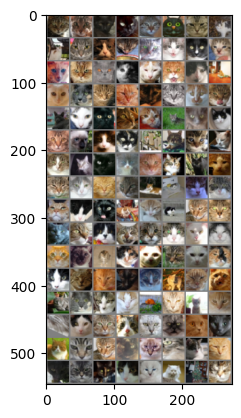

cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   random cat  


In [13]:
import matplotlib.pyplot as plt
import numpy as np

def showimage(img):
  img = img /2 + 0.5 #unnormalize
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)))
  plt.show()

#get random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

#show images
showimage(torchvision.utils.make_grid(images))
#show labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

**DEFINE CNN**

In [8]:
class CNN(nn.Module):
  def __init__(self):
    super().__init__()
    # First convolutional layer (in_channels, out_channels, kernel_size) , out_channels = number of filters
    # 3 input channels, 6 output channels, 5x5 kernel size
    self.conv1 = nn.Conv2d(3,6,5)
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16*5*5, 2)
  def forward(self,x):
    x = self.pool(F.relu(self.conv1(x))) #apply conv. then apply pooling
    x = self.pool(F.relu(self.conv2(x)))
    x = torch.flatten(x,1)
    x = self.fc1(x)
    return x

**SETUP DEVICE**

In [7]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


### **TRAIN and SAVE models**

In [22]:
for i in range(start,stop):
    print(f"Model {i}")
    random_sampler = torch.utils.data.RandomSampler(dataset, num_samples=num_samples)
    trainloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, sampler=random_sampler, num_workers = 4, persistent_workers=True)
    #train_size = 3000
    #_size = len(dataset) - train_size
    #trainset, _ = torch.utils.data.random_split(dataset, [train_size, _size])
    #trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers = 4, persistent_workers=True)
    #indices = random.sample(range(len(dataset)), train_size)
    #trainset = torch.utils.data.Subset(dataset, indices)
    #trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=4, persistent_workers=True)
    model = CNN().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    for epoch in range(num_epochs):
      print(f"Epoch [{epoch +1 }/{num_epochs}]")
      for batch_index, (data,targets) in enumerate(tqdm(trainloader)):
        #Move data and targets to device (GPU/CPU)
        data = data.to(device)
        targets = targets.to(device)
    
        #Forward pass: compute model output
        scores = model(data)
        loss = criterion(scores,targets)
    
        #Backward pass: compute the gradients
        optimizer.zero_grad()
        loss.backward()
    
        # Optimization step: update model parameters
        optimizer.step()

    PATH = f'./cat_models/cat_model_{i:04}.pth'
    torch.save(model.state_dict(),PATH)
    print(f"{PATH} SAVED\n")

Model 385
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.49it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 34.01it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.08it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.01it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.79it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.13it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.33it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.44it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.34it/s]


./cat_models/cat_model_0385.pth SAVED

Model 386
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.83it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.88it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.03it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.71it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.79it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.92it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.37it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 34.11it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.41it/s]


./cat_models/cat_model_0386.pth SAVED

Model 387
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.10it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.13it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.11it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.32it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.13it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.05it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.92it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.57it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.88it/s]


./cat_models/cat_model_0387.pth SAVED

Model 388
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.84it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 34.13it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 34.21it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.58it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.44it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.93it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.04it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.33it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.86it/s]


./cat_models/cat_model_0388.pth SAVED

Model 389
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.52it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.74it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.28it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.13it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.48it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.42it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.15it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.50it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.68it/s]


./cat_models/cat_model_0389.pth SAVED

Model 390
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.63it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.59it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.10it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.70it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.90it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.24it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.28it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.51it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.03it/s]


./cat_models/cat_model_0390.pth SAVED

Model 391
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.55it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.47it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.45it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.99it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.29it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.87it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.79it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.27it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.43it/s]


./cat_models/cat_model_0391.pth SAVED

Model 392
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.30it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.83it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.56it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.28it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.79it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.03it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.64it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.87it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.87it/s]


./cat_models/cat_model_0392.pth SAVED

Model 393
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.24it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.83it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.48it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.05it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.28it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 34.41it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.79it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.42it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.87it/s]


./cat_models/cat_model_0393.pth SAVED

Model 394
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.22it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.78it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.92it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.42it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.11it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.94it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.10it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.81it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.46it/s]


./cat_models/cat_model_0394.pth SAVED

Model 395
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.78it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.11it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.53it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.30it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.49it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.05it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.76it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.62it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.45it/s]


./cat_models/cat_model_0395.pth SAVED

Model 396
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.48it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.14it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.78it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.77it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.82it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.35it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.62it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 34.14it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.62it/s]


./cat_models/cat_model_0396.pth SAVED

Model 397
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.93it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.87it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.10it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.89it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.57it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.60it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.39it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.23it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.04it/s]


./cat_models/cat_model_0397.pth SAVED

Model 398
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.77it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.14it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.20it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.37it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.80it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.17it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.00it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.62it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.24it/s]


./cat_models/cat_model_0398.pth SAVED

Model 399
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.93it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.85it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.33it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.11it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.37it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.84it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.57it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.98it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.88it/s]


./cat_models/cat_model_0399.pth SAVED

Model 400
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.49it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.69it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.96it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.40it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.74it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.67it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.71it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.82it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.92it/s]


./cat_models/cat_model_0400.pth SAVED

Model 401
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.73it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.25it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.60it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.71it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.92it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.63it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 34.05it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.24it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.24it/s]


./cat_models/cat_model_0401.pth SAVED

Model 402
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.74it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.27it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 34.01it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.34it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.83it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.55it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.83it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.44it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 34.37it/s]


./cat_models/cat_model_0402.pth SAVED

Model 403
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.05it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.99it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.73it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.54it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.67it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.56it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.09it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 34.23it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.24it/s]


./cat_models/cat_model_0403.pth SAVED

Model 404
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.31it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.99it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.04it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.97it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.52it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.31it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.25it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.67it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.81it/s]


./cat_models/cat_model_0404.pth SAVED

Model 405
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.86it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.67it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.50it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.13it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.06it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.93it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.17it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.55it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.27it/s]


./cat_models/cat_model_0405.pth SAVED

Model 406
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.45it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.76it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.28it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.66it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.91it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.05it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.75it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.61it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.98it/s]


./cat_models/cat_model_0406.pth SAVED

Model 407
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.68it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.81it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.78it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.08it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.31it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.34it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.44it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.78it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.20it/s]


./cat_models/cat_model_0407.pth SAVED

Model 408
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.51it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.34it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.11it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.02it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.96it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.78it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.66it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.85it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.80it/s]


./cat_models/cat_model_0408.pth SAVED

Model 409
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.06it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.06it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.58it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.63it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.34it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.03it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.86it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.02it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.55it/s]


./cat_models/cat_model_0409.pth SAVED

Model 410
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.60it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.27it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.72it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.43it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.33it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.91it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.86it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.66it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.60it/s]


./cat_models/cat_model_0410.pth SAVED

Model 411
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.99it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.64it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.30it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.63it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.63it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.20it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.95it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.34it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.66it/s]


./cat_models/cat_model_0411.pth SAVED

Model 412
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 34.00it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.52it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.28it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.52it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.52it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.78it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.99it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.25it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.61it/s]


./cat_models/cat_model_0412.pth SAVED

Model 413
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.37it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.85it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.93it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.46it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.07it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.29it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.79it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.55it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.14it/s]


./cat_models/cat_model_0413.pth SAVED

Model 414
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.90it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.93it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.92it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.96it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.58it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.82it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.12it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.86it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.21it/s]


./cat_models/cat_model_0414.pth SAVED

Model 415
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.78it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.78it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.95it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.21it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.64it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.46it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.04it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.46it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.32it/s]


./cat_models/cat_model_0415.pth SAVED

Model 416
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.42it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 34.06it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.58it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.89it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.78it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.71it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.85it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.52it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.36it/s]


./cat_models/cat_model_0416.pth SAVED

Model 417
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.57it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.47it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.42it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.42it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.76it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.34it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.38it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.80it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.58it/s]


./cat_models/cat_model_0417.pth SAVED

Model 418
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.34it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.41it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.79it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.96it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.92it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.76it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.57it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.31it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.78it/s]


./cat_models/cat_model_0418.pth SAVED

Model 419
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.61it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.27it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.70it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.75it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.16it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.73it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.39it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.31it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.36it/s]


./cat_models/cat_model_0419.pth SAVED

Model 420
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.08it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.68it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.86it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.78it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.49it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.05it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.63it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.76it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.63it/s]


./cat_models/cat_model_0420.pth SAVED

Model 421
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.23it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.46it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.62it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.22it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.20it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.06it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.51it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.00it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.93it/s]


./cat_models/cat_model_0421.pth SAVED

Model 422
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.48it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.29it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.27it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.40it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.57it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.03it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.67it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.55it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.45it/s]


./cat_models/cat_model_0422.pth SAVED

Model 423
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.23it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.36it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.90it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.51it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.74it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.20it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.18it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.04it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.35it/s]


./cat_models/cat_model_0423.pth SAVED

Model 424
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.39it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.80it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.41it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.64it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.61it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.39it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.29it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.53it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.99it/s]


./cat_models/cat_model_0424.pth SAVED

Model 425
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.87it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.60it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.64it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.55it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.04it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.92it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.26it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.64it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.88it/s]


./cat_models/cat_model_0425.pth SAVED

Model 426
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.13it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.52it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.35it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.37it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.91it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.23it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.31it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.38it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.08it/s]


./cat_models/cat_model_0426.pth SAVED

Model 427
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.62it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.64it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.24it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.00it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.85it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.90it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.16it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.88it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.09it/s]


./cat_models/cat_model_0427.pth SAVED

Model 428
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.57it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.80it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.10it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.42it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.55it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.30it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.46it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.23it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.80it/s]


./cat_models/cat_model_0428.pth SAVED

Model 429
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.07it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.81it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.05it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.97it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.88it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.75it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.56it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.99it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.71it/s]


./cat_models/cat_model_0429.pth SAVED

Model 430
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.56it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.97it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.27it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.57it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.22it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.79it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.36it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.77it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.94it/s]


./cat_models/cat_model_0430.pth SAVED

Model 431
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.46it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.97it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.13it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.77it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.28it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.79it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.95it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.51it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.46it/s]


./cat_models/cat_model_0431.pth SAVED

Model 432
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.17it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.91it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.93it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.18it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.36it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.72it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.21it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.63it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.49it/s]


./cat_models/cat_model_0432.pth SAVED

Model 433
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.30it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.84it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.65it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.52it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.46it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.78it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.44it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.74it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.17it/s]


./cat_models/cat_model_0433.pth SAVED

Model 434
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.13it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.90it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.10it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.52it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.99it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.94it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.64it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.82it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.75it/s]


./cat_models/cat_model_0434.pth SAVED

Model 435
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.15it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.67it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.10it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.31it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.88it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.44it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.04it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.85it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.53it/s]


./cat_models/cat_model_0435.pth SAVED

Model 436
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.40it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.65it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.44it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.69it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.18it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.78it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.19it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.25it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.21it/s]


./cat_models/cat_model_0436.pth SAVED

Model 437
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.28it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.37it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.25it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.45it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.71it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.06it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.43it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.23it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.51it/s]


./cat_models/cat_model_0437.pth SAVED

Model 438
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.71it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.02it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.40it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.89it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.69it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.63it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.66it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.11it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.60it/s]


./cat_models/cat_model_0438.pth SAVED

Model 439
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.29it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.62it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 34.32it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 34.00it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.68it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.27it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.21it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.68it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.35it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.79it/s]


./cat_models/cat_model_0439.pth SAVED

Model 440
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.89it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.50it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.95it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.79it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.03it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.94it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.37it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.24it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.77it/s]


./cat_models/cat_model_0440.pth SAVED

Model 441
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.17it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.97it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.01it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.38it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.47it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.63it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.81it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.58it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.45it/s]


./cat_models/cat_model_0441.pth SAVED

Model 442
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.16it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.39it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.64it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.76it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.62it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.34it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.82it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.22it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.02it/s]


./cat_models/cat_model_0442.pth SAVED

Model 443
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.12it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.86it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.32it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.26it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.23it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.60it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.07it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.69it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.16it/s]


./cat_models/cat_model_0443.pth SAVED

Model 444
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.62it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.16it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.37it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.73it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.50it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.24it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.24it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.25it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.07it/s]


./cat_models/cat_model_0444.pth SAVED

Model 445
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.93it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.51it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.61it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.89it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.24it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.24it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.40it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.62it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.64it/s]


./cat_models/cat_model_0445.pth SAVED

Model 446
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.55it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.56it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.79it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.95it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.08it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.08it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.52it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.65it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.10it/s]


./cat_models/cat_model_0446.pth SAVED

Model 447
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.71it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.16it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.44it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.81it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.74it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.89it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.03it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.89it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.79it/s]


./cat_models/cat_model_0447.pth SAVED

Model 448
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.63it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.63it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.89it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.03it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.93it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.78it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.15it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.71it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.80it/s]


./cat_models/cat_model_0448.pth SAVED

Model 449
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.66it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.72it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.30it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.87it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.16it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.09it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.43it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.25it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.35it/s]


./cat_models/cat_model_0449.pth SAVED

Model 450
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.95it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.12it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.04it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.25it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.88it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.63it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.63it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.80it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 33.18it/s]


./cat_models/cat_model_0450.pth SAVED

Model 451
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.69it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.80it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.97it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.71it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.86it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.83it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.26it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.03it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.92it/s]


./cat_models/cat_model_0451.pth SAVED

Model 452
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.89it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.11it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.39it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.48it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.88it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.05it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.99it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.12it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.29it/s]


./cat_models/cat_model_0452.pth SAVED

Model 453
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.37it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.71it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.62it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.55it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.40it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.65it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.97it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.08it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.11it/s]


./cat_models/cat_model_0453.pth SAVED

Model 454
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.11it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.94it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.64it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.20it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.41it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.70it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.05it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.12it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.27it/s]


./cat_models/cat_model_0454.pth SAVED

Model 455
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.78it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.13it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.28it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.78it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.81it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.21it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.28it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.88it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.66it/s]


./cat_models/cat_model_0455.pth SAVED

Model 456
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.73it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.42it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.02it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.55it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.24it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.50it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.42it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.03it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.81it/s]


./cat_models/cat_model_0456.pth SAVED

Model 457
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.02it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.12it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.74it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.93it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.72it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.76it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.81it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.78it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.83it/s]


./cat_models/cat_model_0457.pth SAVED

Model 458
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.95it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.42it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.73it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.43it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.68it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.66it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.49it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.50it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.30it/s]


./cat_models/cat_model_0458.pth SAVED

Model 459
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.40it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.25it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.12it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.75it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.56it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.13it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.72it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.40it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.29it/s]


./cat_models/cat_model_0459.pth SAVED

Model 460
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.57it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.19it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.58it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.19it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.92it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.04it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.32it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.05it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.98it/s]


./cat_models/cat_model_0460.pth SAVED

Model 461
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.32it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.70it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.26it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.11it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.85it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.50it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.92it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.19it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.87it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.70it/s]


./cat_models/cat_model_0461.pth SAVED

Model 462
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.76it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.24it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.68it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.90it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.74it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.09it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.46it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.03it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.76it/s]


./cat_models/cat_model_0462.pth SAVED

Model 463
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.48it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.39it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.50it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.26it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.04it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.53it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.87it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.10it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.24it/s]


./cat_models/cat_model_0463.pth SAVED

Model 464
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.00it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.37it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.94it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.34it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.43it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.70it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.77it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.27it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.35it/s]


./cat_models/cat_model_0464.pth SAVED

Model 465
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.22it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.74it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.86it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.43it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.45it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.56it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.33it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.54it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.98it/s]


./cat_models/cat_model_0465.pth SAVED

Model 466
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.00it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.58it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.21it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.08it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.10it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.50it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.48it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.01it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.12it/s]


./cat_models/cat_model_0466.pth SAVED

Model 467
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.70it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.91it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.64it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.62it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.58it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.55it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.37it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.26it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.83it/s]


./cat_models/cat_model_0467.pth SAVED

Model 468
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.98it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.26it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.85it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.16it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.19it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.95it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.69it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.67it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.59it/s]


./cat_models/cat_model_0468.pth SAVED

Model 469
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.44it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.72it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.77it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.07it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.09it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.08it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.76it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.71it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.55it/s]


./cat_models/cat_model_0469.pth SAVED

Model 470
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.90it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.43it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.69it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.45it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.00it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.60it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.55it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.09it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.70it/s]


./cat_models/cat_model_0470.pth SAVED

Model 471
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.49it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.82it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.96it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.82it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.30it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.36it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.99it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.98it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.20it/s]


./cat_models/cat_model_0471.pth SAVED

Model 472
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.71it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.43it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.31it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.43it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.66it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.42it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.82it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.82it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.73it/s]


./cat_models/cat_model_0472.pth SAVED

Model 473
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.29it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.86it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.50it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.40it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.95it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.33it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.44it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.92it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.37it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.24it/s]


./cat_models/cat_model_0473.pth SAVED

Model 474
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:19<00:00,  1.26it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.33it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.67it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.34it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.42it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.99it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.66it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.41it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.57it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.65it/s]


./cat_models/cat_model_0474.pth SAVED

Model 475
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.32it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.27it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.38it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.44it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.09it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.12it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.27it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.48it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.31it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.02it/s]


./cat_models/cat_model_0475.pth SAVED

Model 476
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:19<00:00,  1.22it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.30it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.48it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.85it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.16it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.33it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.57it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.14it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.84it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.67it/s]


./cat_models/cat_model_0476.pth SAVED

Model 477
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.31it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.85it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.04it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.98it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.50it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.64it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.77it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.74it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.39it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.63it/s]


./cat_models/cat_model_0477.pth SAVED

Model 478
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.37it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.77it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.79it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.48it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.38it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.15it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.83it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.84it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.80it/s]


./cat_models/cat_model_0478.pth SAVED

Model 479
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.28it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.27it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.40it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.10it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 20.78it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.28it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.79it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.66it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.04it/s]


./cat_models/cat_model_0479.pth SAVED

Model 480
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.43it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.24it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.60it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.19it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.01it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 16.70it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.94it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.13it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.65it/s]


./cat_models/cat_model_0480.pth SAVED

Model 481
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.92it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.06it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.71it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.29it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.42it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.37it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.02it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.57it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 16.37it/s]


./cat_models/cat_model_0481.pth SAVED

Model 482
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.14it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.31it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.65it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.71it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.27it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.08it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.27it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 19.42it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.85it/s]


./cat_models/cat_model_0482.pth SAVED

Model 483
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.45it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.37it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.91it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.75it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.07it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.00it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.43it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.63it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.91it/s]


./cat_models/cat_model_0483.pth SAVED

Model 484
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.06it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.09it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 12.30it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.38it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.95it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.13it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.68it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.20it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.03it/s]


./cat_models/cat_model_0484.pth SAVED

Model 485
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.49it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.71it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.74it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.34it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.52it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.63it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.70it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.33it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.48it/s]


./cat_models/cat_model_0485.pth SAVED

Model 486
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.10it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.77it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.55it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.09it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.68it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.22it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.36it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.44it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.32it/s]


./cat_models/cat_model_0486.pth SAVED

Model 487
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.51it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.95it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.67it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.46it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.02it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.76it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.94it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.06it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.30it/s]


./cat_models/cat_model_0487.pth SAVED

Model 488
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.31it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.70it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.73it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.69it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.31it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.25it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.61it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.91it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.40it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.96it/s]


./cat_models/cat_model_0488.pth SAVED

Model 489
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.20it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.44it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.02it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.84it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.55it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.37it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.52it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.37it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.40it/s]


./cat_models/cat_model_0489.pth SAVED

Model 490
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.58it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.05it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.80it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.19it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.31it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.68it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.48it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.33it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.21it/s]


./cat_models/cat_model_0490.pth SAVED

Model 491
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.09it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.17it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.07it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.69it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.98it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.68it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.88it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.37it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.07it/s]


./cat_models/cat_model_0491.pth SAVED

Model 492
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.17it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.06it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.90it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.23it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.24it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.70it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.07it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.73it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.01it/s]


./cat_models/cat_model_0492.pth SAVED

Model 493
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.73it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.43it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.13it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.44it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.65it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.48it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.89it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.40it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.44it/s]


./cat_models/cat_model_0493.pth SAVED

Model 494
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.61it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.65it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.42it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.46it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.60it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.85it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.93it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.79it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.48it/s]


./cat_models/cat_model_0494.pth SAVED

Model 495
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.31it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.00it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.84it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.58it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.68it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.92it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.67it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.79it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.40it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.51it/s]


./cat_models/cat_model_0495.pth SAVED

Model 496
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.32it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.06it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.48it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.13it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.34it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.98it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.37it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.04it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.11it/s]


./cat_models/cat_model_0496.pth SAVED

Model 497
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.32it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.03it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.67it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.89it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.08it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.20it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.34it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.54it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.68it/s]


./cat_models/cat_model_0497.pth SAVED

Model 498
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.35it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.24it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.15it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.67it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.52it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.78it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.63it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.87it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.10it/s]


./cat_models/cat_model_0498.pth SAVED

Model 499
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.30it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.57it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.80it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.47it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.80it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.66it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.26it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.35it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.64it/s]


./cat_models/cat_model_0499.pth SAVED

Model 500
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.30it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.00it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.35it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.58it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.78it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.73it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.22it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.32it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.06it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.53it/s]


./cat_models/cat_model_0500.pth SAVED

Model 501
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.49it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.19it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.28it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.94it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.98it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.30it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.46it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.86it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.61it/s]


./cat_models/cat_model_0501.pth SAVED

Model 502
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.18it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.17it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.39it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.28it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.54it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.39it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.36it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.65it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.16it/s]


./cat_models/cat_model_0502.pth SAVED

Model 503
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.62it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.44it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.31it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.72it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.05it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.22it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.61it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.03it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.88it/s]


./cat_models/cat_model_0503.pth SAVED

Model 504
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.29it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.48it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.24it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.12it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.68it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.95it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.45it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.50it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.96it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.65it/s]


./cat_models/cat_model_0504.pth SAVED

Model 505
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.07it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.50it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.99it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.78it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.52it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.40it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.44it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.44it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.23it/s]


./cat_models/cat_model_0505.pth SAVED

Model 506
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.68it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.17it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.28it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.55it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.86it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.48it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.07it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.14it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.24it/s]


./cat_models/cat_model_0506.pth SAVED

Model 507
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.27it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.87it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.57it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.58it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.96it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.27it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.24it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.09it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.63it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.18it/s]


./cat_models/cat_model_0507.pth SAVED

Model 508
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.28it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.80it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.63it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.74it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.02it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.57it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.80it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.82it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.09it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.17it/s]


./cat_models/cat_model_0508.pth SAVED

Model 509
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.99it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.48it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.21it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.62it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.67it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.65it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.80it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.72it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.85it/s]


./cat_models/cat_model_0509.pth SAVED

Model 510
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.10it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.25it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.63it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.28it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.02it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.85it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.88it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.65it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.08it/s]


./cat_models/cat_model_0510.pth SAVED

Model 511
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.49it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.64it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.81it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.03it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.79it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.65it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.96it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.30it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.15it/s]


./cat_models/cat_model_0511.pth SAVED

Model 512
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.09it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.47it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.04it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.38it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.00it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.14it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.40it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.32it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.47it/s]


./cat_models/cat_model_0512.pth SAVED

Model 513
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.32it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.20it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.14it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.96it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.70it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.50it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.94it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.08it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.22it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.48it/s]


./cat_models/cat_model_0513.pth SAVED

Model 514
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.83it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.09it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.91it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.40it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.10it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.00it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.98it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.35it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.11it/s]


./cat_models/cat_model_0514.pth SAVED

Model 515
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.76it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.21it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.65it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.81it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.86it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.01it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.68it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.31it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.55it/s]


./cat_models/cat_model_0515.pth SAVED

Model 516
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.32it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.27it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.59it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.91it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.35it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.22it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.57it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.08it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.59it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.27it/s]


./cat_models/cat_model_0516.pth SAVED

Model 517
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.06it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.30it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.02it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.83it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.50it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.87it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.08it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.72it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.52it/s]


./cat_models/cat_model_0517.pth SAVED

Model 518
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.69it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.27it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.98it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.14it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.87it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.79it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.52it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.12it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.93it/s]


./cat_models/cat_model_0518.pth SAVED

Model 519
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.82it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.54it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.22it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.61it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.10it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.35it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.20it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.17it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.43it/s]


./cat_models/cat_model_0519.pth SAVED

Model 520
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.96it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.22it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.96it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.37it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.65it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.55it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.70it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.88it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.30it/s]


./cat_models/cat_model_0520.pth SAVED

Model 521
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.24it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.02it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.66it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.05it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.78it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.45it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.86it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.11it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.17it/s]


./cat_models/cat_model_0521.pth SAVED

Model 522
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.30it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.97it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.60it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.30it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.32it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.11it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.13it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.18it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.71it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.23it/s]


./cat_models/cat_model_0522.pth SAVED

Model 523
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.23it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.89it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.55it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.77it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.82it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.85it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.23it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.28it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.02it/s]


./cat_models/cat_model_0523.pth SAVED

Model 524
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.62it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.19it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.05it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.24it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.98it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.82it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.31it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.70it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.91it/s]


./cat_models/cat_model_0524.pth SAVED

Model 525
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.32it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.51it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.66it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.89it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.23it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.89it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.82it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.92it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.65it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.00it/s]


./cat_models/cat_model_0525.pth SAVED

Model 526
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.69it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.01it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.69it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.53it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.68it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.71it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.49it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.24it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.04it/s]


./cat_models/cat_model_0526.pth SAVED

Model 527
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.23it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.93it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.90it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.18it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.49it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.26it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.09it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.67it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.98it/s]


./cat_models/cat_model_0527.pth SAVED

Model 528
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.40it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.86it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.31it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.89it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.88it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.22it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.83it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.78it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.01it/s]


./cat_models/cat_model_0528.pth SAVED

Model 529
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.08it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.40it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.09it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.11it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.68it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.36it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.25it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.38it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.82it/s]


./cat_models/cat_model_0529.pth SAVED

Model 530
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.74it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.70it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.18it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.44it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.77it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.01it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.11it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.23it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.97it/s]


./cat_models/cat_model_0530.pth SAVED

Model 531
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.32it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.77it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.25it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.27it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.60it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.58it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.83it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.78it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.56it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.54it/s]


./cat_models/cat_model_0531.pth SAVED

Model 532
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.18it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.93it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.90it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.49it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.38it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.34it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.10it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.22it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.84it/s]


./cat_models/cat_model_0532.pth SAVED

Model 533
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.06it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.29it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.02it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.26it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.67it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.09it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.74it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.36it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.73it/s]


./cat_models/cat_model_0533.pth SAVED

Model 534
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.30it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.06it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.80it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.59it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.87it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.96it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.47it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.87it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.44it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 16.06it/s]


./cat_models/cat_model_0534.pth SAVED

Model 535
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.30it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.07it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.86it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.20it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.98it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.18it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.70it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.74it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.43it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.59it/s]


./cat_models/cat_model_0535.pth SAVED

Model 536
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.15it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.24it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.68it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.10it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.21it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.94it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.11it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.85it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.04it/s]


./cat_models/cat_model_0536.pth SAVED

Model 537
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.01it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.08it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.53it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.87it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.00it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.03it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.59it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.37it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.96it/s]


./cat_models/cat_model_0537.pth SAVED

Model 538
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.49it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.31it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.54it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.37it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.17it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.53it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.06it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.38it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.80it/s]


./cat_models/cat_model_0538.pth SAVED

Model 539
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.94it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.29it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.65it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.17it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.99it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.71it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.35it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.67it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.18it/s]


./cat_models/cat_model_0539.pth SAVED

Model 540
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.63it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.22it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.25it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.20it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.86it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.97it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.63it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.29it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.46it/s]


./cat_models/cat_model_0540.pth SAVED

Model 541
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.15it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.75it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.96it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.90it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.34it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.87it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.30it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.79it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.70it/s]


./cat_models/cat_model_0541.pth SAVED

Model 542
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.80it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.43it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.67it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.87it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.00it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.50it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.13it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.41it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.91it/s]


./cat_models/cat_model_0542.pth SAVED

Model 543
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.05it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.11it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.54it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.98it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.63it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.05it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.02it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.62it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.01it/s]


./cat_models/cat_model_0543.pth SAVED

Model 544
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.46it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.26it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.19it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.59it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.10it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.55it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.68it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.37it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.91it/s]


./cat_models/cat_model_0544.pth SAVED

Model 545
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.00it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.86it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.31it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.77it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.84it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.50it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.93it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.30it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.01it/s]


./cat_models/cat_model_0545.pth SAVED

Model 546
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.15it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.27it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.17it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.66it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.36it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.98it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.09it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.08it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.81it/s]


./cat_models/cat_model_0546.pth SAVED

Model 547
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.32it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.01it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.88it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.54it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.96it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.87it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.29it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.58it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.02it/s]


./cat_models/cat_model_0547.pth SAVED

Model 548
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.42it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.00it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.11it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.17it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.57it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.23it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.23it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.15it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.47it/s]


./cat_models/cat_model_0548.pth SAVED

Model 549
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.06it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.09it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.92it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.89it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.10it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.79it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.14it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.45it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.51it/s]


./cat_models/cat_model_0549.pth SAVED

Model 550
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.80it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.39it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.05it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.48it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.20it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.67it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.50it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.77it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.67it/s]


./cat_models/cat_model_0550.pth SAVED

Model 551
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.10it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.04it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.97it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.64it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.68it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.81it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.93it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.90it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.07it/s]


./cat_models/cat_model_0551.pth SAVED

Model 552
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.18it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.41it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.94it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.79it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.75it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.45it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.35it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.87it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.51it/s]


./cat_models/cat_model_0552.pth SAVED

Model 553
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.73it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.42it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.69it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.55it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.17it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.47it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.20it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.04it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.18it/s]


./cat_models/cat_model_0553.pth SAVED

Model 554
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.06it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.88it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.22it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.07it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.61it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.63it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.40it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.28it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.89it/s]


./cat_models/cat_model_0554.pth SAVED

Model 555
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.01it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.15it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.65it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.68it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.66it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.21it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.25it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.50it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.80it/s]


./cat_models/cat_model_0555.pth SAVED

Model 556
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.06it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.80it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.91it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.93it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.54it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.07it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.78it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.12it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.81it/s]


./cat_models/cat_model_0556.pth SAVED

Model 557
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.49it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.34it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.84it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.05it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.57it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.43it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.11it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.55it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.02it/s]


./cat_models/cat_model_0557.pth SAVED

Model 558
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.57it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.10it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.47it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.04it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.09it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.05it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.51it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.62it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.01it/s]


./cat_models/cat_model_0558.pth SAVED

Model 559
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.43it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.72it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.65it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.22it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.42it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.47it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.73it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.46it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.84it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.03it/s]


./cat_models/cat_model_0559.pth SAVED

Model 560
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.43it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.04it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.79it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.76it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.79it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.60it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.32it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.90it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.70it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.52it/s]


./cat_models/cat_model_0560.pth SAVED

Model 561
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.43it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.64it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.05it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.27it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.62it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.55it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.37it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.65it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.37it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.38it/s]


./cat_models/cat_model_0561.pth SAVED

Model 562
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.36it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.97it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.34it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.91it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.58it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.00it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.48it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.35it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.00it/s]


./cat_models/cat_model_0562.pth SAVED

Model 563
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.26it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.30it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.73it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.12it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.20it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.59it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.73it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.94it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.98it/s]


./cat_models/cat_model_0563.pth SAVED

Model 564
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.76it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.25it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.16it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.83it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.15it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.72it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.88it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.24it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.95it/s]


./cat_models/cat_model_0564.pth SAVED

Model 565
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:19<00:00,  1.24it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.11it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.47it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.56it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.98it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.09it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.34it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.77it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.96it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.88it/s]


./cat_models/cat_model_0565.pth SAVED

Model 566
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.44it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.79it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.15it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.95it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.20it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.91it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.75it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.18it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.10it/s]


./cat_models/cat_model_0566.pth SAVED

Model 567
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.15it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.25it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.17it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.89it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.24it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.80it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.15it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.82it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.74it/s]


./cat_models/cat_model_0567.pth SAVED

Model 568
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.45it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.70it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.42it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.32it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.66it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.06it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.86it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.79it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.02it/s]


./cat_models/cat_model_0568.pth SAVED

Model 569
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.43it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.30it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.72it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.80it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.93it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.47it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.24it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.74it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.04it/s]


./cat_models/cat_model_0569.pth SAVED

Model 570
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.11it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.06it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.10it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.18it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.68it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.23it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.66it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.87it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.72it/s]


./cat_models/cat_model_0570.pth SAVED

Model 571
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.76it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.31it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.45it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.14it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.24it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.33it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.10it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.96it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.21it/s]


./cat_models/cat_model_0571.pth SAVED

Model 572
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.42it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.71it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.52it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.05it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.70it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.14it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.99it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.42it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.56it/s]


./cat_models/cat_model_0572.pth SAVED

Model 573
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.11it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.75it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.97it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.15it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.51it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.73it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.74it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.95it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.78it/s]


./cat_models/cat_model_0573.pth SAVED

Model 574
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.19it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.94it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.16it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.87it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.92it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.65it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.23it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.13it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.37it/s]


./cat_models/cat_model_0574.pth SAVED

Model 575
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.32it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.68it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.68it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.75it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.03it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.82it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.28it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.50it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.20it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.23it/s]


./cat_models/cat_model_0575.pth SAVED

Model 576
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.01it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.78it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.97it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.37it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.99it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.60it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.75it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.11it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.36it/s]


./cat_models/cat_model_0576.pth SAVED

Model 577
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.96it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.42it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.80it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.53it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.26it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.97it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.37it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.56it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.00it/s]


./cat_models/cat_model_0577.pth SAVED

Model 578
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.28it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.61it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.67it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.37it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.62it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.68it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.45it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.49it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.78it/s]


./cat_models/cat_model_0578.pth SAVED

Model 579
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.38it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.73it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.96it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.37it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.74it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.16it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.18it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.80it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.23it/s]


./cat_models/cat_model_0579.pth SAVED

Model 580
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.67it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.27it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.94it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.50it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.95it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.87it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.99it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.99it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.35it/s]


./cat_models/cat_model_0580.pth SAVED

Model 581
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.98it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.32it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.90it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.73it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.64it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.04it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.13it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.76it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.24it/s]


./cat_models/cat_model_0581.pth SAVED

Model 582
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.05it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.31it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.05it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.62it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.38it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.80it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.67it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.59it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.37it/s]


./cat_models/cat_model_0582.pth SAVED

Model 583
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.65it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.77it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.13it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.17it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.73it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.28it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.69it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.39it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.64it/s]


./cat_models/cat_model_0583.pth SAVED

Model 584
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.64it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.48it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.54it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.89it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.62it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.25it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.25it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.08it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.38it/s]


./cat_models/cat_model_0584.pth SAVED

Model 585
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.24it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.69it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.04it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.80it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.48it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.58it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.05it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.70it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.77it/s]


./cat_models/cat_model_0585.pth SAVED

Model 586
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.96it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.42it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.73it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.29it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.09it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.80it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.80it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.63it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.93it/s]


./cat_models/cat_model_0586.pth SAVED

Model 587
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.23it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.27it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.76it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.34it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.08it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.47it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.33it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.99it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.79it/s]


./cat_models/cat_model_0587.pth SAVED

Model 588
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.34it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.07it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.66it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.12it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.18it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.95it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.41it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.03it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.69it/s]


./cat_models/cat_model_0588.pth SAVED

Model 589
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.55it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.56it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.72it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.45it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.81it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.25it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.62it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.77it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.77it/s]


./cat_models/cat_model_0589.pth SAVED

Model 590
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.29it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.04it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.60it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.50it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.92it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.85it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.27it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.57it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.98it/s]


./cat_models/cat_model_0590.pth SAVED

Model 591
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.49it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.03it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.63it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.21it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.80it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.54it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.80it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.65it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.34it/s]


./cat_models/cat_model_0591.pth SAVED

Model 592
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.22it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.45it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.22it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.24it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.17it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.46it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.22it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.18it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.00it/s]


./cat_models/cat_model_0592.pth SAVED

Model 593
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.86it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.13it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.38it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.69it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.17it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.89it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.69it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.96it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.81it/s]


./cat_models/cat_model_0593.pth SAVED

Model 594
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.35it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.85it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.19it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.00it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.47it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.04it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.19it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.22it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.73it/s]


./cat_models/cat_model_0594.pth SAVED

Model 595
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.26it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.03it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.38it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.73it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.97it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.64it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.33it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.09it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.40it/s]


./cat_models/cat_model_0595.pth SAVED

Model 596
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.09it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.92it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.31it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.56it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.97it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.65it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.39it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.45it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.72it/s]


./cat_models/cat_model_0596.pth SAVED

Model 597
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.21it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.05it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.79it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.51it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.81it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.99it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.52it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.02it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.33it/s]


./cat_models/cat_model_0597.pth SAVED

Model 598
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.65it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.62it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.52it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.41it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.63it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.68it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.26it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.08it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.46it/s]


./cat_models/cat_model_0598.pth SAVED

Model 599
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.10it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.35it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.64it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.22it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.92it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.97it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.86it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.71it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.10it/s]


./cat_models/cat_model_0599.pth SAVED

Model 600
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.18it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.46it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.81it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.23it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.08it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.11it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.57it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.32it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.26it/s]


./cat_models/cat_model_0600.pth SAVED

Model 601
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.43it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.27it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.21it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.82it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.31it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.55it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.16it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.16it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.67it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.26it/s]


./cat_models/cat_model_0601.pth SAVED

Model 602
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.84it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.05it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.56it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.54it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.57it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.62it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.17it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.71it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.56it/s]


./cat_models/cat_model_0602.pth SAVED

Model 603
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.16it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.72it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.34it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.05it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.01it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.03it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.46it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.98it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.35it/s]


./cat_models/cat_model_0603.pth SAVED

Model 604
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.08it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.15it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.68it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.17it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.65it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.09it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.02it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.68it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.64it/s]


./cat_models/cat_model_0604.pth SAVED

Model 605
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.49it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.33it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.27it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.85it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.14it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.24it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.07it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.49it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.37it/s]


./cat_models/cat_model_0605.pth SAVED

Model 606
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.41it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.32it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.56it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.90it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.96it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.82it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.43it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.61it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.07it/s]


./cat_models/cat_model_0606.pth SAVED

Model 607
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.39it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.08it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.94it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.46it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.79it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.85it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.32it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.91it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.31it/s]


./cat_models/cat_model_0607.pth SAVED

Model 608
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.16it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.56it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.17it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.36it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.65it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.40it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.47it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.84it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.42it/s]


./cat_models/cat_model_0608.pth SAVED

Model 609
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.94it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.48it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.89it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.02it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.01it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.39it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.89it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.82it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.14it/s]


./cat_models/cat_model_0609.pth SAVED

Model 610
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.24it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.34it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.61it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.56it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.96it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.29it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.21it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.80it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.09it/s]


./cat_models/cat_model_0610.pth SAVED

Model 611
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.21it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.98it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.56it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.79it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.39it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.04it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.23it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.08it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.28it/s]


./cat_models/cat_model_0611.pth SAVED

Model 612
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.79it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.53it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.75it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.50it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.38it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.87it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.08it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.97it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.41it/s]


./cat_models/cat_model_0612.pth SAVED

Model 613
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.33it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.81it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.92it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.60it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.12it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.30it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.88it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.96it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.90it/s]


./cat_models/cat_model_0613.pth SAVED

Model 614
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.50it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.30it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.58it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.69it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.85it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.67it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.31it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.83it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.71it/s]


./cat_models/cat_model_0614.pth SAVED

Model 615
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.47it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.57it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.04it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.48it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.12it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.25it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.97it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.82it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.00it/s]


./cat_models/cat_model_0615.pth SAVED

Model 616
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.18it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.90it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.53it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.42it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.18it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.77it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.97it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.76it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.29it/s]


./cat_models/cat_model_0616.pth SAVED

Model 617
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.75it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.81it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.63it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.37it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.39it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.79it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.05it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.77it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.09it/s]


./cat_models/cat_model_0617.pth SAVED

Model 618
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.02it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.57it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.34it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.77it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.19it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.54it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.34it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.95it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.12it/s]


./cat_models/cat_model_0618.pth SAVED

Model 619
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.43it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.86it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.79it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.36it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.34it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.78it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.91it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.24it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.18it/s]


./cat_models/cat_model_0619.pth SAVED

Model 620
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.87it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.94it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.93it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.80it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.53it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.35it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.92it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.44it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.18it/s]


./cat_models/cat_model_0620.pth SAVED

Model 621
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.45it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.01it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.22it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.93it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.88it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 17.29it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.69it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.46it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.42it/s]


./cat_models/cat_model_0621.pth SAVED

Model 622
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.09it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.21it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  6.32it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.04it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.18it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.46it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.84it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.22it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.26it/s]


./cat_models/cat_model_0622.pth SAVED

Model 623
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.36it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.89it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.01it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 18.19it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.29it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.34it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 19.70it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.17it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.78it/s]


./cat_models/cat_model_0623.pth SAVED

Model 624
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.99it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.70it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.10it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.26it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.03it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.98it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.46it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.76it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.67it/s]


./cat_models/cat_model_0624.pth SAVED

Model 625
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.64it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.57it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.96it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.79it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.93it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.64it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.83it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.02it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.74it/s]


./cat_models/cat_model_0625.pth SAVED

Model 626
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.43it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.17it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.32it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.36it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.19it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.66it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.33it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.83it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.65it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.71it/s]


./cat_models/cat_model_0626.pth SAVED

Model 627
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.87it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.94it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.02it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.35it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.84it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.59it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.17it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.23it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.02it/s]


./cat_models/cat_model_0627.pth SAVED

Model 628
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.97it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.61it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.66it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.82it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.86it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.61it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.74it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.67it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.88it/s]


./cat_models/cat_model_0628.pth SAVED

Model 629
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.58it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.48it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.43it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.83it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.18it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.37it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.24it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.14it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.26it/s]


./cat_models/cat_model_0629.pth SAVED

Model 630
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.29it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.39it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.37it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.98it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.02it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.93it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.60it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.03it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.48it/s]


./cat_models/cat_model_0630.pth SAVED

Model 631
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.63it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.93it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.33it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.13it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.50it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.69it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.74it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.07it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.55it/s]


./cat_models/cat_model_0631.pth SAVED

Model 632
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.23it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.72it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.14it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.85it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.02it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.50it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.40it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.98it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.23it/s]


./cat_models/cat_model_0632.pth SAVED

Model 633
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.61it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.82it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.29it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.09it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.12it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.94it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.86it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.36it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.54it/s]


./cat_models/cat_model_0633.pth SAVED

Model 634
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.64it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.72it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.33it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.65it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.57it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.78it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.77it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.80it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.50it/s]


./cat_models/cat_model_0634.pth SAVED

Model 635
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.54it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.39it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.69it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.18it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.37it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.17it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.04it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.06it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.27it/s]


./cat_models/cat_model_0635.pth SAVED

Model 636
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.46it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.27it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.87it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.80it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.66it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.14it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.98it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.33it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.69it/s]


./cat_models/cat_model_0636.pth SAVED

Model 637
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.97it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.43it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.23it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.28it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.18it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.44it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.61it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.53it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.43it/s]


./cat_models/cat_model_0637.pth SAVED

Model 638
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.14it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.47it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.15it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.19it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.61it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.56it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.51it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.46it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.34it/s]


./cat_models/cat_model_0638.pth SAVED

Model 639
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.63it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.50it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.38it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.61it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.94it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.14it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.34it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.27it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.64it/s]


./cat_models/cat_model_0639.pth SAVED

Model 640
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.47it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.38it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.05it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.55it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.13it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.82it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.23it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.88it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.40it/s]


./cat_models/cat_model_0640.pth SAVED

Model 641
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.43it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.99it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.90it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.71it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.75it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.95it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.43it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.53it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.84it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.20it/s]


./cat_models/cat_model_0641.pth SAVED

Model 642
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.05it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.04it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.55it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.48it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.51it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.54it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.73it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.86it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.04it/s]


./cat_models/cat_model_0642.pth SAVED

Model 643
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.11it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.26it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.91it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.19it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.77it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.71it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.12it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.74it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.64it/s]


./cat_models/cat_model_0643.pth SAVED

Model 644
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.52it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.46it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.90it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.44it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.33it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.25it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.33it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.66it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.38it/s]


./cat_models/cat_model_0644.pth SAVED

Model 645
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.87it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.40it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.39it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.37it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.57it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.95it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.17it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.89it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.61it/s]


./cat_models/cat_model_0645.pth SAVED

Model 646
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.98it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.37it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.59it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.95it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.92it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.60it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.58it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.48it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.87it/s]


./cat_models/cat_model_0646.pth SAVED

Model 647
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.58it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.63it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.56it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.10it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.37it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.42it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.10it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.99it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.31it/s]


./cat_models/cat_model_0647.pth SAVED

Model 648
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.23it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.31it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.27it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.23it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.70it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.26it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.78it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.69it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.08it/s]


./cat_models/cat_model_0648.pth SAVED

Model 649
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.56it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.20it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.63it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.84it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.99it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.31it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.81it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.92it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.06it/s]


./cat_models/cat_model_0649.pth SAVED

Model 650
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.78it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.14it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.95it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.78it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.67it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.11it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.12it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.90it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.73it/s]


./cat_models/cat_model_0650.pth SAVED

Model 651
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.14it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.30it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.17it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.22it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.78it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.96it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.46it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.74it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.39it/s]


./cat_models/cat_model_0651.pth SAVED

Model 652
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.62it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.18it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.09it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.73it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.90it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.26it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.32it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.89it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.58it/s]


./cat_models/cat_model_0652.pth SAVED

Model 653
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.99it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.22it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.19it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.69it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.02it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.65it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.06it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.51it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.72it/s]


./cat_models/cat_model_0653.pth SAVED

Model 654
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.25it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.38it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.41it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.82it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.71it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.76it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.54it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.85it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.96it/s]


./cat_models/cat_model_0654.pth SAVED

Model 655
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.02it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.99it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.29it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.31it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.02it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.02it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.55it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.90it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.86it/s]


./cat_models/cat_model_0655.pth SAVED

Model 656
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.45it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.87it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.47it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.45it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.69it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.41it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.32it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.82it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.23it/s]


./cat_models/cat_model_0656.pth SAVED

Model 657
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.69it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.14it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.96it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.38it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.43it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.47it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.07it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.76it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.62it/s]


./cat_models/cat_model_0657.pth SAVED

Model 658
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.40it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.59it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.09it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.53it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.13it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.33it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.16it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.04it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.79it/s]


./cat_models/cat_model_0658.pth SAVED

Model 659
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.65it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.83it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.51it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.97it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.34it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.04it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.81it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.43it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.65it/s]


./cat_models/cat_model_0659.pth SAVED

Model 660
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.50it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.43it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.29it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.90it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.67it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.52it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.06it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.75it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.99it/s]


./cat_models/cat_model_0660.pth SAVED

Model 661
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.87it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.73it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.94it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.15it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.11it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.45it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.02it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.12it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.80it/s]


./cat_models/cat_model_0661.pth SAVED

Model 662
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.57it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.20it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.24it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.27it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.51it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.72it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.40it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.23it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.76it/s]


./cat_models/cat_model_0662.pth SAVED

Model 663
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.91it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.59it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.85it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.12it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.87it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.58it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.76it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.64it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.01it/s]


./cat_models/cat_model_0663.pth SAVED

Model 664
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.43it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.44it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.93it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.94it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.96it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.66it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.69it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.49it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.99it/s]


./cat_models/cat_model_0664.pth SAVED

Model 665
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.21it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.46it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.27it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.24it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.10it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.68it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.91it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.84it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.91it/s]


./cat_models/cat_model_0665.pth SAVED

Model 666
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.86it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.53it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.50it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.34it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.88it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.29it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.99it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.58it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.14it/s]


./cat_models/cat_model_0666.pth SAVED

Model 667
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.31it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.94it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.73it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.64it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.21it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.32it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.52it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.24it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.48it/s]


./cat_models/cat_model_0667.pth SAVED

Model 668
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.63it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.36it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.40it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.82it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.25it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.58it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.35it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.11it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 31.16it/s]


./cat_models/cat_model_0668.pth SAVED

Model 669
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.27it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.61it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.51it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.53it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.01it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.42it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.28it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.01it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.61it/s]


./cat_models/cat_model_0669.pth SAVED

Model 670
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.43it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.52it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.28it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.12it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.62it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.25it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.70it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.14it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.06it/s]


./cat_models/cat_model_0670.pth SAVED

Model 671
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.32it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.04it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.99it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.03it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.68it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.74it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.02it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.12it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.72it/s]


./cat_models/cat_model_0671.pth SAVED

Model 672
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.28it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.98it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 20.53it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.78it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.41it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.81it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.93it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.78it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.42it/s]


./cat_models/cat_model_0672.pth SAVED

Model 673
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.75it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.43it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.42it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.09it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.43it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.55it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.40it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.91it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.47it/s]


./cat_models/cat_model_0673.pth SAVED

Model 674
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.65it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.09it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.02it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.42it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.35it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.74it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.63it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.31it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.28it/s]


./cat_models/cat_model_0674.pth SAVED

Model 675
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.43it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.44it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.10it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.87it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.39it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.04it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.02it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.23it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.93it/s]


./cat_models/cat_model_0675.pth SAVED

Model 676
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.79it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.55it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.31it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.75it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.81it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.02it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.87it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.73it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.31it/s]


./cat_models/cat_model_0676.pth SAVED

Model 677
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.36it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.16it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.79it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.63it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.34it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.61it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.62it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.77it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.12it/s]


./cat_models/cat_model_0677.pth SAVED

Model 678
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.70it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.60it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.23it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.55it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.15it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.89it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.59it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.43it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.15it/s]


./cat_models/cat_model_0678.pth SAVED

Model 679
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.07it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.81it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.42it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.62it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.56it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.57it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.32it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.97it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.00it/s]


./cat_models/cat_model_0679.pth SAVED

Model 680
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.27it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.59it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.21it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.79it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.51it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.38it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.26it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.49it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.74it/s]


./cat_models/cat_model_0680.pth SAVED

Model 681
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.24it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.49it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.18it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.65it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.89it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.24it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.00it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.68it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.82it/s]


./cat_models/cat_model_0681.pth SAVED

Model 682
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.26it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.57it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.76it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.39it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.27it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.30it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.72it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.54it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.14it/s]


./cat_models/cat_model_0682.pth SAVED

Model 683
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.76it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.12it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.89it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.97it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.46it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.63it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.72it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.01it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.11it/s]


./cat_models/cat_model_0683.pth SAVED

Model 684
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.32it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.12it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.13it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.98it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.79it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.71it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.36it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.93it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.66it/s]


./cat_models/cat_model_0684.pth SAVED

Model 685
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.14it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.32it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.14it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.90it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.33it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.50it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.89it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.39it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.77it/s]


./cat_models/cat_model_0685.pth SAVED

Model 686
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.08it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.67it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.71it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.03it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.63it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.57it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.93it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.13it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.35it/s]


./cat_models/cat_model_0686.pth SAVED

Model 687
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.03it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.15it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.28it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.25it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.76it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.58it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.35it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.40it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.06it/s]


./cat_models/cat_model_0687.pth SAVED

Model 688
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.33it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.86it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.61it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.19it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.51it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.44it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.51it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.69it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.51it/s]


./cat_models/cat_model_0688.pth SAVED

Model 689
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.43it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.32it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.17it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.94it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.46it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.15it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.53it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.84it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.30it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.26it/s]


./cat_models/cat_model_0689.pth SAVED

Model 690
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.33it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.16it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.42it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.36it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.13it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.46it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.58it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.57it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.35it/s]


./cat_models/cat_model_0690.pth SAVED

Model 691
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.00it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.32it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.15it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.35it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.55it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.15it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.61it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.77it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.94it/s]


./cat_models/cat_model_0691.pth SAVED

Model 692
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.87it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.76it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.99it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.98it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.11it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.86it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.33it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.57it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.66it/s]


./cat_models/cat_model_0692.pth SAVED

Model 693
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.07it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.71it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.22it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.28it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.00it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.99it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.82it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.43it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.21it/s]


./cat_models/cat_model_0693.pth SAVED

Model 694
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.10it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.45it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.20it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.10it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.81it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.43it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.42it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.29it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.21it/s]


./cat_models/cat_model_0694.pth SAVED

Model 695
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.79it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.42it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.74it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.37it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.20it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.37it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.58it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.86it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.74it/s]


./cat_models/cat_model_0695.pth SAVED

Model 696
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.33it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.99it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.37it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.84it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.40it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.18it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.34it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.89it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.49it/s]


./cat_models/cat_model_0696.pth SAVED

Model 697
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.81it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.39it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.10it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.34it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.26it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.52it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.21it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.67it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.73it/s]


./cat_models/cat_model_0697.pth SAVED

Model 698
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.88it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.93it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.66it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.87it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.94it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.23it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.92it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.73it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.33it/s]


./cat_models/cat_model_0698.pth SAVED

Model 699
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.13it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.36it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.66it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.16it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.96it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.41it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.89it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.76it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.20it/s]


./cat_models/cat_model_0699.pth SAVED

Model 700
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.96it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.73it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.74it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.85it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.66it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.35it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.70it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.51it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.42it/s]


./cat_models/cat_model_0700.pth SAVED

Model 701
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.78it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.54it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.43it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.76it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.33it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.32it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.58it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.31it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.21it/s]


./cat_models/cat_model_0701.pth SAVED

Model 702
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.35it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.84it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.41it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.88it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.26it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.46it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.44it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.42it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.40it/s]


./cat_models/cat_model_0702.pth SAVED

Model 703
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.72it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.69it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.86it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.54it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.66it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.40it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.72it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.22it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.55it/s]


./cat_models/cat_model_0703.pth SAVED

Model 704
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:26<00:00,  1.09s/it]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.92it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.94it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.57it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.19it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.60it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.70it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.16it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.06it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.38it/s]


./cat_models/cat_model_0704.pth SAVED

Model 705
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.19it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.05it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.32it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.28it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.58it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.79it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.50it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.20it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.75it/s]


./cat_models/cat_model_0705.pth SAVED

Model 706
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.72it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.29it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.40it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.09it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.72it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.56it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.39it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.84it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.27it/s]


./cat_models/cat_model_0706.pth SAVED

Model 707
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.94it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.53it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.77it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.85it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.00it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.21it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.47it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.01it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.24it/s]


./cat_models/cat_model_0707.pth SAVED

Model 708
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.35it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.69it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.48it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.57it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.51it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.41it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.83it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.56it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.97it/s]


./cat_models/cat_model_0708.pth SAVED

Model 709
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.83it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.03it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.37it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.96it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.61it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.64it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.62it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.27it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.75it/s]


./cat_models/cat_model_0709.pth SAVED

Model 710
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.07it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.43it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.84it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.17it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.71it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.64it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.14it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.29it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.63it/s]


./cat_models/cat_model_0710.pth SAVED

Model 711
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.96it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.37it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.99it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.22it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.34it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.30it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.23it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.62it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.91it/s]


./cat_models/cat_model_0711.pth SAVED

Model 712
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.71it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.80it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.61it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.43it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.67it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.08it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.41it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.74it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.15it/s]


./cat_models/cat_model_0712.pth SAVED

Model 713
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.33it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.12it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.54it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.16it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.60it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.44it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.64it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.17it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.78it/s]


./cat_models/cat_model_0713.pth SAVED

Model 714
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.64it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.40it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.77it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.12it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.00it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.09it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.20it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.13it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.90it/s]


./cat_models/cat_model_0714.pth SAVED

Model 715
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.99it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.87it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.09it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.00it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.14it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.05it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.16it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.39it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.75it/s]


./cat_models/cat_model_0715.pth SAVED

Model 716
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.43it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.03it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.69it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.06it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.02it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.64it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.64it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.13it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.76it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.33it/s]


./cat_models/cat_model_0716.pth SAVED

Model 717
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.84it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.68it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.45it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.93it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.01it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.27it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.94it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.29it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.02it/s]


./cat_models/cat_model_0717.pth SAVED

Model 718
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.59it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.44it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.10it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.85it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.46it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.38it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.57it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.03it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.39it/s]


./cat_models/cat_model_0718.pth SAVED

Model 719
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.70it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.86it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.10it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.19it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.63it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.11it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.69it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.90it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.83it/s]


./cat_models/cat_model_0719.pth SAVED

Model 720
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.35it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.18it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.87it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.94it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.73it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.85it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.33it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.12it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.02it/s]


./cat_models/cat_model_0720.pth SAVED

Model 721
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.38it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.88it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.33it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.38it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.51it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.80it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.26it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.90it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.97it/s]


./cat_models/cat_model_0721.pth SAVED

Model 722
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.54it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.72it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.52it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.77it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.24it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.89it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.38it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.58it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.78it/s]


./cat_models/cat_model_0722.pth SAVED

Model 723
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.19it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.00it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.13it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.35it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.90it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.96it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.42it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.47it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.50it/s]


./cat_models/cat_model_0723.pth SAVED

Model 724
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.32it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.27it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.86it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.62it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.93it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.75it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.64it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.06it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.07it/s]


./cat_models/cat_model_0724.pth SAVED

Model 725
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.18it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.39it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.57it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.13it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.13it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.57it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.24it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.36it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.37it/s]


./cat_models/cat_model_0725.pth SAVED

Model 726
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.09it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.33it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.48it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.65it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.30it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.24it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.68it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.20it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.81it/s]


./cat_models/cat_model_0726.pth SAVED

Model 727
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.74it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.99it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.00it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.32it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.33it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.88it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.86it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.90it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.16it/s]


./cat_models/cat_model_0727.pth SAVED

Model 728
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.50it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.80it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.38it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.32it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.02it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.22it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.94it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.18it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.87it/s]


./cat_models/cat_model_0728.pth SAVED

Model 729
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.53it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.27it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.70it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.61it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.23it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.76it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.09it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.15it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.88it/s]


./cat_models/cat_model_0729.pth SAVED

Model 730
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.94it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.47it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.72it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.87it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.25it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.02it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.91it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.73it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.39it/s]


./cat_models/cat_model_0730.pth SAVED

Model 731
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.86it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.08it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.95it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.60it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.51it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.08it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.67it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.40it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.78it/s]


./cat_models/cat_model_0731.pth SAVED

Model 732
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.86it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.41it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.16it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.82it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.35it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.91it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.05it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.85it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.88it/s]


./cat_models/cat_model_0732.pth SAVED

Model 733
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.65it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.47it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.53it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.03it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.97it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.71it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.27it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.98it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.67it/s]


./cat_models/cat_model_0733.pth SAVED

Model 734
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.88it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.28it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.42it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.00it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.68it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.73it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.24it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.72it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.12it/s]


./cat_models/cat_model_0734.pth SAVED

Model 735
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.49it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.21it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.32it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.30it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.47it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.30it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.90it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.02it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.12it/s]


./cat_models/cat_model_0735.pth SAVED

Model 736
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.31it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.02it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.37it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.51it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.81it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.22it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.50it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.27it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.38it/s]


./cat_models/cat_model_0736.pth SAVED

Model 737
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.65it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.17it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.71it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.61it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.61it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.79it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.09it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.34it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.54it/s]


./cat_models/cat_model_0737.pth SAVED

Model 738
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.46it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.46it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.60it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.50it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.95it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.92it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.74it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.68it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.79it/s]


./cat_models/cat_model_0738.pth SAVED

Model 739
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.80it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.80it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.15it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.92it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.45it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.08it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.98it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.08it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.67it/s]


./cat_models/cat_model_0739.pth SAVED

Model 740
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.40it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.70it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.36it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.61it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.96it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.44it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.94it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.23it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.53it/s]


./cat_models/cat_model_0740.pth SAVED

Model 741
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.73it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.79it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.68it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.69it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.31it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.94it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.45it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.46it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.34it/s]


./cat_models/cat_model_0741.pth SAVED

Model 742
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.78it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.62it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.54it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.94it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.02it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.41it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.50it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.99it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.37it/s]


./cat_models/cat_model_0742.pth SAVED

Model 743
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.63it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.42it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.11it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.18it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.21it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.14it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.46it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.83it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.18it/s]


./cat_models/cat_model_0743.pth SAVED

Model 744
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.88it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.24it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.20it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.17it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.10it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.76it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.48it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.85it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.15it/s]


./cat_models/cat_model_0744.pth SAVED

Model 745
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.32it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.60it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.07it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.04it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.78it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.01it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.93it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.69it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.44it/s]


./cat_models/cat_model_0745.pth SAVED

Model 746
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.16it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.07it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.26it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.94it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.37it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.91it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.13it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.50it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.47it/s]


./cat_models/cat_model_0746.pth SAVED

Model 747
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.27it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.49it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.36it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.85it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.37it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.79it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.72it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.24it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.77it/s]


./cat_models/cat_model_0747.pth SAVED

Model 748
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.66it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.75it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.38it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.12it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.75it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.03it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.71it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.98it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.25it/s]


./cat_models/cat_model_0748.pth SAVED

Model 749
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.62it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.18it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.93it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.46it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.95it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.02it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.65it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.32it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.75it/s]


./cat_models/cat_model_0749.pth SAVED

Model 750
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.11it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.02it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.36it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.06it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.42it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.07it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.47it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.92it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.01it/s]


./cat_models/cat_model_0750.pth SAVED

Model 751
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.90it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.07it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.97it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.47it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.47it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.81it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.15it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.62it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.13it/s]


./cat_models/cat_model_0751.pth SAVED

Model 752
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.32it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.21it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.11it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.97it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.50it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.70it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.45it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.24it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.45it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.40it/s]


./cat_models/cat_model_0752.pth SAVED

Model 753
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.60it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.59it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.15it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.70it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.85it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.06it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.38it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.46it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.78it/s]


./cat_models/cat_model_0753.pth SAVED

Model 754
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.69it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.01it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.21it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.55it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.29it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.43it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.21it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.14it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.64it/s]


./cat_models/cat_model_0754.pth SAVED

Model 755
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.15it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.55it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.80it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.25it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.20it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.56it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.15it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.22it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.37it/s]


./cat_models/cat_model_0755.pth SAVED

Model 756
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.58it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.73it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.06it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.95it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.37it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.26it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.03it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.97it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.09it/s]


./cat_models/cat_model_0756.pth SAVED

Model 757
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.78it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.10it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.56it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.07it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.17it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.31it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.80it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.09it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.62it/s]


./cat_models/cat_model_0757.pth SAVED

Model 758
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.75it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 12.03it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.89it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.90it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.79it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.19it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  6.63it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.92it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.11it/s]


./cat_models/cat_model_0758.pth SAVED

Model 759
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.99it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.00it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.07it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.06it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 14.20it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.48it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.37it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.60it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.35it/s]


./cat_models/cat_model_0759.pth SAVED

Model 760
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.09it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 13.60it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.41it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.57it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.80it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  8.00it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.29it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.99it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.31it/s]


./cat_models/cat_model_0760.pth SAVED

Model 761
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.32it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.51it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.40it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.87it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.83it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.84it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.77it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.19it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.69it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.55it/s]


./cat_models/cat_model_0761.pth SAVED

Model 762
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 17.57it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.37it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.76it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.34it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  7.67it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.65it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.81it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.60it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.45it/s]


./cat_models/cat_model_0762.pth SAVED

Model 763
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.19it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.82it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 17.58it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.45it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.36it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.96it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.48it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.84it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.09it/s]


./cat_models/cat_model_0763.pth SAVED

Model 764
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.42it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 18.59it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.27it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.07it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.89it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.16it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.77it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.29it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.80it/s]


./cat_models/cat_model_0764.pth SAVED

Model 765
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.24it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.55it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 14.54it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.11it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.17it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.46it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.30it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.97it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.70it/s]


./cat_models/cat_model_0765.pth SAVED

Model 766
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.01it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.36it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.23it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.34it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.93it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.87it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.42it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.44it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.99it/s]


./cat_models/cat_model_0766.pth SAVED

Model 767
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.57it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.92it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.57it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.68it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.25it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.49it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.98it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.48it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.40it/s]


./cat_models/cat_model_0767.pth SAVED

Model 768
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.62it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.68it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.90it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.98it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.22it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.85it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.41it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.43it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.55it/s]


./cat_models/cat_model_0768.pth SAVED

Model 769
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.65it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.87it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.05it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.81it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.55it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.93it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.30it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.17it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.23it/s]


./cat_models/cat_model_0769.pth SAVED

Model 770
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.94it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.62it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.10it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.58it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.95it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.23it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.25it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.86it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.25it/s]


./cat_models/cat_model_0770.pth SAVED

Model 771
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.11it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.48it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.41it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.98it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.65it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.60it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.26it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.01it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.89it/s]


./cat_models/cat_model_0771.pth SAVED

Model 772
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.66it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.88it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.66it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.86it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.66it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.17it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.06it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.97it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.24it/s]


./cat_models/cat_model_0772.pth SAVED

Model 773
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.77it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.22it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.21it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.03it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.83it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.71it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.83it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.69it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.35it/s]


./cat_models/cat_model_0773.pth SAVED

Model 774
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.00it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.27it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.69it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.81it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.08it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.07it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.65it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.14it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.09it/s]


./cat_models/cat_model_0774.pth SAVED

Model 775
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.83it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.87it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.60it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.59it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.36it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.51it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.52it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.64it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.32it/s]


./cat_models/cat_model_0775.pth SAVED

Model 776
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.93it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.89it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.39it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.59it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.26it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.03it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.20it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.00it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.58it/s]


./cat_models/cat_model_0776.pth SAVED

Model 777
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.28it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.36it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.04it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.38it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.94it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.05it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.59it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.16it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.41it/s]


./cat_models/cat_model_0777.pth SAVED

Model 778
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.50it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.55it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.24it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.87it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.22it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.04it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.37it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.88it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.98it/s]


./cat_models/cat_model_0778.pth SAVED

Model 779
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.26it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.69it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.68it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.15it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.62it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.13it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.97it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.33it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.01it/s]


./cat_models/cat_model_0779.pth SAVED

Model 780
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.45it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.79it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.80it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.68it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.32it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.35it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.69it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.63it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.24it/s]


./cat_models/cat_model_0780.pth SAVED

Model 781
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.85it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.56it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.72it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.19it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.77it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.47it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.99it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.88it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.89it/s]


./cat_models/cat_model_0781.pth SAVED

Model 782
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.71it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.74it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.34it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.56it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.68it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.61it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.39it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.32it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.09it/s]


./cat_models/cat_model_0782.pth SAVED

Model 783
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.41it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.59it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.58it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.00it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.30it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.01it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.23it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.19it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.07it/s]


./cat_models/cat_model_0783.pth SAVED

Model 784
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.57it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.02it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.25it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.28it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.75it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.61it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.17it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.00it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.46it/s]


./cat_models/cat_model_0784.pth SAVED

Model 785
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.97it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.68it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.70it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.25it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.93it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.47it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.81it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.86it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.34it/s]


./cat_models/cat_model_0785.pth SAVED

Model 786
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.24it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.54it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.18it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.47it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.32it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.55it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.48it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.12it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.15it/s]


./cat_models/cat_model_0786.pth SAVED

Model 787
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.42it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.80it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.34it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.58it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.26it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.75it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.98it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.95it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.01it/s]


./cat_models/cat_model_0787.pth SAVED

Model 788
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.91it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.06it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.30it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.15it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.69it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.58it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.02it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.91it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.40it/s]


./cat_models/cat_model_0788.pth SAVED

Model 789
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.89it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.96it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.19it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.37it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.17it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.85it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.53it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.72it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.64it/s]


./cat_models/cat_model_0789.pth SAVED

Model 790
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.94it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.42it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.28it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.27it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.00it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.56it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.27it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.90it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.52it/s]


./cat_models/cat_model_0790.pth SAVED

Model 791
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.71it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.31it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.89it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.08it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.19it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.73it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.01it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.45it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.49it/s]


./cat_models/cat_model_0791.pth SAVED

Model 792
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.03it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.31it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.13it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.27it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.45it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.47it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.94it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.90it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.83it/s]


./cat_models/cat_model_0792.pth SAVED

Model 793
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.06it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.73it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.24it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.33it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.05it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.16it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.30it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.47it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.88it/s]


./cat_models/cat_model_0793.pth SAVED

Model 794
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.02it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.62it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.11it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.50it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.53it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.04it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.51it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.77it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.07it/s]


./cat_models/cat_model_0794.pth SAVED

Model 795
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.56it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.28it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.72it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.03it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.44it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.74it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.35it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.72it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.45it/s]


./cat_models/cat_model_0795.pth SAVED

Model 796
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.63it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.41it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.11it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.64it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.64it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.43it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.86it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.96it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.40it/s]


./cat_models/cat_model_0796.pth SAVED

Model 797
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.06it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.19it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.33it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.44it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.78it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.09it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.16it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.31it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.83it/s]


./cat_models/cat_model_0797.pth SAVED

Model 798
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.88it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.23it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.38it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.40it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.68it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.74it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.26it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.30it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.08it/s]


./cat_models/cat_model_0798.pth SAVED

Model 799
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.73it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.95it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.36it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.38it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.29it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.58it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.32it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.96it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.23it/s]


./cat_models/cat_model_0799.pth SAVED

Model 800
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.30it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.01it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.47it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.75it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.45it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.27it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.78it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.53it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.75it/s]


./cat_models/cat_model_0800.pth SAVED

Model 801
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.18it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.84it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.19it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.51it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.01it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.90it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.02it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.06it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.28it/s]


./cat_models/cat_model_0801.pth SAVED

Model 802
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.28it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.72it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.12it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.71it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.25it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.15it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.94it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.95it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.17it/s]


./cat_models/cat_model_0802.pth SAVED

Model 803
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.21it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.39it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.23it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.33it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.04it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.77it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.71it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.87it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.41it/s]


./cat_models/cat_model_0803.pth SAVED

Model 804
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.46it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.47it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.96it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.16it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.16it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.35it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.86it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.56it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.45it/s]


./cat_models/cat_model_0804.pth SAVED

Model 805
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.21it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.53it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.80it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.70it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.18it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.01it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.48it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.59it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.98it/s]


./cat_models/cat_model_0805.pth SAVED

Model 806
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.18it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.18it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.38it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.86it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.99it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.63it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.64it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.44it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.69it/s]


./cat_models/cat_model_0806.pth SAVED

Model 807
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.94it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.16it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.08it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.94it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.70it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.75it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.51it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.98it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.14it/s]


./cat_models/cat_model_0807.pth SAVED

Model 808
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.98it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.71it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.49it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.69it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.80it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.07it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.74it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.73it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.00it/s]


./cat_models/cat_model_0808.pth SAVED

Model 809
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.55it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.65it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.03it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.50it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.75it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.95it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.98it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.01it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.27it/s]


./cat_models/cat_model_0809.pth SAVED

Model 810
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.62it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.79it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.72it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.04it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.06it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.70it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.53it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.74it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.27it/s]


./cat_models/cat_model_0810.pth SAVED

Model 811
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.97it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.05it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.79it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.18it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.44it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.27it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.77it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.06it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.50it/s]


./cat_models/cat_model_0811.pth SAVED

Model 812
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.19it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.76it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.25it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.85it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.17it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.53it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.50it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.97it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.22it/s]


./cat_models/cat_model_0812.pth SAVED

Model 813
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.16it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.08it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.38it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.69it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.49it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.32it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.46it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.33it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.13it/s]


./cat_models/cat_model_0813.pth SAVED

Model 814
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.03it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.78it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.99it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.77it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.93it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.31it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.73it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.20it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.70it/s]


./cat_models/cat_model_0814.pth SAVED

Model 815
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.86it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.61it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.38it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.51it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.60it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.24it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.18it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.76it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.21it/s]


./cat_models/cat_model_0815.pth SAVED

Model 816
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.76it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.60it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.29it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.61it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.24it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.16it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.54it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.65it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.80it/s]


./cat_models/cat_model_0816.pth SAVED

Model 817
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.49it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.96it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.22it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.45it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.58it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.73it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.60it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.13it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.79it/s]


./cat_models/cat_model_0817.pth SAVED

Model 818
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.88it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.72it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.98it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.62it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.23it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.00it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.39it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.67it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.21it/s]


./cat_models/cat_model_0818.pth SAVED

Model 819
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.06it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.14it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.70it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.90it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.85it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.56it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.51it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.09it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.33it/s]


./cat_models/cat_model_0819.pth SAVED

Model 820
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.62it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.47it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.71it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.93it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.18it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.99it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.41it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.77it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.63it/s]


./cat_models/cat_model_0820.pth SAVED

Model 821
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.68it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.99it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.12it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.38it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.72it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.16it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.35it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.80it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.01it/s]


./cat_models/cat_model_0821.pth SAVED

Model 822
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.81it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.19it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.89it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.28it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.94it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.64it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.40it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.66it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.98it/s]


./cat_models/cat_model_0822.pth SAVED

Model 823
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.66it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.12it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.79it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.43it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.13it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.48it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.03it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.34it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.91it/s]


./cat_models/cat_model_0823.pth SAVED

Model 824
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.57it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.85it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.10it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.75it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.57it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.44it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.95it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.08it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.26it/s]


./cat_models/cat_model_0824.pth SAVED

Model 825
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.40it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.60it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.29it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.81it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.03it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.49it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.47it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.84it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.57it/s]


./cat_models/cat_model_0825.pth SAVED

Model 826
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.83it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.32it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.66it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.41it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.93it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.59it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.90it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.35it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.68it/s]


./cat_models/cat_model_0826.pth SAVED

Model 827
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.36it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.54it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.79it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.17it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.98it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.24it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.75it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.63it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.75it/s]


./cat_models/cat_model_0827.pth SAVED

Model 828
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.74it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.84it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.36it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.07it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.89it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.64it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.46it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.21it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.39it/s]


./cat_models/cat_model_0828.pth SAVED

Model 829
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.90it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.51it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.33it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.43it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.97it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.52it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.52it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.60it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.56it/s]


./cat_models/cat_model_0829.pth SAVED

Model 830
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.23it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.53it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.24it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.70it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.92it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.25it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.63it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.30it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.95it/s]


./cat_models/cat_model_0830.pth SAVED

Model 831
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.91it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.28it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.57it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.10it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.85it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.76it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.50it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.97it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.71it/s]


./cat_models/cat_model_0831.pth SAVED

Model 832
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.04it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.63it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.29it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.20it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.99it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.00it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.94it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.79it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.76it/s]


./cat_models/cat_model_0832.pth SAVED

Model 833
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.17it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.72it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.93it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.07it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.32it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.92it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.19it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.34it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.04it/s]


./cat_models/cat_model_0833.pth SAVED

Model 834
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.76it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.02it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.56it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.07it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.90it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.90it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.53it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.73it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.41it/s]


./cat_models/cat_model_0834.pth SAVED

Model 835
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.14it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.78it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.38it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.16it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.63it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.30it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.91it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.03it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.20it/s]


./cat_models/cat_model_0835.pth SAVED

Model 836
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.68it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.80it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.95it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.41it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.11it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.14it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.59it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.27it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.50it/s]


./cat_models/cat_model_0836.pth SAVED

Model 837
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.80it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.49it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.24it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.80it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.78it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.32it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.40it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.10it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.66it/s]


./cat_models/cat_model_0837.pth SAVED

Model 838
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.96it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.74it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.50it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.93it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.77it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.67it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.83it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.38it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.61it/s]


./cat_models/cat_model_0838.pth SAVED

Model 839
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.38it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.31it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.12it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.72it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.78it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.20it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.76it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.57it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.01it/s]


./cat_models/cat_model_0839.pth SAVED

Model 840
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.40it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.99it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.25it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.94it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.80it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 20.68it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 20.26it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.48it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.22it/s]


./cat_models/cat_model_0840.pth SAVED

Model 841
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.31it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.80it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.00it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.02it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.33it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.57it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.32it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.09it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.18it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.48it/s]


./cat_models/cat_model_0841.pth SAVED

Model 842
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.29it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.76it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.41it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.14it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.75it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.46it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.18it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.57it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.13it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.61it/s]


./cat_models/cat_model_0842.pth SAVED

Model 843
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.10it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.10it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.23it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.00it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.00it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.17it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.40it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.42it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.75it/s]


./cat_models/cat_model_0843.pth SAVED

Model 844
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.55it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.56it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.60it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.19it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.20it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.15it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.46it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.14it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.34it/s]


./cat_models/cat_model_0844.pth SAVED

Model 845
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.28it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.55it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.83it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.15it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.14it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.93it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.77it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.79it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.75it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.78it/s]


./cat_models/cat_model_0845.pth SAVED

Model 846
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.22it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.79it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.70it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.27it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.83it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.99it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.02it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.42it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.32it/s]


./cat_models/cat_model_0846.pth SAVED

Model 847
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.76it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.79it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.80it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.07it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.31it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.48it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.22it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.56it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.89it/s]


./cat_models/cat_model_0847.pth SAVED

Model 848
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.39it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.15it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.87it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.44it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.33it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.17it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.04it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.67it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.61it/s]


./cat_models/cat_model_0848.pth SAVED

Model 849
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.32it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.73it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.92it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.98it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.52it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.63it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.32it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.64it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.50it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.49it/s]


./cat_models/cat_model_0849.pth SAVED

Model 850
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.09it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.74it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.44it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.23it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.18it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.98it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.02it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.70it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.61it/s]


./cat_models/cat_model_0850.pth SAVED

Model 851
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.62it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.69it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.74it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.41it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.12it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.19it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.77it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.34it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.97it/s]


./cat_models/cat_model_0851.pth SAVED

Model 852
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.71it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.67it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.89it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.41it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.77it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.21it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.81it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.70it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.06it/s]


./cat_models/cat_model_0852.pth SAVED

Model 853
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.00it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.47it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.75it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.85it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.90it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.81it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.14it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.69it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.56it/s]


./cat_models/cat_model_0853.pth SAVED

Model 854
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.75it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.77it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.12it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.62it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.31it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.48it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.01it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.46it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.21it/s]


./cat_models/cat_model_0854.pth SAVED

Model 855
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.53it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.57it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.62it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.64it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.20it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.13it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.43it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.85it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.60it/s]


./cat_models/cat_model_0855.pth SAVED

Model 856
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.52it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.49it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.91it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.44it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.87it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.22it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.24it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.25it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.85it/s]


./cat_models/cat_model_0856.pth SAVED

Model 857
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.86it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.57it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.59it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.79it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.38it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.15it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.60it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.87it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.50it/s]


./cat_models/cat_model_0857.pth SAVED

Model 858
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.59it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.51it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.22it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.96it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.52it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.65it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.40it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.20it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.69it/s]


./cat_models/cat_model_0858.pth SAVED

Model 859
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.85it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.77it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.98it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.04it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.62it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.02it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.81it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.38it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.53it/s]


./cat_models/cat_model_0859.pth SAVED

Model 860
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.83it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.79it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.69it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.22it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.90it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.24it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.33it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.78it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.45it/s]


./cat_models/cat_model_0860.pth SAVED

Model 861
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.95it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.52it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.34it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.17it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.59it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.08it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.62it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.37it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.66it/s]


./cat_models/cat_model_0861.pth SAVED

Model 862
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.11it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.05it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.92it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.39it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.11it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.93it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.67it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.30it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.33it/s]


./cat_models/cat_model_0862.pth SAVED

Model 863
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.66it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.43it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.61it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.01it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.02it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.65it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.35it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.38it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.92it/s]


./cat_models/cat_model_0863.pth SAVED

Model 864
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.58it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.53it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.22it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.47it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.48it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.72it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.23it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.03it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.86it/s]


./cat_models/cat_model_0864.pth SAVED

Model 865
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.58it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.10it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.78it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.66it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.40it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.27it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.36it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.73it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.65it/s]


./cat_models/cat_model_0865.pth SAVED

Model 866
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.29it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.11it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.63it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.77it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.54it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.94it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.10it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.18it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.79it/s]


./cat_models/cat_model_0866.pth SAVED

Model 867
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.23it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.30it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.88it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.63it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.15it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.09it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.24it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.43it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.07it/s]


./cat_models/cat_model_0867.pth SAVED

Model 868
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.99it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.42it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.24it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.45it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.84it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.48it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.41it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.80it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.58it/s]


./cat_models/cat_model_0868.pth SAVED

Model 869
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.80it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.48it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.53it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.72it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.29it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.55it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.10it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.49it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.25it/s]


./cat_models/cat_model_0869.pth SAVED

Model 870
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.94it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.84it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 20.99it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.45it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.22it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.25it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.15it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.67it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.30it/s]


./cat_models/cat_model_0870.pth SAVED

Model 871
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.34it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.00it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.84it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.45it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.22it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.00it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.80it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.36it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.55it/s]


./cat_models/cat_model_0871.pth SAVED

Model 872
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.53it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.03it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.45it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.10it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.78it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.21it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.99it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.66it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.50it/s]


./cat_models/cat_model_0872.pth SAVED

Model 873
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.18it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.27it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.88it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.80it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.12it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.17it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.63it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.18it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.93it/s]


./cat_models/cat_model_0873.pth SAVED

Model 874
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.71it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.51it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.60it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.93it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.61it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.87it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.68it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.89it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.55it/s]


./cat_models/cat_model_0874.pth SAVED

Model 875
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.28it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.02it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.92it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.68it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.84it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.16it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.60it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.55it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.53it/s]


./cat_models/cat_model_0875.pth SAVED

Model 876
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.91it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.41it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.78it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.71it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.44it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.96it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.43it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.11it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.88it/s]


./cat_models/cat_model_0876.pth SAVED

Model 877
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.25it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.49it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 24.00it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.57it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.10it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.28it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.98it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.30it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.05it/s]


./cat_models/cat_model_0877.pth SAVED

Model 878
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.20it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.01it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.14it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.26it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.69it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.60it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.43it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.44it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.23it/s]


./cat_models/cat_model_0878.pth SAVED

Model 879
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.01it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.46it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.79it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.44it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.05it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.95it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.39it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.31it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.78it/s]


./cat_models/cat_model_0879.pth SAVED

Model 880
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.73it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.67it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.21it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.18it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.37it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.12it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.76it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.18it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.79it/s]


./cat_models/cat_model_0880.pth SAVED

Model 881
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.57it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.46it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.99it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.59it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.73it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.15it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.69it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.38it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.53it/s]


./cat_models/cat_model_0881.pth SAVED

Model 882
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.45it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.96it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.71it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.96it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.11it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.89it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.70it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.65it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.07it/s]


./cat_models/cat_model_0882.pth SAVED

Model 883
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.98it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.38it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.75it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.99it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.09it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.83it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.14it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.10it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.07it/s]


./cat_models/cat_model_0883.pth SAVED

Model 884
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.35it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.36it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.67it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.98it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.13it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.91it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.00it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.42it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.97it/s]


./cat_models/cat_model_0884.pth SAVED

Model 885
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.14it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.94it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.82it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.41it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.35it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.65it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.52it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.57it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.24it/s]


./cat_models/cat_model_0885.pth SAVED

Model 886
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.64it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.34it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.08it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.92it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.03it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.14it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.34it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.98it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.10it/s]


./cat_models/cat_model_0886.pth SAVED

Model 887
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.90it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.64it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.25it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.15it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.70it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.24it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.13it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.95it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.01it/s]


./cat_models/cat_model_0887.pth SAVED

Model 888
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.74it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.15it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.02it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.46it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.91it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.22it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.91it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.75it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 19.57it/s]


./cat_models/cat_model_0888.pth SAVED

Model 889
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.65it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.18it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.39it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.30it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.97it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.04it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.89it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.52it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.57it/s]


./cat_models/cat_model_0889.pth SAVED

Model 890
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.22it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.60it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.64it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.28it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.69it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.87it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.83it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.06it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.35it/s]


./cat_models/cat_model_0890.pth SAVED

Model 891
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.21it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.14it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.32it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.05it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.62it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.73it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.06it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.12it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.27it/s]


./cat_models/cat_model_0891.pth SAVED

Model 892
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.99it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.26it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.87it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.87it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.06it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.86it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.98it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.84it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.65it/s]


./cat_models/cat_model_0892.pth SAVED

Model 893
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.26it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.89it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.27it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.65it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.41it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.86it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.20it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.12it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.90it/s]


./cat_models/cat_model_0893.pth SAVED

Model 894
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.34it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.97it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.95it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.11it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.65it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.97it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.98it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.93it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.43it/s]


./cat_models/cat_model_0894.pth SAVED

Model 895
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.21it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.61it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.99it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.37it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 16.53it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.89it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.87it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.94it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.78it/s]


./cat_models/cat_model_0895.pth SAVED

Model 896
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.74it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.01it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.63it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.20it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.99it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.59it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.35it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.01it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.92it/s]


./cat_models/cat_model_0896.pth SAVED

Model 897
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.72it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.19it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.33it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.71it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.48it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.72it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.41it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.60it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.92it/s]


./cat_models/cat_model_0897.pth SAVED

Model 898
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.84it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.75it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.73it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.17it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.73it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.82it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.09it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.31it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.25it/s]


./cat_models/cat_model_0898.pth SAVED

Model 899
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.02it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.68it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.59it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 13.52it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.48it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.30it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:04<00:00,  5.98it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.10it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.19it/s]


./cat_models/cat_model_0899.pth SAVED

Model 900
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.37it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.88it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.58it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.51it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.92it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.13it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.02it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.35it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.13it/s]


./cat_models/cat_model_0900.pth SAVED

Model 901
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 12.46it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.27it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.99it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.98it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.24it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.20it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.56it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.74it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.41it/s]


./cat_models/cat_model_0901.pth SAVED

Model 902
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.45it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.89it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.58it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.12it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.22it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 13.64it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.05it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.18it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.84it/s]


./cat_models/cat_model_0902.pth SAVED

Model 903
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.79it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.61it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.61it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.68it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.43it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.69it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.51it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.85it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.51it/s]


./cat_models/cat_model_0903.pth SAVED

Model 904
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 20.84it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.42it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.41it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.18it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.77it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.17it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.88it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.25it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.21it/s]


./cat_models/cat_model_0904.pth SAVED

Model 905
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.33it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.91it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.47it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.41it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.70it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 18.06it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.76it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.46it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.00it/s]


./cat_models/cat_model_0905.pth SAVED

Model 906
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.94it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.64it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.87it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.27it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.03it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.53it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.48it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.72it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.23it/s]


./cat_models/cat_model_0906.pth SAVED

Model 907
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.90it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.01it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.89it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.18it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.66it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.70it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.36it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.44it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.17it/s]


./cat_models/cat_model_0907.pth SAVED

Model 908
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.68it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.78it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.40it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.80it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.86it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.00it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.58it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.50it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.31it/s]


./cat_models/cat_model_0908.pth SAVED

Model 909
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.63it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.96it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.73it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.26it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.92it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.47it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.61it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.96it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.37it/s]


./cat_models/cat_model_0909.pth SAVED

Model 910
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.08it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.72it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.06it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.91it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.13it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.91it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.92it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.91it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.04it/s]


./cat_models/cat_model_0910.pth SAVED

Model 911
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.56it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.77it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.07it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.70it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.59it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.72it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.02it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.42it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.96it/s]


./cat_models/cat_model_0911.pth SAVED

Model 912
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.66it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.94it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.67it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.41it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.06it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.41it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.99it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.23it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.63it/s]


./cat_models/cat_model_0912.pth SAVED

Model 913
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.87it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.89it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.13it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.80it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.05it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.83it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.04it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.07it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.78it/s]


./cat_models/cat_model_0913.pth SAVED

Model 914
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.36it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.08it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.79it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.95it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.01it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.22it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.11it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.94it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.04it/s]


./cat_models/cat_model_0914.pth SAVED

Model 915
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.84it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.92it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.69it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.77it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.71it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.65it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.98it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.54it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.28it/s]


./cat_models/cat_model_0915.pth SAVED

Model 916
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.24it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.70it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.51it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.45it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.44it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.85it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.12it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.73it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.36it/s]


./cat_models/cat_model_0916.pth SAVED

Model 917
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.24it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.33it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.98it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.42it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.01it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.48it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.14it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.85it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.59it/s]


./cat_models/cat_model_0917.pth SAVED

Model 918
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.72it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.04it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.20it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.95it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.73it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.21it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.86it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.89it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.63it/s]


./cat_models/cat_model_0918.pth SAVED

Model 919
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.14it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.05it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.51it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.92it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.99it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.38it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.33it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.03it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.05it/s]


./cat_models/cat_model_0919.pth SAVED

Model 920
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.12it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.69it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.77it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.81it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.91it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.97it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.51it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.87it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.36it/s]


./cat_models/cat_model_0920.pth SAVED

Model 921
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.41it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.25it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.62it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.72it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.50it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.05it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.17it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.95it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.94it/s]


./cat_models/cat_model_0921.pth SAVED

Model 922
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.28it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.77it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.71it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.17it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.84it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.30it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.98it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.94it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.96it/s]


./cat_models/cat_model_0922.pth SAVED

Model 923
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.21it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.99it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.74it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.98it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.73it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.82it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.51it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.93it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.22it/s]


./cat_models/cat_model_0923.pth SAVED

Model 924
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.29it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.48it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.91it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.85it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.96it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.59it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.00it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.88it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.56it/s]


./cat_models/cat_model_0924.pth SAVED

Model 925
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.08it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.15it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.74it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.61it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.46it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.21it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.73it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.13it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.44it/s]


./cat_models/cat_model_0925.pth SAVED

Model 926
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.88it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.39it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.73it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.62it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.64it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.34it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.72it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.71it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.92it/s]


./cat_models/cat_model_0926.pth SAVED

Model 927
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.90it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.73it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.49it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.45it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.91it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.67it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.40it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.36it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.13it/s]


./cat_models/cat_model_0927.pth SAVED

Model 928
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.49it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.42it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.69it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.56it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.04it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.68it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.70it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.00it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.51it/s]


./cat_models/cat_model_0928.pth SAVED

Model 929
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.08it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.22it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.84it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.00it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.22it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.14it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.23it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.44it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.10it/s]


./cat_models/cat_model_0929.pth SAVED

Model 930
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.35it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.22it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.32it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.77it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.32it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.91it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.24it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.20it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.59it/s]


./cat_models/cat_model_0930.pth SAVED

Model 931
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.20it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.26it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.43it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.11it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.79it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.08it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.15it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.74it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.05it/s]


./cat_models/cat_model_0931.pth SAVED

Model 932
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.88it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.38it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.76it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.97it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.45it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.59it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.45it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.94it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.70it/s]


./cat_models/cat_model_0932.pth SAVED

Model 933
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.16it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.19it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.50it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.18it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.81it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.06it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.03it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.01it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.10it/s]


./cat_models/cat_model_0933.pth SAVED

Model 934
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.25it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.68it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.66it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.19it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.41it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.04it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.38it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.03it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.23it/s]


./cat_models/cat_model_0934.pth SAVED

Model 935
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.20it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.21it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.32it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.60it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.59it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.56it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.21it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.51it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.81it/s]


./cat_models/cat_model_0935.pth SAVED

Model 936
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.15it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.65it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.87it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.10it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.53it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.78it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.25it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.03it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.25it/s]


./cat_models/cat_model_0936.pth SAVED

Model 937
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.08it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.11it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.07it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.00it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.96it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.84it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.49it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.49it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.26it/s]


./cat_models/cat_model_0937.pth SAVED

Model 938
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.91it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.86it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.27it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.14it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.37it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.51it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.66it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.00it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.30it/s]


./cat_models/cat_model_0938.pth SAVED

Model 939
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.40it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.11it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.38it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.99it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.17it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.21it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.82it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.84it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.29it/s]


./cat_models/cat_model_0939.pth SAVED

Model 940
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.37it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.54it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.58it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.02it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.61it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.21it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.91it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.72it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.73it/s]


./cat_models/cat_model_0940.pth SAVED

Model 941
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.07it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.04it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.56it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.86it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.18it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.32it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.81it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.32it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.70it/s]


./cat_models/cat_model_0941.pth SAVED

Model 942
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.00it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.11it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.16it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.94it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.40it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.04it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.73it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.82it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.80it/s]


./cat_models/cat_model_0942.pth SAVED

Model 943
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.90it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.20it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.33it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.11it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.63it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.58it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.73it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.05it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.41it/s]


./cat_models/cat_model_0943.pth SAVED

Model 944
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.64it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.10it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.36it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.79it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.15it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.35it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.50it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.23it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.15it/s]


./cat_models/cat_model_0944.pth SAVED

Model 945
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.22it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.63it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.99it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.77it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.66it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.62it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.80it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.94it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.52it/s]


./cat_models/cat_model_0945.pth SAVED

Model 946
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.67it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.48it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.33it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.20it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.29it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.83it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.89it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.32it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.55it/s]


./cat_models/cat_model_0946.pth SAVED

Model 947
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.56it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.07it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.06it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.51it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.61it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.71it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.41it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.71it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.89it/s]


./cat_models/cat_model_0947.pth SAVED

Model 948
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.66it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.31it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.41it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.67it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.96it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.79it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.73it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.05it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.11it/s]


./cat_models/cat_model_0948.pth SAVED

Model 949
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.83it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.55it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.53it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.00it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.75it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.09it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.53it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.64it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.39it/s]


./cat_models/cat_model_0949.pth SAVED

Model 950
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.95it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.45it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.44it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.86it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.52it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.76it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.52it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.69it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.38it/s]


./cat_models/cat_model_0950.pth SAVED

Model 951
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.96it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.65it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.64it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.96it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.83it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.93it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.68it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.64it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.68it/s]


./cat_models/cat_model_0951.pth SAVED

Model 952
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.97it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.23it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.93it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.16it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.65it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.48it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.22it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.23it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.23it/s]


./cat_models/cat_model_0952.pth SAVED

Model 953
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.63it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.78it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.99it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.34it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.53it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.52it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.38it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.74it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.67it/s]


./cat_models/cat_model_0953.pth SAVED

Model 954
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.71it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.90it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.79it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.15it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.68it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.26it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.95it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.88it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.91it/s]


./cat_models/cat_model_0954.pth SAVED

Model 955
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.20it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.51it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.59it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.20it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.13it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.03it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.37it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.91it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.35it/s]


./cat_models/cat_model_0955.pth SAVED

Model 956
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.87it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.42it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.51it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.63it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.61it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.61it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.16it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.53it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.21it/s]


./cat_models/cat_model_0956.pth SAVED

Model 957
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.52it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.80it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.14it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.94it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.79it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.59it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.16it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.02it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.60it/s]


./cat_models/cat_model_0957.pth SAVED

Model 958
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.16it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.30it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.72it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.22it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.44it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.86it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.95it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.96it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.87it/s]


./cat_models/cat_model_0958.pth SAVED

Model 959
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.78it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.62it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.54it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.89it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.24it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.84it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.89it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.16it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.83it/s]


./cat_models/cat_model_0959.pth SAVED

Model 960
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.68it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.38it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.05it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.69it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.77it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.06it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.42it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.18it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.75it/s]


./cat_models/cat_model_0960.pth SAVED

Model 961
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.05it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.96it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.47it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.39it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.09it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.32it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.94it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.38it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.77it/s]


./cat_models/cat_model_0961.pth SAVED

Model 962
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.46it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.37it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.89it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.12it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.23it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.52it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.20it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.14it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.18it/s]


./cat_models/cat_model_0962.pth SAVED

Model 963
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.17it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.03it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.55it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.58it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.50it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.31it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.07it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.67it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.52it/s]


./cat_models/cat_model_0963.pth SAVED

Model 964
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.84it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.91it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.96it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.00it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.97it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.21it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.61it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.90it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.81it/s]


./cat_models/cat_model_0964.pth SAVED

Model 965
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.35it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.52it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.32it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.25it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.37it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.88it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.62it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.06it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.80it/s]


./cat_models/cat_model_0965.pth SAVED

Model 966
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.23it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.39it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.67it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.06it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.95it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.01it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.31it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.94it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.46it/s]


./cat_models/cat_model_0966.pth SAVED

Model 967
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.62it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.71it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.04it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.11it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.03it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.06it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.42it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.30it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.70it/s]


./cat_models/cat_model_0967.pth SAVED

Model 968
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.03it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.49it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.74it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.36it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.96it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.34it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.57it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.15it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.60it/s]


./cat_models/cat_model_0968.pth SAVED

Model 969
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.41it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.69it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.76it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.69it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.38it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.60it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.10it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.02it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.17it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.38it/s]


./cat_models/cat_model_0969.pth SAVED

Model 970
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.71it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.11it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.96it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.73it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.73it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.94it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.81it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.25it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.84it/s]


./cat_models/cat_model_0970.pth SAVED

Model 971
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.71it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.65it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.91it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.15it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.26it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.33it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.56it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.08it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.96it/s]


./cat_models/cat_model_0971.pth SAVED

Model 972
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.24it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.51it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.55it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.12it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.69it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.59it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.08it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.58it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.08it/s]


./cat_models/cat_model_0972.pth SAVED

Model 973
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.90it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.34it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.79it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.17it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.30it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.73it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.96it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.41it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.63it/s]


./cat_models/cat_model_0973.pth SAVED

Model 974
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.92it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.67it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.53it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.50it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.88it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.15it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.08it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.34it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.97it/s]


./cat_models/cat_model_0974.pth SAVED

Model 975
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.06it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.77it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.67it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.15it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.93it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.16it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.51it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.93it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.62it/s]


./cat_models/cat_model_0975.pth SAVED

Model 976
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.57it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.29it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.70it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.83it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.76it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.36it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.39it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.33it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.20it/s]


./cat_models/cat_model_0976.pth SAVED

Model 977
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.11it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.83it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.65it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.72it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.55it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.39it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.12it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.86it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.72it/s]


./cat_models/cat_model_0977.pth SAVED

Model 978
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.36it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.76it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.13it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.93it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.42it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.75it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.67it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.92it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.12it/s]


./cat_models/cat_model_0978.pth SAVED

Model 979
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.44it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.89it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.05it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.13it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.05it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.35it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.60it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.24it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.14it/s]


./cat_models/cat_model_0979.pth SAVED

Model 980
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.79it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.86it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.58it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.24it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.56it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.55it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.41it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.19it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.96it/s]


./cat_models/cat_model_0980.pth SAVED

Model 981
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.18it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.56it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.77it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.82it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.72it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.46it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.67it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.15it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.98it/s]


./cat_models/cat_model_0981.pth SAVED

Model 982
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.60it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.93it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.24it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.51it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.64it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.27it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.06it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.77it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.86it/s]


./cat_models/cat_model_0982.pth SAVED

Model 983
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.12it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.23it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.90it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.01it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.08it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.04it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.91it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.24it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.46it/s]


./cat_models/cat_model_0983.pth SAVED

Model 984
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.85it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.89it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.94it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.40it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.37it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.26it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.43it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.07it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.13it/s]


./cat_models/cat_model_0984.pth SAVED

Model 985
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.59it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.93it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.95it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.54it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.42it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.99it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.82it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.01it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.82it/s]


./cat_models/cat_model_0985.pth SAVED

Model 986
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.59it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.24it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.79it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.03it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.85it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.16it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.69it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.57it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.64it/s]


./cat_models/cat_model_0986.pth SAVED

Model 987
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.75it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.14it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.39it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.04it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.96it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.77it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.35it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.43it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.39it/s]


./cat_models/cat_model_0987.pth SAVED

Model 988
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.98it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.27it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.43it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.38it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.61it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.23it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.74it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.11it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.36it/s]


./cat_models/cat_model_0988.pth SAVED

Model 989
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.20it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.43it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.64it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.73it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.36it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.03it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.07it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.49it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.83it/s]


./cat_models/cat_model_0989.pth SAVED

Model 990
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.63it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.75it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.00it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.83it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.43it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.55it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.81it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.84it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.37it/s]


./cat_models/cat_model_0990.pth SAVED

Model 991
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.37it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.46it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.78it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.33it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.13it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.52it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.17it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.50it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.58it/s]


./cat_models/cat_model_0991.pth SAVED

Model 992
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.12it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.05it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.21it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.18it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.35it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.25it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.49it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.24it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.09it/s]


./cat_models/cat_model_0992.pth SAVED

Model 993
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.14it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.05it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.82it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.99it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.11it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.31it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.31it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.80it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.71it/s]


./cat_models/cat_model_0993.pth SAVED

Model 994
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.62it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.67it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.09it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.41it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.84it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.56it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.29it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.78it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.38it/s]


./cat_models/cat_model_0994.pth SAVED

Model 995
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.03it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.48it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.72it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.72it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.78it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.55it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.77it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.15it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.86it/s]


./cat_models/cat_model_0995.pth SAVED

Model 996
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.18it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.87it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.87it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.90it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.29it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.63it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.25it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.02it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.75it/s]


./cat_models/cat_model_0996.pth SAVED

Model 997
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.76it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.98it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.09it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.28it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.88it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.04it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.29it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.37it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.34it/s]


./cat_models/cat_model_0997.pth SAVED

Model 998
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.14it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.17it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.53it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.13it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.41it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.68it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.65it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.80it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.08it/s]


./cat_models/cat_model_0998.pth SAVED

Model 999
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.96it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.01it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.02it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.16it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.87it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.18it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.91it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.62it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.59it/s]


./cat_models/cat_model_0999.pth SAVED

Model 1000
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.09it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.97it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.59it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.37it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.24it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.48it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.70it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.36it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.23it/s]


./cat_models/cat_model_1000.pth SAVED

Model 1001
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.43it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.82it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.91it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.50it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.21it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.24it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.86it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.34it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.28it/s]


./cat_models/cat_model_1001.pth SAVED

Model 1002
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.69it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.23it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.81it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.85it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.82it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.27it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.61it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.77it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.85it/s]


./cat_models/cat_model_1002.pth SAVED

Model 1003
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.84it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.78it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.62it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.93it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.56it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.33it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.52it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.46it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.29it/s]


./cat_models/cat_model_1003.pth SAVED

Model 1004
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.75it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.57it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.69it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.13it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.99it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.26it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.41it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.91it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.08it/s]


./cat_models/cat_model_1004.pth SAVED

Model 1005
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.20it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.45it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.04it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 20.33it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.58it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.81it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.53it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.72it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.10it/s]


./cat_models/cat_model_1005.pth SAVED

Model 1006
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.27it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.66it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.90it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.76it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.76it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.39it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.98it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.36it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.53it/s]


./cat_models/cat_model_1006.pth SAVED

Model 1007
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.29it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.54it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.02it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.93it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.44it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.45it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.22it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.45it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.55it/s]


./cat_models/cat_model_1007.pth SAVED

Model 1008
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.64it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.03it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.40it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.86it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.37it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.65it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.03it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.47it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.17it/s]


./cat_models/cat_model_1008.pth SAVED

Model 1009
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.59it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.44it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.61it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.10it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.46it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.82it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.07it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.69it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.53it/s]


./cat_models/cat_model_1009.pth SAVED

Model 1010
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.49it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.76it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.80it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.12it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.23it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.24it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.47it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.89it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.40it/s]


./cat_models/cat_model_1010.pth SAVED

Model 1011
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.37it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.41it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.25it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.09it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.32it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.20it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.09it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.75it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.68it/s]


./cat_models/cat_model_1011.pth SAVED

Model 1012
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.98it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.35it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.33it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.98it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.75it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.81it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.17it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.97it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.66it/s]


./cat_models/cat_model_1012.pth SAVED

Model 1013
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.07it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.19it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.15it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.41it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.41it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.91it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.63it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.15it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.93it/s]


./cat_models/cat_model_1013.pth SAVED

Model 1014
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.14it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.55it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.05it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.86it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.52it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.85it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.60it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.70it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.19it/s]


./cat_models/cat_model_1014.pth SAVED

Model 1015
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.46it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.62it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.11it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.06it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.74it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.38it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.68it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.29it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.73it/s]


./cat_models/cat_model_1015.pth SAVED

Model 1016
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.03it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.74it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.46it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.31it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.54it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.40it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.79it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.81it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.47it/s]


./cat_models/cat_model_1016.pth SAVED

Model 1017
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.05it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.86it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.14it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.56it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.34it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.91it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.28it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.97it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.36it/s]


./cat_models/cat_model_1017.pth SAVED

Model 1018
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.44it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.40it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.85it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.55it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.17it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.44it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.19it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.59it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.96it/s]


./cat_models/cat_model_1018.pth SAVED

Model 1019
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.78it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.23it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.93it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.44it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.22it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.75it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.58it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.78it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.77it/s]


./cat_models/cat_model_1019.pth SAVED

Model 1020
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.44it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.23it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.24it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.83it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.46it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.84it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.64it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.40it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.65it/s]


./cat_models/cat_model_1020.pth SAVED

Model 1021
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.14it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.43it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.31it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.44it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.10it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.87it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.76it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.25it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.26it/s]


./cat_models/cat_model_1021.pth SAVED

Model 1022
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.50it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.44it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.19it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 20.36it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.03it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.84it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.98it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.47it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.48it/s]


./cat_models/cat_model_1022.pth SAVED

Model 1023
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.06it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.08it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.82it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.54it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.86it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.07it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.72it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.70it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.20it/s]


./cat_models/cat_model_1023.pth SAVED

Model 1024
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.34it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.45it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.43it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.17it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.56it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.98it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.39it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.95it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.59it/s]


./cat_models/cat_model_1024.pth SAVED

Model 1025
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.32it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.02it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.32it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.11it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.44it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.89it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.03it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.19it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.00it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.32it/s]


./cat_models/cat_model_1025.pth SAVED

Model 1026
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.26it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.99it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.67it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.85it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.36it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.81it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.16it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.01it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.07it/s]


./cat_models/cat_model_1026.pth SAVED

Model 1027
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.34it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.56it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.32it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.74it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.12it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.82it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.85it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.31it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.47it/s]


./cat_models/cat_model_1027.pth SAVED

Model 1028
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.62it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.08it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.46it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.81it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.06it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.45it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.53it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.95it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.49it/s]


./cat_models/cat_model_1028.pth SAVED

Model 1029
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.73it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.56it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.98it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.13it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.47it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.20it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.60it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.59it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.61it/s]


./cat_models/cat_model_1029.pth SAVED

Model 1030
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.97it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.26it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.22it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.83it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.61it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.27it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.51it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.71it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.19it/s]


./cat_models/cat_model_1030.pth SAVED

Model 1031
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.17it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.01it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.96it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.29it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 17.99it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.31it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.99it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.00it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.99it/s]


./cat_models/cat_model_1031.pth SAVED

Model 1032
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.61it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.16it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.55it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.56it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.15it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  7.73it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.31it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.02it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.40it/s]


./cat_models/cat_model_1032.pth SAVED

Model 1033
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.18it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.53it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.56it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  7.80it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.03it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.89it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.27it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.31it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.48it/s]


./cat_models/cat_model_1033.pth SAVED

Model 1034
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.36it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.56it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.11it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  7.99it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.60it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.89it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.45it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 12.52it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.93it/s]


./cat_models/cat_model_1034.pth SAVED

Model 1035
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.42it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.65it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.97it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.75it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.64it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.93it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.97it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.05it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.10it/s]


./cat_models/cat_model_1035.pth SAVED

Model 1036
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.16it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.23it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.65it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.80it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.47it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.91it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.37it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.02it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.85it/s]


./cat_models/cat_model_1036.pth SAVED

Model 1037
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.28it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.46it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 20.85it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.13it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.50it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.92it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.83it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.16it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.38it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 12.50it/s]


./cat_models/cat_model_1037.pth SAVED

Model 1038
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.37it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.81it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.76it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.00it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.93it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.59it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.59it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.57it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.48it/s]


./cat_models/cat_model_1038.pth SAVED

Model 1039
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.39it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.79it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.40it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.13it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 14.08it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.24it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.67it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.70it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.03it/s]


./cat_models/cat_model_1039.pth SAVED

Model 1040
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.37it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.93it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.82it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.05it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.81it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.01it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.92it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.12it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.78it/s]


./cat_models/cat_model_1040.pth SAVED

Model 1041
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.27it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.65it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.45it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.16it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.61it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.27it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.60it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.08it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.29it/s]


./cat_models/cat_model_1041.pth SAVED

Model 1042
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.95it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.26it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.37it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.85it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.75it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.53it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.25it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.78it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.24it/s]


./cat_models/cat_model_1042.pth SAVED

Model 1043
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.31it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.22it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.05it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.67it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.36it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.44it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.80it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.02it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.33it/s]


./cat_models/cat_model_1043.pth SAVED

Model 1044
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.54it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.52it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.10it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.77it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.63it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.69it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.33it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.40it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.42it/s]


./cat_models/cat_model_1044.pth SAVED

Model 1045
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.76it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.44it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.16it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.07it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.63it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.93it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.99it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.92it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.07it/s]


./cat_models/cat_model_1045.pth SAVED

Model 1046
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.52it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.41it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.46it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.50it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.50it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.25it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.50it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.51it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.14it/s]


./cat_models/cat_model_1046.pth SAVED

Model 1047
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.71it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.51it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 20.82it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.89it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.66it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.07it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.01it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.72it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.46it/s]


./cat_models/cat_model_1047.pth SAVED

Model 1048
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.94it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.08it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.71it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.53it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.40it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.13it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.29it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.98it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.94it/s]


./cat_models/cat_model_1048.pth SAVED

Model 1049
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.21it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.37it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.04it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.11it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.21it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.82it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.54it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.40it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.43it/s]


./cat_models/cat_model_1049.pth SAVED

Model 1050
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.00it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.81it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.67it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.63it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.00it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.23it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.10it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.80it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.57it/s]


./cat_models/cat_model_1050.pth SAVED

Model 1051
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.25it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.73it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.70it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.09it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.54it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.57it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.16it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.47it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.81it/s]


./cat_models/cat_model_1051.pth SAVED

Model 1052
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.33it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.12it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.46it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.46it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.82it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.53it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.77it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.71it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.51it/s]


./cat_models/cat_model_1052.pth SAVED

Model 1053
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.31it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.32it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.47it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.49it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.32it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.31it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.21it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.45it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.41it/s]


./cat_models/cat_model_1053.pth SAVED

Model 1054
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.66it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.96it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.38it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.74it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.82it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.66it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.38it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.83it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.46it/s]


./cat_models/cat_model_1054.pth SAVED

Model 1055
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.37it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.61it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.38it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.46it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.13it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.88it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.30it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.94it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.94it/s]


./cat_models/cat_model_1055.pth SAVED

Model 1056
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.71it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.43it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.54it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.02it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.17it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.89it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.00it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.10it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.96it/s]


./cat_models/cat_model_1056.pth SAVED

Model 1057
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.21it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.84it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.75it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.66it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.86it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.15it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.64it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.77it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.19it/s]


./cat_models/cat_model_1057.pth SAVED

Model 1058
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.37it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.76it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.34it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.66it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.16it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.45it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.15it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.76it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.09it/s]


./cat_models/cat_model_1058.pth SAVED

Model 1059
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.41it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.62it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.41it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.58it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.47it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.03it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.37it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.61it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.05it/s]


./cat_models/cat_model_1059.pth SAVED

Model 1060
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.95it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.93it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.32it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.53it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.54it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.56it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.13it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.09it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.78it/s]


./cat_models/cat_model_1060.pth SAVED

Model 1061
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.23it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.54it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.55it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.72it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.39it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.04it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.73it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.10it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.51it/s]


./cat_models/cat_model_1061.pth SAVED

Model 1062
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.07it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.08it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.65it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.29it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.19it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.17it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.93it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.14it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.54it/s]


./cat_models/cat_model_1062.pth SAVED

Model 1063
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.94it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.92it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.44it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.11it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.07it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.06it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.18it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.57it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.77it/s]


./cat_models/cat_model_1063.pth SAVED

Model 1064
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.79it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.74it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.43it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.36it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.52it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.15it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.25it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.91it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.73it/s]


./cat_models/cat_model_1064.pth SAVED

Model 1065
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.50it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.83it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.47it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.35it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.15it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.90it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.23it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.36it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.47it/s]


./cat_models/cat_model_1065.pth SAVED

Model 1066
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.60it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.61it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.54it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.23it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.18it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.79it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.57it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.68it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.96it/s]


./cat_models/cat_model_1066.pth SAVED

Model 1067
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.49it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.06it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.77it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.03it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.82it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.67it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.08it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.68it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.97it/s]


./cat_models/cat_model_1067.pth SAVED

Model 1068
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.25it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.18it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.68it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.32it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.07it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.40it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.34it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.97it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.97it/s]


./cat_models/cat_model_1068.pth SAVED

Model 1069
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.33it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.16it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.06it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.70it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.57it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.60it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.52it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.38it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.99it/s]


./cat_models/cat_model_1069.pth SAVED

Model 1070
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.49it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.43it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.79it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.75it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.31it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.38it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.36it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.34it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.49it/s]


./cat_models/cat_model_1070.pth SAVED

Model 1071
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.74it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.48it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.68it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.56it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.06it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.87it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.54it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.43it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.42it/s]


./cat_models/cat_model_1071.pth SAVED

Model 1072
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.10it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.40it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.49it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.63it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 20.47it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.55it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.09it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.78it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.04it/s]


./cat_models/cat_model_1072.pth SAVED

Model 1073
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.25it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.12it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.04it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.62it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.79it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.59it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.82it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.46it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.35it/s]


./cat_models/cat_model_1073.pth SAVED

Model 1074
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.60it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.43it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.61it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.11it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.96it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.34it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.62it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.51it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.12it/s]


./cat_models/cat_model_1074.pth SAVED

Model 1075
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.47it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.57it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.17it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.37it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 20.85it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.29it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.49it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.08it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.90it/s]


./cat_models/cat_model_1075.pth SAVED

Model 1076
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.36it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.68it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.39it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.70it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.36it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.99it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.26it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.07it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.42it/s]


./cat_models/cat_model_1076.pth SAVED

Model 1077
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.44it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.01it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.07it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.74it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.16it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.20it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.10it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.29it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.87it/s]


./cat_models/cat_model_1077.pth SAVED

Model 1078
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.21it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.49it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.43it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.48it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.35it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.57it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.22it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.99it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.89it/s]


./cat_models/cat_model_1078.pth SAVED

Model 1079
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.82it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.07it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.33it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.16it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.97it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.43it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.93it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.55it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.15it/s]


./cat_models/cat_model_1079.pth SAVED

Model 1080
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.80it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.58it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.28it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.80it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.44it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.12it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.49it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.46it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.24it/s]


./cat_models/cat_model_1080.pth SAVED

Model 1081
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.11it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.91it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.79it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.83it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.53it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.96it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.28it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.13it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.70it/s]


./cat_models/cat_model_1081.pth SAVED

Model 1082
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.01it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.85it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.63it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.87it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.87it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.28it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.26it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.62it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.06it/s]


./cat_models/cat_model_1082.pth SAVED

Model 1083
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.24it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.50it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.02it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.01it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.39it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.48it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.60it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.41it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.84it/s]


./cat_models/cat_model_1083.pth SAVED

Model 1084
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.65it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.66it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.73it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.09it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.15it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.24it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.08it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.55it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.20it/s]


./cat_models/cat_model_1084.pth SAVED

Model 1085
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.12it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.41it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.04it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.20it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.25it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.39it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.30it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.78it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.00it/s]


./cat_models/cat_model_1085.pth SAVED

Model 1086
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.98it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.31it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.63it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.06it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.24it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.01it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.31it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.73it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.68it/s]


./cat_models/cat_model_1086.pth SAVED

Model 1087
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.75it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.98it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.42it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.84it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.00it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.58it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.12it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.25it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.77it/s]


./cat_models/cat_model_1087.pth SAVED

Model 1088
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.77it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.89it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.43it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.76it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.24it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.84it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.47it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.72it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.25it/s]


./cat_models/cat_model_1088.pth SAVED

Model 1089
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.59it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.87it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.64it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.01it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.40it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.84it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.75it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.45it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.88it/s]


./cat_models/cat_model_1089.pth SAVED

Model 1090
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.90it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.43it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.88it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.31it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.46it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.36it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.27it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.60it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.09it/s]


./cat_models/cat_model_1090.pth SAVED

Model 1091
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.90it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.63it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.23it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.55it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.38it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.30it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.28it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.24it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.27it/s]


./cat_models/cat_model_1091.pth SAVED

Model 1092
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.32it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.03it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.35it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.81it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.19it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.60it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.71it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.75it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.77it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.82it/s]


./cat_models/cat_model_1092.pth SAVED

Model 1093
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.85it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.60it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.62it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.41it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.65it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.59it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.51it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.20it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.04it/s]


./cat_models/cat_model_1093.pth SAVED

Model 1094
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.12it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.83it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.27it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.74it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.03it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.50it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.20it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.93it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.19it/s]


./cat_models/cat_model_1094.pth SAVED

Model 1095
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.89it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.01it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.56it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.34it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.27it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.59it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.38it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.73it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.52it/s]


./cat_models/cat_model_1095.pth SAVED

Model 1096
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.56it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.15it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.40it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.61it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.65it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.39it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.06it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.45it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.76it/s]


./cat_models/cat_model_1096.pth SAVED

Model 1097
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.56it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.53it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.29it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.18it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.36it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.05it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.88it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.71it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.22it/s]


./cat_models/cat_model_1097.pth SAVED

Model 1098
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.78it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.30it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.55it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.38it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.99it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.11it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.86it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.96it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.36it/s]


./cat_models/cat_model_1098.pth SAVED

Model 1099
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.41it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.82it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.63it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.36it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.67it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.69it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.86it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.71it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.26it/s]


./cat_models/cat_model_1099.pth SAVED

Model 1100
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.23it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.35it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.49it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.61it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.35it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.05it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.45it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.93it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.90it/s]


./cat_models/cat_model_1100.pth SAVED

Model 1101
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.44it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.26it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.96it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.64it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.54it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.64it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.04it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.18it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.34it/s]


./cat_models/cat_model_1101.pth SAVED

Model 1102
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.25it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.75it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.89it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.62it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.55it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.52it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.13it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.32it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.54it/s]


./cat_models/cat_model_1102.pth SAVED

Model 1103
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.81it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.95it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.25it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.03it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.60it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.64it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.38it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.85it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.22it/s]


./cat_models/cat_model_1103.pth SAVED

Model 1104
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.28it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.56it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.15it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.61it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.67it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.48it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.20it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.29it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.88it/s]


./cat_models/cat_model_1104.pth SAVED

Model 1105
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.30it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.42it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.81it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.04it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.33it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.84it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.36it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.39it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.33it/s]


./cat_models/cat_model_1105.pth SAVED

Model 1106
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.20it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.32it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.48it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.84it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.03it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.06it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.20it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.94it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.69it/s]


./cat_models/cat_model_1106.pth SAVED

Model 1107
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.73it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.73it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.84it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.11it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.04it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.29it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.04it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.35it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.00it/s]


./cat_models/cat_model_1107.pth SAVED

Model 1108
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.41it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.87it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.20it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.16it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.01it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.90it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.03it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.47it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.25it/s]


./cat_models/cat_model_1108.pth SAVED

Model 1109
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.55it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.24it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.68it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.79it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 20.94it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.51it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.96it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.31it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.41it/s]


./cat_models/cat_model_1109.pth SAVED

Model 1110
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.17it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.48it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.64it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.29it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.01it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 20.92it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 18.93it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.84it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.79it/s]


./cat_models/cat_model_1110.pth SAVED

Model 1111
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.46it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.59it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.75it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.12it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.86it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.40it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.51it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.02it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.38it/s]


./cat_models/cat_model_1111.pth SAVED

Model 1112
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.20it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.04it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.34it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.00it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.76it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.27it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.88it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.85it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.73it/s]


./cat_models/cat_model_1112.pth SAVED

Model 1113
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.43it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.49it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.27it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.39it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.40it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.09it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.18it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.30it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.98it/s]


./cat_models/cat_model_1113.pth SAVED

Model 1114
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.54it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.22it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.62it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.48it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.23it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.21it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.87it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.86it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.42it/s]


./cat_models/cat_model_1114.pth SAVED

Model 1115
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.37it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.02it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.97it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.25it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.36it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.67it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.99it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.47it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.24it/s]


./cat_models/cat_model_1115.pth SAVED

Model 1116
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.33it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.87it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.97it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.73it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.63it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.20it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.02it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.48it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.14it/s]


./cat_models/cat_model_1116.pth SAVED

Model 1117
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.73it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.98it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.56it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.55it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.02it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.40it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.37it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.55it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.20it/s]


./cat_models/cat_model_1117.pth SAVED

Model 1118
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.89it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.15it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.17it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.28it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.26it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.29it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.81it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.30it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.99it/s]


./cat_models/cat_model_1118.pth SAVED

Model 1119
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.47it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.95it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.55it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.49it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.14it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.58it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.01it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.25it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.42it/s]


./cat_models/cat_model_1119.pth SAVED

Model 1120
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.57it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.35it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.48it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.92it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.62it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.54it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.02it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.84it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.74it/s]


./cat_models/cat_model_1120.pth SAVED

Model 1121
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.97it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.22it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.65it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.07it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.88it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.27it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.37it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.16it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.17it/s]


./cat_models/cat_model_1121.pth SAVED

Model 1122
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.77it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.37it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.07it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.76it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.68it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.05it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.16it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.47it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.43it/s]


./cat_models/cat_model_1122.pth SAVED

Model 1123
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.50it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.76it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.38it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.02it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.66it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.62it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.48it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.69it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.93it/s]


./cat_models/cat_model_1123.pth SAVED

Model 1124
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.29it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.68it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.54it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.63it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.06it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.14it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.46it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.35it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.58it/s]


./cat_models/cat_model_1124.pth SAVED

Model 1125
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.01it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.48it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.97it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.69it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.39it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.70it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.36it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.41it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.58it/s]


./cat_models/cat_model_1125.pth SAVED

Model 1126
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.18it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.46it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.23it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.34it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.19it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.44it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.68it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.03it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.85it/s]


./cat_models/cat_model_1126.pth SAVED

Model 1127
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.99it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.27it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.36it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.17it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.30it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.75it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.08it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.14it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.20it/s]


./cat_models/cat_model_1127.pth SAVED

Model 1128
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.18it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.89it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.36it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.95it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.91it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.22it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.14it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.90it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.76it/s]


./cat_models/cat_model_1128.pth SAVED

Model 1129
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.55it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.46it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.58it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.95it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.54it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.01it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.67it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.96it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.76it/s]


./cat_models/cat_model_1129.pth SAVED

Model 1130
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.74it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.08it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.36it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.71it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.12it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.40it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.15it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.82it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.93it/s]


./cat_models/cat_model_1130.pth SAVED

Model 1131
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.89it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.46it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.34it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.22it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.46it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.40it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.87it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.84it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.09it/s]


./cat_models/cat_model_1131.pth SAVED

Model 1132
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.41it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.23it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.00it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.85it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.88it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.94it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.91it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.37it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.83it/s]


./cat_models/cat_model_1132.pth SAVED

Model 1133
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.82it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.18it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.54it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.06it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.97it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.30it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.55it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.05it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.76it/s]


./cat_models/cat_model_1133.pth SAVED

Model 1134
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.53it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.81it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.81it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.86it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.50it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.02it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.04it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.41it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.42it/s]


./cat_models/cat_model_1134.pth SAVED

Model 1135
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.94it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.95it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.42it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.50it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.01it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.94it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.33it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.75it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.32it/s]


./cat_models/cat_model_1135.pth SAVED

Model 1136
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.53it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.27it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.30it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.78it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.17it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.25it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.02it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.50it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.24it/s]


./cat_models/cat_model_1136.pth SAVED

Model 1137
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.18it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.01it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.82it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.11it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.17it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.19it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.40it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.54it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.96it/s]


./cat_models/cat_model_1137.pth SAVED

Model 1138
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.65it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.90it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.68it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.51it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.22it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.19it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.17it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.25it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.70it/s]


./cat_models/cat_model_1138.pth SAVED

Model 1139
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.44it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.44it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.89it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.08it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.52it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.33it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.07it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.16it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.63it/s]


./cat_models/cat_model_1139.pth SAVED

Model 1140
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.87it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.55it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.47it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.59it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.14it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.36it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.36it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.70it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.79it/s]


./cat_models/cat_model_1140.pth SAVED

Model 1141
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.65it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.93it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.47it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.25it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.81it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.97it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.75it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.15it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.77it/s]


./cat_models/cat_model_1141.pth SAVED

Model 1142
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.37it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.43it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.32it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.60it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.87it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.01it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.84it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.31it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.06it/s]


./cat_models/cat_model_1142.pth SAVED

Model 1143
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.27it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.48it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.01it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.07it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.72it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.40it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.20it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.95it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.80it/s]


./cat_models/cat_model_1143.pth SAVED

Model 1144
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.97it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.23it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.48it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.58it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.24it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.90it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.54it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.35it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.65it/s]


./cat_models/cat_model_1144.pth SAVED

Model 1145
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.44it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.57it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.38it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.44it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.01it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.49it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.63it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.85it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.73it/s]


./cat_models/cat_model_1145.pth SAVED

Model 1146
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.79it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.11it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.91it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.31it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.80it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.80it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.71it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.00it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.84it/s]


./cat_models/cat_model_1146.pth SAVED

Model 1147
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.78it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.50it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.69it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.35it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.66it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.61it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.26it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.66it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.67it/s]


./cat_models/cat_model_1147.pth SAVED

Model 1148
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.98it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.16it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.08it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.00it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.04it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.24it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.02it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.50it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.14it/s]


./cat_models/cat_model_1148.pth SAVED

Model 1149
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.13it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.45it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.42it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.45it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.47it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.73it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.71it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.95it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.95it/s]


./cat_models/cat_model_1149.pth SAVED

Model 1150
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.59it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.90it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.43it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.16it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.42it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.15it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.53it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.56it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.74it/s]


./cat_models/cat_model_1150.pth SAVED

Model 1151
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.53it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.56it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.25it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.36it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.98it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.80it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.67it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.37it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.91it/s]


./cat_models/cat_model_1151.pth SAVED

Model 1152
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.74it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.80it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.54it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.87it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.61it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.45it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.36it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.83it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.17it/s]


./cat_models/cat_model_1152.pth SAVED

Model 1153
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.63it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.27it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.50it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.03it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.29it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.79it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.54it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.11it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.31it/s]


./cat_models/cat_model_1153.pth SAVED

Model 1154
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.67it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.49it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.41it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.11it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.91it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.03it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.58it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.04it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.75it/s]


./cat_models/cat_model_1154.pth SAVED

Model 1155
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.89it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.42it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.45it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.10it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.49it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.40it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.49it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.73it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.32it/s]


./cat_models/cat_model_1155.pth SAVED

Model 1156
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.43it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.28it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.54it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.87it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.81it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.69it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.49it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.88it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.82it/s]


./cat_models/cat_model_1156.pth SAVED

Model 1157
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.21it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.84it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.63it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.30it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.08it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.72it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.56it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.18it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.81it/s]


./cat_models/cat_model_1157.pth SAVED

Model 1158
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.26it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.83it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.48it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.75it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.39it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.64it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.68it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.54it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.70it/s]


./cat_models/cat_model_1158.pth SAVED

Model 1159
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.69it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.41it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.79it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.07it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.61it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.84it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.62it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.69it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.43it/s]


./cat_models/cat_model_1159.pth SAVED

Model 1160
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.27it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.94it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.82it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.93it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.57it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.41it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.40it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.13it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.73it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.53it/s]


./cat_models/cat_model_1160.pth SAVED

Model 1161
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.19it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.32it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.26it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.37it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.79it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.83it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.73it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.94it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.22it/s]


./cat_models/cat_model_1161.pth SAVED

Model 1162
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.14it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.67it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.92it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.58it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.11it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.87it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.50it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.44it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.05it/s]


./cat_models/cat_model_1162.pth SAVED

Model 1163
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.78it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.26it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.24it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.43it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.04it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.65it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.62it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.23it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.27it/s]


./cat_models/cat_model_1163.pth SAVED

Model 1164
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.80it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.90it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.62it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.69it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.47it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.71it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.27it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.15it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.30it/s]


./cat_models/cat_model_1164.pth SAVED

Model 1165
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.50it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.66it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.82it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.17it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.30it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.62it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.12it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.37it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.27it/s]


./cat_models/cat_model_1165.pth SAVED

Model 1166
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.00it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.07it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.04it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.05it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.92it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 20.96it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.73it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 13.05it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.98it/s]


./cat_models/cat_model_1166.pth SAVED

Model 1167
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.34it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.58it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.68it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 20.56it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.17it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 12.80it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.19it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.33it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.29it/s]


./cat_models/cat_model_1167.pth SAVED

Model 1168
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.73it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.37it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.43it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.97it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.16it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.69it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.93it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.60it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.05it/s]


./cat_models/cat_model_1168.pth SAVED

Model 1169
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.42it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.51it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.71it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.23it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.98it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  7.54it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.76it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.99it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.44it/s]


./cat_models/cat_model_1169.pth SAVED

Model 1170
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.93it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.22it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.07it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.90it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.38it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.91it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.05it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.96it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 14.35it/s]


./cat_models/cat_model_1170.pth SAVED

Model 1171
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.07it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.91it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.24it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 13.05it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.40it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.40it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.29it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 14.05it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.83it/s]


./cat_models/cat_model_1171.pth SAVED

Model 1172
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 19.23it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 13.05it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.65it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.57it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.45it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.85it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.46it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.11it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.75it/s]


./cat_models/cat_model_1172.pth SAVED

Model 1173
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.94it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.97it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.78it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.94it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.03it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.62it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.60it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.87it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.57it/s]


./cat_models/cat_model_1173.pth SAVED

Model 1174
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.24it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.18it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.16it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.01it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.22it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.45it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.75it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.46it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.32it/s]


./cat_models/cat_model_1174.pth SAVED

Model 1175
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.95it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.86it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.95it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 15.68it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.39it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.69it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.06it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.08it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.90it/s]


./cat_models/cat_model_1175.pth SAVED

Model 1176
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.95it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.42it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.65it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.66it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.55it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.69it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.78it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.31it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.29it/s]


./cat_models/cat_model_1176.pth SAVED

Model 1177
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.29it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.97it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.78it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.62it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.39it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.97it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.39it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.44it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.11it/s]


./cat_models/cat_model_1177.pth SAVED

Model 1178
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.24it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.58it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.43it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.82it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.79it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.54it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.38it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.60it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.98it/s]


./cat_models/cat_model_1178.pth SAVED

Model 1179
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.76it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.68it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.46it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.59it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.87it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.22it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.27it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.66it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.81it/s]


./cat_models/cat_model_1179.pth SAVED

Model 1180
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.89it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.36it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.24it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.58it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.73it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.83it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.74it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.56it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.47it/s]


./cat_models/cat_model_1180.pth SAVED

Model 1181
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.14it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.49it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.32it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.90it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.26it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.92it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.78it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.60it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.79it/s]


./cat_models/cat_model_1181.pth SAVED

Model 1182
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.69it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.95it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.59it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.69it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.85it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.95it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.36it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.36it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.98it/s]


./cat_models/cat_model_1182.pth SAVED

Model 1183
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.17it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.03it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.01it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.09it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.32it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.99it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.08it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.84it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.65it/s]


./cat_models/cat_model_1183.pth SAVED

Model 1184
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.22it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.58it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.10it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.20it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.35it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.55it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.95it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.02it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.86it/s]


./cat_models/cat_model_1184.pth SAVED

Model 1185
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.37it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.53it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.57it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.92it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.50it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.51it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.72it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.38it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.92it/s]


./cat_models/cat_model_1185.pth SAVED

Model 1186
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.79it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.41it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.59it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.08it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.86it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.91it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.76it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.34it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.84it/s]


./cat_models/cat_model_1186.pth SAVED

Model 1187
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.03it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.85it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.69it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.14it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.95it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.96it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.87it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.95it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.08it/s]


./cat_models/cat_model_1187.pth SAVED

Model 1188
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.67it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.62it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.49it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.66it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.63it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.06it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.61it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.30it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.47it/s]


./cat_models/cat_model_1188.pth SAVED

Model 1189
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.04it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.43it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.84it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.54it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.13it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.30it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.55it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.02it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.79it/s]


./cat_models/cat_model_1189.pth SAVED

Model 1190
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.19it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.71it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.13it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.12it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.89it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.00it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.04it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.59it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.61it/s]


./cat_models/cat_model_1190.pth SAVED

Model 1191
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.51it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.06it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.02it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.96it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.65it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.74it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.00it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.89it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.78it/s]


./cat_models/cat_model_1191.pth SAVED

Model 1192
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.62it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.69it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.72it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.38it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.20it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.58it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.60it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.62it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.04it/s]


./cat_models/cat_model_1192.pth SAVED

Model 1193
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.99it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.28it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.73it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.20it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.92it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.12it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.50it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.76it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.29it/s]


./cat_models/cat_model_1193.pth SAVED

Model 1194
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.68it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.90it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.63it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.91it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.63it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.90it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.30it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.26it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.32it/s]


./cat_models/cat_model_1194.pth SAVED

Model 1195
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.34it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.31it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.80it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.91it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.50it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.18it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.31it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.17it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.41it/s]


./cat_models/cat_model_1195.pth SAVED

Model 1196
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.83it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.32it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.12it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.06it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.42it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.37it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.69it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.22it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.82it/s]


./cat_models/cat_model_1196.pth SAVED

Model 1197
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.58it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.73it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.42it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.30it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.16it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.75it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.56it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.43it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.46it/s]


./cat_models/cat_model_1197.pth SAVED

Model 1198
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.86it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.60it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.16it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.76it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.90it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.50it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.67it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.90it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.72it/s]


./cat_models/cat_model_1198.pth SAVED

Model 1199
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.67it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.85it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.76it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.96it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.63it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.77it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.48it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.28it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.81it/s]


./cat_models/cat_model_1199.pth SAVED

Model 1200
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.56it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.35it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.26it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.21it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.11it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.50it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.34it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.76it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.41it/s]


./cat_models/cat_model_1200.pth SAVED

Model 1201
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.67it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.89it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.24it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.43it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.78it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.22it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.50it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.92it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.39it/s]


./cat_models/cat_model_1201.pth SAVED

Model 1202
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.86it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.59it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.87it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.66it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.54it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.38it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.88it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.83it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.65it/s]


./cat_models/cat_model_1202.pth SAVED

Model 1203
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.94it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.31it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.02it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.55it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.19it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.24it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.96it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.05it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.39it/s]


./cat_models/cat_model_1203.pth SAVED

Model 1204
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.24it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.28it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.72it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.23it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.47it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.64it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.09it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.61it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.50it/s]


./cat_models/cat_model_1204.pth SAVED

Model 1205
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.44it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.03it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.61it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.05it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.65it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.21it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.78it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.19it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.74it/s]


./cat_models/cat_model_1205.pth SAVED

Model 1206
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.71it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.89it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.52it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.69it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.66it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.22it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.72it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.68it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.54it/s]


./cat_models/cat_model_1206.pth SAVED

Model 1207
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.11it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.40it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.18it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.41it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.36it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.69it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.62it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.12it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.74it/s]


./cat_models/cat_model_1207.pth SAVED

Model 1208
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.02it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.18it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.43it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.05it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.48it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.24it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.68it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.99it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.68it/s]


./cat_models/cat_model_1208.pth SAVED

Model 1209
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.50it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.80it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.78it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.16it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.53it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.90it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.65it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.49it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.69it/s]


./cat_models/cat_model_1209.pth SAVED

Model 1210
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.40it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.67it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.65it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.49it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.33it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.73it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.44it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.79it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.15it/s]


./cat_models/cat_model_1210.pth SAVED

Model 1211
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.91it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.89it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.99it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.90it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.71it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.93it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.25it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.96it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.24it/s]


./cat_models/cat_model_1211.pth SAVED

Model 1212
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.64it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.12it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.55it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.72it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.39it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.37it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.10it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.24it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.50it/s]


./cat_models/cat_model_1212.pth SAVED

Model 1213
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.25it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.73it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.93it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.75it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.91it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.02it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.94it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.79it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.11it/s]


./cat_models/cat_model_1213.pth SAVED

Model 1214
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.45it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.23it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.10it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.13it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.28it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.93it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.45it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.48it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.49it/s]


./cat_models/cat_model_1214.pth SAVED

Model 1215
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.04it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.50it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.00it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.29it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.39it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.15it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.31it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.63it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.50it/s]


./cat_models/cat_model_1215.pth SAVED

Model 1216
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.55it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.11it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.46it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.96it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.15it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.48it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.05it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.42it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.21it/s]


./cat_models/cat_model_1216.pth SAVED

Model 1217
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.52it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.76it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.63it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.34it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.79it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.08it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.79it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.53it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.63it/s]


./cat_models/cat_model_1217.pth SAVED

Model 1218
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.15it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.54it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.85it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.18it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.82it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.15it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.21it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.99it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.18it/s]


./cat_models/cat_model_1218.pth SAVED

Model 1219
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.95it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.89it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.30it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.08it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.27it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.00it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.45it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.70it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.76it/s]


./cat_models/cat_model_1219.pth SAVED

Model 1220
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.39it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.70it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.37it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.50it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.43it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.87it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.03it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.97it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.47it/s]


./cat_models/cat_model_1220.pth SAVED

Model 1221
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.59it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.07it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.38it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.77it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.04it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.65it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.33it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.96it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.51it/s]


./cat_models/cat_model_1221.pth SAVED

Model 1222
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.56it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.90it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.06it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.09it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.39it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.72it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.63it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.91it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.89it/s]


./cat_models/cat_model_1222.pth SAVED

Model 1223
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.64it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.56it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.85it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.82it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.07it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.82it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.35it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.26it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.51it/s]


./cat_models/cat_model_1223.pth SAVED

Model 1224
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.93it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.98it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.15it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.77it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.11it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.06it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.39it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.62it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.24it/s]


./cat_models/cat_model_1224.pth SAVED

Model 1225
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.52it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.49it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.97it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.44it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.47it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.65it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.29it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.78it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.01it/s]


./cat_models/cat_model_1225.pth SAVED

Model 1226
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.60it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.02it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.17it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.20it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.05it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.11it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.57it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.93it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.39it/s]


./cat_models/cat_model_1226.pth SAVED

Model 1227
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.56it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.74it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.01it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.86it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.94it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.64it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.90it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.78it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.34it/s]


./cat_models/cat_model_1227.pth SAVED

Model 1228
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.94it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.93it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.54it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.24it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.39it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.20it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.27it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.95it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.36it/s]


./cat_models/cat_model_1228.pth SAVED

Model 1229
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.70it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.45it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.55it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.96it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.92it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.47it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.31it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.75it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.90it/s]


./cat_models/cat_model_1229.pth SAVED

Model 1230
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.76it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.84it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.10it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.67it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.50it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.12it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.51it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.82it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.42it/s]


./cat_models/cat_model_1230.pth SAVED

Model 1231
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.68it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.48it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.58it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.18it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.10it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.61it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.84it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.89it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.81it/s]


./cat_models/cat_model_1231.pth SAVED

Model 1232
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.33it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.06it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.73it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.53it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.71it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.48it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.82it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.92it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.12it/s]


./cat_models/cat_model_1232.pth SAVED

Model 1233
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.89it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.87it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.87it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.78it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.96it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.92it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.44it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.57it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.43it/s]


./cat_models/cat_model_1233.pth SAVED

Model 1234
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.65it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.94it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.90it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.48it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.62it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.47it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.52it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.66it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.34it/s]


./cat_models/cat_model_1234.pth SAVED

Model 1235
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.70it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.71it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.25it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.11it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.19it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.93it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.05it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.60it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.81it/s]


./cat_models/cat_model_1235.pth SAVED

Model 1236
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.25it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.51it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.97it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.47it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.69it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.31it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.86it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.67it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.92it/s]


./cat_models/cat_model_1236.pth SAVED

Model 1237
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.81it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.72it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.72it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.48it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.51it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.50it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.41it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.26it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.63it/s]


./cat_models/cat_model_1237.pth SAVED

Model 1238
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.54it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.74it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.56it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.64it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.09it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.01it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.98it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.21it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.92it/s]


./cat_models/cat_model_1238.pth SAVED

Model 1239
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.57it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.85it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.34it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.49it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.43it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.00it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.50it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.09it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.05it/s]


./cat_models/cat_model_1239.pth SAVED

Model 1240
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.94it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.20it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.97it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.89it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.65it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.65it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.36it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.84it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.87it/s]


./cat_models/cat_model_1240.pth SAVED

Model 1241
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.79it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.90it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.32it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.58it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.28it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.56it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.39it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.80it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.71it/s]


./cat_models/cat_model_1241.pth SAVED

Model 1242
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.44it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.63it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.40it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.72it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.87it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.50it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.36it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.02it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.83it/s]


./cat_models/cat_model_1242.pth SAVED

Model 1243
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.16it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.94it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.22it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.07it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.70it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.11it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.06it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.01it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.82it/s]


./cat_models/cat_model_1243.pth SAVED

Model 1244
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.16it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.92it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.90it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.19it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.59it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.45it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.04it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.49it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.95it/s]


./cat_models/cat_model_1244.pth SAVED

Model 1245
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.29it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.79it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.08it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.17it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.83it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 17.21it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.58it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.11it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.59it/s]


./cat_models/cat_model_1245.pth SAVED

Model 1246
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.44it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.28it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.12it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.38it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.80it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.19it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.16it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.03it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.80it/s]


./cat_models/cat_model_1246.pth SAVED

Model 1247
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.25it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.69it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.85it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.63it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.96it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.77it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.29it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.15it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.68it/s]


./cat_models/cat_model_1247.pth SAVED

Model 1248
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.30it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.79it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.57it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.06it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.44it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.69it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.46it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.05it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.55it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.21it/s]


./cat_models/cat_model_1248.pth SAVED

Model 1249
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.55it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.40it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.16it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.08it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.18it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.17it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.66it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.17it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.69it/s]


./cat_models/cat_model_1249.pth SAVED

Model 1250
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.98it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.99it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.30it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.72it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.16it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.98it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.57it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.62it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.46it/s]


./cat_models/cat_model_1250.pth SAVED

Model 1251
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.54it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.28it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.12it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.07it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.57it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.77it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.56it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.67it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.77it/s]


./cat_models/cat_model_1251.pth SAVED

Model 1252
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.99it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.21it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.50it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.67it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.98it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.02it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.87it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.17it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.62it/s]


./cat_models/cat_model_1252.pth SAVED

Model 1253
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.00it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.28it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.96it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.71it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.69it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.67it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.03it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.06it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.54it/s]


./cat_models/cat_model_1253.pth SAVED

Model 1254
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.34it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.04it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.55it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.58it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.75it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.85it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.71it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.84it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.67it/s]


./cat_models/cat_model_1254.pth SAVED

Model 1255
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.10it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.09it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.38it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.80it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.78it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.01it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.58it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.24it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.03it/s]


./cat_models/cat_model_1255.pth SAVED

Model 1256
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.57it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.85it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.40it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.53it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.81it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.06it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.42it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.66it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.00it/s]


./cat_models/cat_model_1256.pth SAVED

Model 1257
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.80it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.02it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.40it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.95it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.73it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.19it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.34it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.97it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.23it/s]


./cat_models/cat_model_1257.pth SAVED

Model 1258
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.38it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.60it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.12it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.05it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.27it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.67it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.56it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.50it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.99it/s]


./cat_models/cat_model_1258.pth SAVED

Model 1259
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.11it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.49it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.03it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.46it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.34it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.41it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.49it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.84it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.90it/s]


./cat_models/cat_model_1259.pth SAVED

Model 1260
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.64it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.51it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.81it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.79it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.63it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.81it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.39it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.00it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.89it/s]


./cat_models/cat_model_1260.pth SAVED

Model 1261
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.90it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.41it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.47it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.46it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.25it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.32it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.90it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.41it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.59it/s]


./cat_models/cat_model_1261.pth SAVED

Model 1262
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.94it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.99it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.43it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.69it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.35it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.81it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.83it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.94it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.31it/s]


./cat_models/cat_model_1262.pth SAVED

Model 1263
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.97it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.82it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.81it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.38it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.90it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.95it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.01it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.86it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.63it/s]


./cat_models/cat_model_1263.pth SAVED

Model 1264
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.68it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.98it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.90it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.73it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.70it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.44it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.27it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.02it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.15it/s]


./cat_models/cat_model_1264.pth SAVED

Model 1265
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.87it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.24it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.02it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.19it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.22it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.33it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.63it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.61it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.94it/s]


./cat_models/cat_model_1265.pth SAVED

Model 1266
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.43it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.21it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.82it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.72it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.37it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.99it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.50it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.20it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.43it/s]


./cat_models/cat_model_1266.pth SAVED

Model 1267
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.43it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.20it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.63it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.30it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.68it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.70it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.73it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.99it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.26it/s]


./cat_models/cat_model_1267.pth SAVED

Model 1268
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.13it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.40it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.40it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.19it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.10it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.08it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.33it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.74it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.93it/s]


./cat_models/cat_model_1268.pth SAVED

Model 1269
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.04it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.06it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.55it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.87it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.31it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.16it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.47it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.59it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.68it/s]


./cat_models/cat_model_1269.pth SAVED

Model 1270
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.04it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.08it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.37it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.78it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.26it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.53it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.91it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.26it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.67it/s]


./cat_models/cat_model_1270.pth SAVED

Model 1271
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.67it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.21it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.65it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.64it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.43it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.42it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.96it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.66it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.48it/s]


./cat_models/cat_model_1271.pth SAVED

Model 1272
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.07it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.96it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.62it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.96it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.43it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.13it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.88it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.20it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.75it/s]


./cat_models/cat_model_1272.pth SAVED

Model 1273
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.59it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.12it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.84it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.69it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.65it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.22it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.09it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.14it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.64it/s]


./cat_models/cat_model_1273.pth SAVED

Model 1274
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.06it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.76it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.95it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.60it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.49it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.46it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.60it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.63it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.19it/s]


./cat_models/cat_model_1274.pth SAVED

Model 1275
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.32it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.34it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.48it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.55it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.73it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.76it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.80it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.86it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.49it/s]


./cat_models/cat_model_1275.pth SAVED

Model 1276
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.47it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.86it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.32it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.69it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.52it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.84it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.16it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.44it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.37it/s]


./cat_models/cat_model_1276.pth SAVED

Model 1277
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.84it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.24it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.55it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.15it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.01it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.46it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.37it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.85it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.80it/s]


./cat_models/cat_model_1277.pth SAVED

Model 1278
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.83it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.14it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.00it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.28it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.30it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.10it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.98it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.31it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.28it/s]


./cat_models/cat_model_1278.pth SAVED

Model 1279
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.36it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.23it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.44it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.40it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.48it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.84it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.67it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.40it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.71it/s]


./cat_models/cat_model_1279.pth SAVED

Model 1280
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.74it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.73it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.72it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.62it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.65it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.55it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.15it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.10it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.59it/s]


./cat_models/cat_model_1280.pth SAVED

Model 1281
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.70it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.23it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.63it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.18it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.14it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.71it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.07it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.45it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.93it/s]


./cat_models/cat_model_1281.pth SAVED

Model 1282
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.07it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.88it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.37it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.77it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.83it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.02it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.97it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.48it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.66it/s]


./cat_models/cat_model_1282.pth SAVED

Model 1283
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.82it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.38it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.94it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.72it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.41it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.81it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.83it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.82it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.82it/s]


./cat_models/cat_model_1283.pth SAVED

Model 1284
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.64it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.54it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.14it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.19it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.57it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.65it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.82it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.92it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.44it/s]


./cat_models/cat_model_1284.pth SAVED

Model 1285
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.83it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.19it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.10it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.28it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.92it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.60it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.25it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.05it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.72it/s]


./cat_models/cat_model_1285.pth SAVED

Model 1286
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.40it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.94it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.95it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.60it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.19it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.24it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.29it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.23it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.54it/s]


./cat_models/cat_model_1286.pth SAVED

Model 1287
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.51it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.27it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.40it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.91it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.35it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.82it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.46it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.99it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.74it/s]


./cat_models/cat_model_1287.pth SAVED

Model 1288
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.34it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.52it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.76it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.68it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.18it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.37it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.73it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.51it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.91it/s]


./cat_models/cat_model_1288.pth SAVED

Model 1289
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.46it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.38it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.55it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.64it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.66it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.17it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.74it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.10it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.48it/s]


./cat_models/cat_model_1289.pth SAVED

Model 1290
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.02it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.07it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.87it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.96it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.91it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.84it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.15it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.96it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.43it/s]


./cat_models/cat_model_1290.pth SAVED

Model 1291
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.52it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.67it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.38it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.42it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.24it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.62it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.31it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.43it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.55it/s]


./cat_models/cat_model_1291.pth SAVED

Model 1292
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.02it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.24it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.52it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.81it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.63it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.46it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.37it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.91it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.18it/s]


./cat_models/cat_model_1292.pth SAVED

Model 1293
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.89it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.49it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.90it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.44it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.52it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.74it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.30it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.96it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.27it/s]


./cat_models/cat_model_1293.pth SAVED

Model 1294
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.80it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.56it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.02it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.83it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.17it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.91it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.45it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 18.30it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.01it/s]


./cat_models/cat_model_1294.pth SAVED

Model 1295
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.61it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.36it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.81it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.39it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.85it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.51it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.93it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.62it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.98it/s]


./cat_models/cat_model_1295.pth SAVED

Model 1296
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.78it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.75it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.35it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.09it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.37it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.92it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.26it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.52it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.29it/s]


./cat_models/cat_model_1296.pth SAVED

Model 1297
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.31it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.55it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.98it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.86it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.16it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.13it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.43it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.01it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.36it/s]


./cat_models/cat_model_1297.pth SAVED

Model 1298
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.87it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.93it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.78it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.35it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.57it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.41it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.70it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.77it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.30it/s]


./cat_models/cat_model_1298.pth SAVED

Model 1299
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.42it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.75it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.77it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.82it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.78it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.76it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.91it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.65it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.93it/s]


./cat_models/cat_model_1299.pth SAVED

Model 1300
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.46it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.87it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.74it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.52it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.65it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.38it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.42it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.56it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.83it/s]


./cat_models/cat_model_1300.pth SAVED

Model 1301
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.17it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.73it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.24it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.41it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.73it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.35it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.48it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.62it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.18it/s]


./cat_models/cat_model_1301.pth SAVED

Model 1302
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.80it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.97it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.15it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.04it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.98it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.77it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.13it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.88it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.41it/s]


./cat_models/cat_model_1302.pth SAVED

Model 1303
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.29it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.74it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.41it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 18.20it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.53it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.83it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  7.82it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.93it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.65it/s]


./cat_models/cat_model_1303.pth SAVED

Model 1304
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.89it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.68it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.10it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.53it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.54it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.68it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.83it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.76it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.22it/s]


./cat_models/cat_model_1304.pth SAVED

Model 1305
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.01it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.76it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.70it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.88it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.67it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.01it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.71it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.77it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.46it/s]


./cat_models/cat_model_1305.pth SAVED

Model 1306
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.13it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.36it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.00it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.55it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.95it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.23it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.61it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.88it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.28it/s]


./cat_models/cat_model_1306.pth SAVED

Model 1307
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.26it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.13it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.12it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 19.78it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.52it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.71it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.99it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.35it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.13it/s]


./cat_models/cat_model_1307.pth SAVED

Model 1308
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.01it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.45it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.67it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.00it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.57it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.51it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.85it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.98it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.12it/s]


./cat_models/cat_model_1308.pth SAVED

Model 1309
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.39it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.31it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.02it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.56it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.42it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.81it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 24.00it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.59it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.42it/s]


./cat_models/cat_model_1309.pth SAVED

Model 1310
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.78it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.82it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.69it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.95it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 13.86it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.38it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.74it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 14.87it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 13.48it/s]


./cat_models/cat_model_1310.pth SAVED

Model 1311
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.65it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.09it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.27it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.55it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.31it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 20.93it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.65it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.69it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.28it/s]


./cat_models/cat_model_1311.pth SAVED

Model 1312
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.37it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.79it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.18it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.97it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.21it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.31it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.50it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.82it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.50it/s]


./cat_models/cat_model_1312.pth SAVED

Model 1313
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.52it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.59it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.85it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.12it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.73it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.78it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 20.43it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.57it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.55it/s]


./cat_models/cat_model_1313.pth SAVED

Model 1314
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.97it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.44it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.47it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.95it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.51it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.92it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.42it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.78it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.53it/s]


./cat_models/cat_model_1314.pth SAVED

Model 1315
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.62it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.55it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.56it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.55it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.79it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.84it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.52it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.58it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.92it/s]


./cat_models/cat_model_1315.pth SAVED

Model 1316
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.51it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.69it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.47it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.05it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.68it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.32it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.60it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.02it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.89it/s]


./cat_models/cat_model_1316.pth SAVED

Model 1317
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.67it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.61it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.63it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.65it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.10it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.60it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.29it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.28it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.98it/s]


./cat_models/cat_model_1317.pth SAVED

Model 1318
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.06it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.94it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.54it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.34it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.07it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.04it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.35it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.73it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.30it/s]


./cat_models/cat_model_1318.pth SAVED

Model 1319
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.02it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.94it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.47it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.85it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.05it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.56it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.25it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.26it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.93it/s]


./cat_models/cat_model_1319.pth SAVED

Model 1320
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.98it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.84it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.59it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.51it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.01it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.64it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.67it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.46it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.36it/s]


./cat_models/cat_model_1320.pth SAVED

Model 1321
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.17it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.93it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.51it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.92it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.12it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.14it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.73it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.27it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.61it/s]


./cat_models/cat_model_1321.pth SAVED

Model 1322
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.51it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.51it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.05it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.84it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.18it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.13it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.80it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.77it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.83it/s]


./cat_models/cat_model_1322.pth SAVED

Model 1323
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.59it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.00it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.00it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.46it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.63it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.00it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.19it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.69it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.49it/s]


./cat_models/cat_model_1323.pth SAVED

Model 1324
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.63it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.23it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.12it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.03it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.92it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.38it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.59it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.31it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.50it/s]


./cat_models/cat_model_1324.pth SAVED

Model 1325
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.66it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.62it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.11it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.74it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.79it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.47it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.58it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.11it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.43it/s]


./cat_models/cat_model_1325.pth SAVED

Model 1326
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.83it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.70it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.66it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.12it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.53it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.94it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.17it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.27it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.18it/s]


./cat_models/cat_model_1326.pth SAVED

Model 1327
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.62it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.99it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.19it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.02it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.74it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.97it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.14it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.48it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.00it/s]


./cat_models/cat_model_1327.pth SAVED

Model 1328
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.16it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.34it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.34it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.52it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.94it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.97it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.38it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.66it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.13it/s]


./cat_models/cat_model_1328.pth SAVED

Model 1329
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.89it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.40it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.37it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.87it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.42it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.21it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.33it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.33it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.68it/s]


./cat_models/cat_model_1329.pth SAVED

Model 1330
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.33it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.55it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.36it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.38it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.65it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.96it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.92it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.45it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.83it/s]


./cat_models/cat_model_1330.pth SAVED

Model 1331
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.56it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.55it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.90it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.26it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.48it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.84it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.44it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.53it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.05it/s]


./cat_models/cat_model_1331.pth SAVED

Model 1332
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.09it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.51it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.03it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.81it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.96it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.55it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.58it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.23it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.38it/s]


./cat_models/cat_model_1332.pth SAVED

Model 1333
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.99it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.80it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.60it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.78it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.71it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.83it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.95it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.13it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.57it/s]


./cat_models/cat_model_1333.pth SAVED

Model 1334
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.86it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.25it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.16it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.49it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.44it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.87it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.50it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.58it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.98it/s]


./cat_models/cat_model_1334.pth SAVED

Model 1335
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.65it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.64it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.47it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.47it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.27it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.02it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.81it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.28it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.63it/s]


./cat_models/cat_model_1335.pth SAVED

Model 1336
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.34it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.72it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.25it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.56it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.50it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.51it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.58it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.34it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.07it/s]


./cat_models/cat_model_1336.pth SAVED

Model 1337
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.20it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.03it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.14it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.50it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.93it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.06it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.04it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.87it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.64it/s]


./cat_models/cat_model_1337.pth SAVED

Model 1338
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.57it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.59it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.30it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.40it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.98it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.32it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.03it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.29it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.43it/s]


./cat_models/cat_model_1338.pth SAVED

Model 1339
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.24it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.22it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.16it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.15it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.56it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.38it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.76it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.29it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.63it/s]


./cat_models/cat_model_1339.pth SAVED

Model 1340
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.32it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.40it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.87it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.26it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.49it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.51it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.11it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.40it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.20it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.77it/s]


./cat_models/cat_model_1340.pth SAVED

Model 1341
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.18it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.05it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.81it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.26it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.25it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.25it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.51it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.08it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.00it/s]


./cat_models/cat_model_1341.pth SAVED

Model 1342
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.89it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.14it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.46it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.91it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.12it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.66it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.76it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.14it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.55it/s]


./cat_models/cat_model_1342.pth SAVED

Model 1343
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.23it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.51it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.71it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.44it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.85it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.79it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.26it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.19it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.51it/s]


./cat_models/cat_model_1343.pth SAVED

Model 1344
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.04it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.72it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.58it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.25it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.24it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.56it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.81it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.32it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.92it/s]


./cat_models/cat_model_1344.pth SAVED

Model 1345
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.89it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.65it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.38it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.63it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.72it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.66it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.70it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.56it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.31it/s]


./cat_models/cat_model_1345.pth SAVED

Model 1346
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.72it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.28it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.36it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.01it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.99it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.75it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.42it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.06it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.80it/s]


./cat_models/cat_model_1346.pth SAVED

Model 1347
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.96it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.56it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.93it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.85it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.00it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.21it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.50it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.58it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.05it/s]


./cat_models/cat_model_1347.pth SAVED

Model 1348
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.88it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.24it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.31it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.12it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.41it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.58it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.43it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.11it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.57it/s]


./cat_models/cat_model_1348.pth SAVED

Model 1349
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.62it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.16it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.48it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.64it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.34it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.98it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.75it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.95it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.08it/s]


./cat_models/cat_model_1349.pth SAVED

Model 1350
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.08it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.13it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.21it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.56it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.55it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.85it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.03it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.59it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.94it/s]


./cat_models/cat_model_1350.pth SAVED

Model 1351
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.43it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.91it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.92it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.53it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.33it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.61it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.77it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.67it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.29it/s]


./cat_models/cat_model_1351.pth SAVED

Model 1352
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.82it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.88it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.74it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.76it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.07it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.75it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.52it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.26it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.47it/s]


./cat_models/cat_model_1352.pth SAVED

Model 1353
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.47it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.19it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.64it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.60it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.76it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.16it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.31it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.78it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.96it/s]


./cat_models/cat_model_1353.pth SAVED

Model 1354
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.30it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.66it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.67it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.05it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.53it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.51it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.74it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.95it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.73it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.15it/s]


./cat_models/cat_model_1354.pth SAVED

Model 1355
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.92it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.82it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.64it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.46it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.27it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.82it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.46it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.62it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.58it/s]


./cat_models/cat_model_1355.pth SAVED

Model 1356
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.27it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.23it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.97it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.25it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.52it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.26it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.86it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.13it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.67it/s]


./cat_models/cat_model_1356.pth SAVED

Model 1357
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.31it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.63it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.41it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.08it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.87it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.10it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.45it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.94it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.21it/s]


./cat_models/cat_model_1357.pth SAVED

Model 1358
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.32it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.44it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.75it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.75it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.33it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.22it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.22it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.55it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.34it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.61it/s]


./cat_models/cat_model_1358.pth SAVED

Model 1359
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.77it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.61it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.82it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.69it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.90it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.90it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.71it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.59it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.36it/s]


./cat_models/cat_model_1359.pth SAVED

Model 1360
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.55it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.49it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.83it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.98it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.77it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.40it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.62it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.80it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.10it/s]


./cat_models/cat_model_1360.pth SAVED

Model 1361
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.32it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.07it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.05it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.81it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.22it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.97it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.82it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.10it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.36it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.92it/s]


./cat_models/cat_model_1361.pth SAVED

Model 1362
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.73it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.79it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.14it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.44it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.14it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.94it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.97it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.29it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.41it/s]


./cat_models/cat_model_1362.pth SAVED

Model 1363
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.17it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.27it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.20it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.93it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.84it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.81it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.47it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.93it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.28it/s]


./cat_models/cat_model_1363.pth SAVED

Model 1364
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.73it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.83it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.81it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.47it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.46it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.24it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.90it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.22it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.44it/s]


./cat_models/cat_model_1364.pth SAVED

Model 1365
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.91it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.99it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.50it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.51it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.78it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.00it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.45it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.31it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.14it/s]


./cat_models/cat_model_1365.pth SAVED

Model 1366
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.77it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.42it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.79it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.78it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.13it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.45it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.44it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.72it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.70it/s]


./cat_models/cat_model_1366.pth SAVED

Model 1367
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.47it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.94it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.15it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.13it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.35it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.78it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.63it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.92it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.12it/s]


./cat_models/cat_model_1367.pth SAVED

Model 1368
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.67it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.41it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.71it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.94it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.52it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.80it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.52it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.34it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.53it/s]


./cat_models/cat_model_1368.pth SAVED

Model 1369
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.91it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.03it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.69it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.91it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.40it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.32it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.21it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.09it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.60it/s]


./cat_models/cat_model_1369.pth SAVED

Model 1370
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.63it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.08it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.22it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.45it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.70it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.56it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.74it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.19it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.52it/s]


./cat_models/cat_model_1370.pth SAVED

Model 1371
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.70it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.47it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.64it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.16it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.55it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.66it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.51it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.22it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.32it/s]


./cat_models/cat_model_1371.pth SAVED

Model 1372
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.41it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.84it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.76it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.63it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.14it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.35it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.70it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.31it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.08it/s]


./cat_models/cat_model_1372.pth SAVED

Model 1373
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.41it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.52it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.43it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.65it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.87it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.46it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.96it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.89it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.50it/s]


./cat_models/cat_model_1373.pth SAVED

Model 1374
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.40it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.22it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.23it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.41it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.76it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.92it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.18it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.13it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.19it/s]


./cat_models/cat_model_1374.pth SAVED

Model 1375
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.45it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.11it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.30it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.44it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.03it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.63it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 20.97it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.05it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.31it/s]


./cat_models/cat_model_1375.pth SAVED

Model 1376
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.04it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.13it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.61it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.20it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.57it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.76it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.62it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.49it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.09it/s]


./cat_models/cat_model_1376.pth SAVED

Model 1377
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.44it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.18it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.07it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.88it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.30it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.19it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.55it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.64it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.62it/s]


./cat_models/cat_model_1377.pth SAVED

Model 1378
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.28it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.88it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.59it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.75it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.48it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.16it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.33it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.38it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.29it/s]


./cat_models/cat_model_1378.pth SAVED

Model 1379
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.53it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.90it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.20it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.68it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.59it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.18it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.52it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.23it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.22it/s]


./cat_models/cat_model_1379.pth SAVED

Model 1380
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.44it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.24it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.15it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.35it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.32it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.43it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.55it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.09it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.94it/s]


./cat_models/cat_model_1380.pth SAVED

Model 1381
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.79it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.30it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.31it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.53it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.54it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.47it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.41it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.15it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.83it/s]


./cat_models/cat_model_1381.pth SAVED

Model 1382
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.08it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.32it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.51it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.92it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.66it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.27it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.82it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.98it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.81it/s]


./cat_models/cat_model_1382.pth SAVED

Model 1383
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.39it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.01it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.03it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.76it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.72it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.05it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.02it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.59it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.59it/s]


./cat_models/cat_model_1383.pth SAVED

Model 1384
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.04it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.42it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.76it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.02it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.22it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.78it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.41it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.02it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.37it/s]


./cat_models/cat_model_1384.pth SAVED

Model 1385
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.57it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.26it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.22it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.46it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.33it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.29it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.71it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.40it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.39it/s]


./cat_models/cat_model_1385.pth SAVED

Model 1386
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.32it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.88it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.96it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.96it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.88it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.91it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.75it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.01it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.39it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.64it/s]


./cat_models/cat_model_1386.pth SAVED

Model 1387
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.84it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.70it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.37it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.50it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.40it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.28it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.54it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.72it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.27it/s]


./cat_models/cat_model_1387.pth SAVED

Model 1388
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.65it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.79it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.06it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.10it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.16it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.42it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.75it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.10it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.28it/s]


./cat_models/cat_model_1388.pth SAVED

Model 1389
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.46it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.97it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.81it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.64it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.37it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.87it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.91it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.35it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.98it/s]


./cat_models/cat_model_1389.pth SAVED

Model 1390
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.60it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.92it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.76it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.84it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.78it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.80it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.97it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.98it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.09it/s]


./cat_models/cat_model_1390.pth SAVED

Model 1391
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.40it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.46it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.89it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.89it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.02it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.48it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.68it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.99it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.39it/s]


./cat_models/cat_model_1391.pth SAVED

Model 1392
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.32it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.00it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.22it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.56it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.40it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.50it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.64it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.94it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.40it/s]


./cat_models/cat_model_1392.pth SAVED

Model 1393
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.02it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.72it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.21it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.71it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.29it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.97it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.01it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.95it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.95it/s]


./cat_models/cat_model_1393.pth SAVED

Model 1394
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.56it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.84it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.18it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.98it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.46it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 20.76it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.91it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.38it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.88it/s]


./cat_models/cat_model_1394.pth SAVED

Model 1395
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.23it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.54it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.96it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.46it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.79it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.78it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.29it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.55it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.84it/s]


./cat_models/cat_model_1395.pth SAVED

Model 1396
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.93it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.07it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.65it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.47it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.71it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.26it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.43it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.94it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.32it/s]


./cat_models/cat_model_1396.pth SAVED

Model 1397
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.71it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.54it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.18it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.86it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.30it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.19it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.48it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.44it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.74it/s]


./cat_models/cat_model_1397.pth SAVED

Model 1398
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.62it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.14it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.01it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.72it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.73it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.63it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.12it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.03it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.75it/s]


./cat_models/cat_model_1398.pth SAVED

Model 1399
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.70it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.24it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.77it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.30it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.30it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.31it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.65it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.46it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.35it/s]


./cat_models/cat_model_1399.pth SAVED

Model 1400
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.04it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.57it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.97it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.89it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.43it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.55it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.54it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.39it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.95it/s]


./cat_models/cat_model_1400.pth SAVED

Model 1401
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.89it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.44it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.89it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.83it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.44it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.93it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.90it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.09it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.90it/s]


./cat_models/cat_model_1401.pth SAVED

Model 1402
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.63it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.32it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.30it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.80it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.03it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.64it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.91it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.00it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.23it/s]


./cat_models/cat_model_1402.pth SAVED

Model 1403
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.29it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.20it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.82it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.16it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.77it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.43it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.19it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.39it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.90it/s]


./cat_models/cat_model_1403.pth SAVED

Model 1404
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.28it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.24it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.36it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.84it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.59it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.69it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.95it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.49it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.20it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.54it/s]


./cat_models/cat_model_1404.pth SAVED

Model 1405
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.69it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.45it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.40it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.36it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.84it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.77it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.87it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.95it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.92it/s]


./cat_models/cat_model_1405.pth SAVED

Model 1406
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.95it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.17it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.59it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.74it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.03it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.66it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.79it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.16it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.31it/s]


./cat_models/cat_model_1406.pth SAVED

Model 1407
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.10it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.29it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.72it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.24it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.36it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.52it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.23it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.04it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.96it/s]


./cat_models/cat_model_1407.pth SAVED

Model 1408
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.52it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.45it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.43it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.55it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.12it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.58it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.97it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.74it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.57it/s]


./cat_models/cat_model_1408.pth SAVED

Model 1409
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.95it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.89it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.85it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.10it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.23it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.83it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.98it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.59it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.80it/s]


./cat_models/cat_model_1409.pth SAVED

Model 1410
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.70it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.76it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.74it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.82it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.77it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.86it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.04it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.58it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.65it/s]


./cat_models/cat_model_1410.pth SAVED

Model 1411
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.13it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.01it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.34it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.10it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.65it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.15it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.96it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.52it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.90it/s]


./cat_models/cat_model_1411.pth SAVED

Model 1412
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.39it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.39it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.88it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.65it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.97it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.34it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 20.59it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.64it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.87it/s]


./cat_models/cat_model_1412.pth SAVED

Model 1413
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.21it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.30it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.96it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.97it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.50it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.65it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.67it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.78it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.35it/s]


./cat_models/cat_model_1413.pth SAVED

Model 1414
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.53it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.78it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.23it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.09it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.40it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.09it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 20.67it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.13it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.99it/s]


./cat_models/cat_model_1414.pth SAVED

Model 1415
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.03it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.66it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.30it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.78it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.02it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.66it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.73it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.07it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.55it/s]


./cat_models/cat_model_1415.pth SAVED

Model 1416
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.32it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.47it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.77it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.68it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.11it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.98it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.14it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.40it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.58it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.42it/s]


./cat_models/cat_model_1416.pth SAVED

Model 1417
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.79it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.44it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.13it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.33it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.98it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.49it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.49it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.91it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.54it/s]


./cat_models/cat_model_1417.pth SAVED

Model 1418
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.31it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.44it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.96it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.00it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.66it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.55it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.22it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.24it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.71it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.07it/s]


./cat_models/cat_model_1418.pth SAVED

Model 1419
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.82it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.18it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.19it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.62it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.19it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.76it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.58it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.63it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.46it/s]


./cat_models/cat_model_1419.pth SAVED

Model 1420
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.23it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.80it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.52it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.48it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.21it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.40it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.53it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.10it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.87it/s]


./cat_models/cat_model_1420.pth SAVED

Model 1421
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.70it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.38it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.83it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.14it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.30it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.42it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.47it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.58it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.37it/s]


./cat_models/cat_model_1421.pth SAVED

Model 1422
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.10it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.03it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.14it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.30it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.42it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.72it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.54it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.12it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.49it/s]


./cat_models/cat_model_1422.pth SAVED

Model 1423
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.05it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.92it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.34it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.82it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.00it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.83it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.80it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.12it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.11it/s]


./cat_models/cat_model_1423.pth SAVED

Model 1424
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.29it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.27it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.01it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.41it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.11it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.22it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.98it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.80it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.43it/s]


./cat_models/cat_model_1424.pth SAVED

Model 1425
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.31it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.23it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.59it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.97it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.74it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.70it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.48it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.64it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.10it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.32it/s]


./cat_models/cat_model_1425.pth SAVED

Model 1426
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.87it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.58it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.12it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.70it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.92it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.24it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.49it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.93it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.41it/s]


./cat_models/cat_model_1426.pth SAVED

Model 1427
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.05it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.49it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.07it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.88it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.40it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.47it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.57it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.85it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.06it/s]


./cat_models/cat_model_1427.pth SAVED

Model 1428
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.02it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.48it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.56it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.49it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.25it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.99it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 19.10it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.78it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.01it/s]


./cat_models/cat_model_1428.pth SAVED

Model 1429
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.32it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.90it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.96it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.91it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.42it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.33it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.92it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.71it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.01it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.34it/s]


./cat_models/cat_model_1429.pth SAVED

Model 1430
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.95it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.57it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 20.38it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.88it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.96it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.46it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.89it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.82it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.56it/s]


./cat_models/cat_model_1430.pth SAVED

Model 1431
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.89it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.60it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.79it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.67it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.66it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.25it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.58it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.15it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.06it/s]


./cat_models/cat_model_1431.pth SAVED

Model 1432
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.70it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.63it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.34it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.40it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.10it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.15it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.99it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.21it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.32it/s]


./cat_models/cat_model_1432.pth SAVED

Model 1433
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.71it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.56it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.18it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.22it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.56it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.77it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 20.97it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.51it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.21it/s]


./cat_models/cat_model_1433.pth SAVED

Model 1434
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.25it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.73it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.87it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.72it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.34it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.09it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.49it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.47it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.33it/s]


./cat_models/cat_model_1434.pth SAVED

Model 1435
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.61it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.43it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.04it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.95it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.18it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.06it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.23it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.85it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.08it/s]


./cat_models/cat_model_1435.pth SAVED

Model 1436
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.09it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 17.59it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.34it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.26it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.20it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.29it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.55it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.13it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.70it/s]


./cat_models/cat_model_1436.pth SAVED

Model 1437
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.84it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.13it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.37it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.13it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.03it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 12.71it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.89it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.52it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.79it/s]


./cat_models/cat_model_1437.pth SAVED

Model 1438
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.38it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.63it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.49it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.25it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.11it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 20.64it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.48it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.33it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 14.30it/s]


./cat_models/cat_model_1438.pth SAVED

Model 1439
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.06it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.52it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.69it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 17.63it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  7.17it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.27it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.96it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.97it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.22it/s]


./cat_models/cat_model_1439.pth SAVED

Model 1440
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.92it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.96it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.57it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  7.27it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.13it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.91it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 13.32it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.82it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.87it/s]


./cat_models/cat_model_1440.pth SAVED

Model 1441
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.31it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.17it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.03it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.73it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.20it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.90it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  6.21it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.22it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.65it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.46it/s]


./cat_models/cat_model_1441.pth SAVED

Model 1442
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.52it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.14it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 13.14it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.16it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.70it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.60it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 20.89it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 12.03it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.60it/s]


./cat_models/cat_model_1442.pth SAVED

Model 1443
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.28it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.17it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 15.18it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.41it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.59it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 20.26it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.36it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.01it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 14.26it/s]


./cat_models/cat_model_1443.pth SAVED

Model 1444
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.41it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 14.05it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.99it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.26it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.62it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.65it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.22it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.78it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.21it/s]


./cat_models/cat_model_1444.pth SAVED

Model 1445
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.66it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.76it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.89it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.78it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.15it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 15.73it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.01it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.78it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.70it/s]


./cat_models/cat_model_1445.pth SAVED

Model 1446
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.01it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.80it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.85it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.77it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.48it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.62it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.74it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.66it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.73it/s]


./cat_models/cat_model_1446.pth SAVED

Model 1447
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.14it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.40it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.29it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.12it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.12it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.97it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 19.43it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.97it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.37it/s]


./cat_models/cat_model_1447.pth SAVED

Model 1448
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.49it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.41it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.84it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.56it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.04it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.04it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.85it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.92it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.50it/s]


./cat_models/cat_model_1448.pth SAVED

Model 1449
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.99it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 20.74it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.08it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.28it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.09it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.13it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.04it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.22it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.53it/s]


./cat_models/cat_model_1449.pth SAVED

Model 1450
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.50it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.66it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.74it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.72it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.08it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.53it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.65it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.65it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.71it/s]


./cat_models/cat_model_1450.pth SAVED

Model 1451
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.42it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.61it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.39it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.11it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.82it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.98it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.20it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.77it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.62it/s]


./cat_models/cat_model_1451.pth SAVED

Model 1452
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.32it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.01it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.75it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.53it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.07it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.53it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.15it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.65it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.83it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.88it/s]


./cat_models/cat_model_1452.pth SAVED

Model 1453
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.47it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.87it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.25it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.00it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.00it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.95it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.88it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.97it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.52it/s]


./cat_models/cat_model_1453.pth SAVED

Model 1454
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.82it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.10it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.93it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.19it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.94it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.17it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.04it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.58it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.19it/s]


./cat_models/cat_model_1454.pth SAVED

Model 1455
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.50it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.72it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.22it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.09it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.46it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.78it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.47it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.49it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.67it/s]


./cat_models/cat_model_1455.pth SAVED

Model 1456
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.45it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.92it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.04it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.99it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.75it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.84it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.12it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.30it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.34it/s]


./cat_models/cat_model_1456.pth SAVED

Model 1457
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.78it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.20it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.78it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.57it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.01it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.48it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.55it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.57it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.93it/s]


./cat_models/cat_model_1457.pth SAVED

Model 1458
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.04it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.73it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.23it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.42it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.51it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.55it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.55it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.24it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.29it/s]


./cat_models/cat_model_1458.pth SAVED

Model 1459
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.63it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.12it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.49it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.69it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.58it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.91it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.48it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.82it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.68it/s]


./cat_models/cat_model_1459.pth SAVED

Model 1460
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.20it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.22it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.37it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.57it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.62it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.49it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.62it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 20.95it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.95it/s]


./cat_models/cat_model_1460.pth SAVED

Model 1461
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.93it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.81it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.08it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.66it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.32it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.48it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.31it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.54it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.01it/s]


./cat_models/cat_model_1461.pth SAVED

Model 1462
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:21<00:00,  1.14it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.09it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.12it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.24it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.89it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.66it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.59it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.51it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 20.81it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.63it/s]


./cat_models/cat_model_1462.pth SAVED

Model 1463
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:19<00:00,  1.23it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.51it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.21it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.73it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.70it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.56it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.76it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.07it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.16it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.28it/s]


./cat_models/cat_model_1463.pth SAVED

Model 1464
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:19<00:00,  1.25it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.28it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.37it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.33it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.57it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.56it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.48it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 24.00it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.63it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.46it/s]


./cat_models/cat_model_1464.pth SAVED

Model 1465
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.29it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.63it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.81it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.58it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.41it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.09it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.62it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.69it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.31it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.08it/s]


./cat_models/cat_model_1465.pth SAVED

Model 1466
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:21<00:00,  1.14it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.32it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.77it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.55it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.94it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.18it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.15it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.61it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.85it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.61it/s]


./cat_models/cat_model_1466.pth SAVED

Model 1467
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.71it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.63it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.20it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.97it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.72it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.65it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.09it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.80it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.89it/s]


./cat_models/cat_model_1467.pth SAVED

Model 1468
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.32it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.68it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.92it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.55it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.93it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.74it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.64it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.95it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.31it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.21it/s]


./cat_models/cat_model_1468.pth SAVED

Model 1469
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.12it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.39it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.51it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.43it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.34it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.12it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.23it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.36it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.55it/s]


./cat_models/cat_model_1469.pth SAVED

Model 1470
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.41it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.84it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.36it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.42it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.21it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.29it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.59it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.74it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.22it/s]


./cat_models/cat_model_1470.pth SAVED

Model 1471
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.62it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.10it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.33it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.49it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.25it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.67it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.42it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.03it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.13it/s]


./cat_models/cat_model_1471.pth SAVED

Model 1472
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.31it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.10it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.92it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.52it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.18it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.88it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.45it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.44it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.50it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.77it/s]


./cat_models/cat_model_1472.pth SAVED

Model 1473
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.83it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.67it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.36it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.81it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.08it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.43it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.91it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.82it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.60it/s]


./cat_models/cat_model_1473.pth SAVED

Model 1474
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.02it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.88it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.78it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.98it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.92it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.51it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.42it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.44it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.30it/s]


./cat_models/cat_model_1474.pth SAVED

Model 1475
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.01it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.16it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.57it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.37it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 20.95it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.19it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.36it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.46it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.45it/s]


./cat_models/cat_model_1475.pth SAVED

Model 1476
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.32it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.30it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.91it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.99it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.52it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.26it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.36it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.34it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.11it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.15it/s]


./cat_models/cat_model_1476.pth SAVED

Model 1477
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.79it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.60it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.45it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.25it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.29it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 20.56it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.98it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.74it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.37it/s]


./cat_models/cat_model_1477.pth SAVED

Model 1478
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.45it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.53it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.66it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.55it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.64it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.97it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.89it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.08it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.44it/s]


./cat_models/cat_model_1478.pth SAVED

Model 1479
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.31it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.22it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.38it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.22it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.28it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.57it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.99it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.29it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.89it/s]


./cat_models/cat_model_1479.pth SAVED

Model 1480
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.96it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.60it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.17it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.80it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.04it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.87it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.85it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.83it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.87it/s]


./cat_models/cat_model_1480.pth SAVED

Model 1481
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.29it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.98it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.18it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.23it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.29it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.17it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.75it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.10it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.72it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.37it/s]


./cat_models/cat_model_1481.pth SAVED

Model 1482
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.32it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.85it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.82it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.47it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.20it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.92it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.68it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.37it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.71it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.28it/s]


./cat_models/cat_model_1482.pth SAVED

Model 1483
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.31it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.55it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.51it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.50it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.60it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.64it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.59it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.64it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.27it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.23it/s]


./cat_models/cat_model_1483.pth SAVED

Model 1484
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.39it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.66it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.61it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.74it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.01it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.66it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.37it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.63it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.60it/s]


./cat_models/cat_model_1484.pth SAVED

Model 1485
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.02it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.58it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.15it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.47it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.71it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.90it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.87it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.09it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.70it/s]


./cat_models/cat_model_1485.pth SAVED

Model 1486
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.52it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.95it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.72it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.05it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.94it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.12it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.10it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.26it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.03it/s]


./cat_models/cat_model_1486.pth SAVED

Model 1487
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.73it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.08it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.13it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.47it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.29it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.26it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.97it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.24it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.47it/s]


./cat_models/cat_model_1487.pth SAVED

Model 1488
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.16it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.35it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.65it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.26it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.64it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.53it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.25it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.19it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.53it/s]


./cat_models/cat_model_1488.pth SAVED

Model 1489
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.28it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.61it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.21it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.77it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.87it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.65it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.76it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.49it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.25it/s]


./cat_models/cat_model_1489.pth SAVED

Model 1490
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.29it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.11it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.57it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.35it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.20it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.62it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.91it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.43it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.12it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.14it/s]


./cat_models/cat_model_1490.pth SAVED

Model 1491
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.66it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.16it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.17it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.24it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.62it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.51it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.59it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.41it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.26it/s]


./cat_models/cat_model_1491.pth SAVED

Model 1492
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.20it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.34it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.71it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.84it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.19it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.51it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.52it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.10it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.44it/s]


./cat_models/cat_model_1492.pth SAVED

Model 1493
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.32it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.92it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.54it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.76it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.28it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.80it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.67it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.76it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.96it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.41it/s]


./cat_models/cat_model_1493.pth SAVED

Model 1494
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.81it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.63it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 19.17it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.20it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.18it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.15it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.11it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.97it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.52it/s]


./cat_models/cat_model_1494.pth SAVED

Model 1495
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.70it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.31it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.16it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.13it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.88it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.67it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.56it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.92it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.62it/s]


./cat_models/cat_model_1495.pth SAVED

Model 1496
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.59it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.14it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.14it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.75it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.72it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.92it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.93it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.01it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.26it/s]


./cat_models/cat_model_1496.pth SAVED

Model 1497
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.10it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.10it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.62it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.15it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.22it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.27it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.04it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.48it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.73it/s]


./cat_models/cat_model_1497.pth SAVED

Model 1498
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.00it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.19it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.47it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.21it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.60it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.79it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.08it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.50it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.33it/s]


./cat_models/cat_model_1498.pth SAVED

Model 1499
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.29it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.01it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.70it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.46it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.43it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.42it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.28it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.41it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.72it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.82it/s]


./cat_models/cat_model_1499.pth SAVED

Model 1500
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.58it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.14it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.51it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.26it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.08it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.29it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.30it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.92it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.53it/s]


./cat_models/cat_model_1500.pth SAVED

Model 1501
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.22it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.99it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.18it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.01it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.81it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.99it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.84it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.81it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.37it/s]


./cat_models/cat_model_1501.pth SAVED

Model 1502
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.14it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.58it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.58it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.68it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.38it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.50it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.93it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.46it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.52it/s]


./cat_models/cat_model_1502.pth SAVED

Model 1503
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.92it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.35it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.29it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.63it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.46it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.67it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.06it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.19it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.91it/s]


./cat_models/cat_model_1503.pth SAVED

Model 1504
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.32it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.36it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.53it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.93it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.75it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.24it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.50it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.36it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.53it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.83it/s]


./cat_models/cat_model_1504.pth SAVED

Model 1505
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.78it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.14it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.03it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.16it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.89it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.21it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.72it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.98it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.06it/s]


./cat_models/cat_model_1505.pth SAVED

Model 1506
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.20it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.50it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.79it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.69it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.49it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.55it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.90it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.38it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.48it/s]


./cat_models/cat_model_1506.pth SAVED

Model 1507
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.90it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.29it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.81it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.62it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.71it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.40it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.48it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.96it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.07it/s]


./cat_models/cat_model_1507.pth SAVED

Model 1508
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.31it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.98it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.78it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.69it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.49it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.77it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.28it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.12it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.06it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.85it/s]


./cat_models/cat_model_1508.pth SAVED

Model 1509
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.88it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.90it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.56it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.24it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.11it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.37it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.58it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.81it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.18it/s]


./cat_models/cat_model_1509.pth SAVED

Model 1510
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.94it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.02it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.45it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.99it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.02it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.87it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.69it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.88it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.59it/s]


./cat_models/cat_model_1510.pth SAVED

Model 1511
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.82it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 20.02it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 20.00it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.67it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.87it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.91it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.78it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.45it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.03it/s]


./cat_models/cat_model_1511.pth SAVED

Model 1512
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.38it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.09it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.40it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.44it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 20.85it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.89it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.19it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.07it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.25it/s]


./cat_models/cat_model_1512.pth SAVED

Model 1513
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.31it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.90it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.37it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.77it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 20.36it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.97it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.01it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.57it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.35it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.71it/s]


./cat_models/cat_model_1513.pth SAVED

Model 1514
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.59it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.67it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.20it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.40it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.01it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 20.13it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.79it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.50it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.45it/s]


./cat_models/cat_model_1514.pth SAVED

Model 1515
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.49it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.26it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.96it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.50it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.26it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 19.93it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.37it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.26it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.78it/s]


./cat_models/cat_model_1515.pth SAVED

Model 1516
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.11it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.67it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.26it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.30it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.74it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.21it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.03it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.61it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.25it/s]


./cat_models/cat_model_1516.pth SAVED

Model 1517
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.32it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.90it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.69it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.45it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.86it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.60it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.32it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.53it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.55it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.15it/s]


./cat_models/cat_model_1517.pth SAVED

Model 1518
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.32it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.50it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.66it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.92it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.88it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.39it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.05it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.03it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.20it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.10it/s]


./cat_models/cat_model_1518.pth SAVED

Model 1519
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.32it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.08it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.83it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.20it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.21it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.07it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.06it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.26it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.74it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.28it/s]


./cat_models/cat_model_1519.pth SAVED

Model 1520
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.46it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.78it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.64it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.19it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.05it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.73it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.60it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.08it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.56it/s]


./cat_models/cat_model_1520.pth SAVED

Model 1521
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.75it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.81it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.11it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.47it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.91it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.03it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.04it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.06it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.29it/s]


./cat_models/cat_model_1521.pth SAVED

Model 1522
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.31it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.42it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.58it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.69it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.17it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.66it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.24it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.14it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.71it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.10it/s]


./cat_models/cat_model_1522.pth SAVED

Model 1523
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.88it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.75it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.25it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.64it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.70it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.90it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.90it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.82it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.26it/s]


./cat_models/cat_model_1523.pth SAVED

Model 1524
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.00it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.40it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.33it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.41it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.35it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.95it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.45it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.89it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.00it/s]


./cat_models/cat_model_1524.pth SAVED

Model 1525
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.98it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.36it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.40it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.95it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.62it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 20.73it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.04it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.32it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.51it/s]


./cat_models/cat_model_1525.pth SAVED

Model 1526
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.66it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.53it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.41it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.75it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.95it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.91it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.77it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.91it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.41it/s]


./cat_models/cat_model_1526.pth SAVED

Model 1527
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.40it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.32it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.16it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.26it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.95it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 20.63it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.11it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.39it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.50it/s]


./cat_models/cat_model_1527.pth SAVED

Model 1528
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.20it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.13it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.34it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.38it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.63it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.07it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.88it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.77it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.08it/s]


./cat_models/cat_model_1528.pth SAVED

Model 1529
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.39it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.33it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.07it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.69it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.63it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.41it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.10it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.23it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.13it/s]


./cat_models/cat_model_1529.pth SAVED

Model 1530
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.22it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.74it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.54it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.83it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.71it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.23it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.46it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.15it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.99it/s]


./cat_models/cat_model_1530.pth SAVED

Model 1531
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.32it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.19it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.14it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.54it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.44it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.38it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.56it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.53it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.40it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.31it/s]


./cat_models/cat_model_1531.pth SAVED

Model 1532
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.32it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.65it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.46it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.58it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.30it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.48it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.64it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.73it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.46it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.30it/s]


./cat_models/cat_model_1532.pth SAVED

Model 1533
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.11it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.24it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.63it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.22it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.79it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.47it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.22it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.33it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.63it/s]


./cat_models/cat_model_1533.pth SAVED

Model 1534
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.31it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.12it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.39it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.94it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.11it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.02it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.38it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.38it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.98it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.17it/s]


./cat_models/cat_model_1534.pth SAVED

Model 1535
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.17it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.06it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.48it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.06it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.83it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.87it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.37it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.54it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.27it/s]


./cat_models/cat_model_1535.pth SAVED

Model 1536
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.08it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.83it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.87it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.43it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.68it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.46it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.73it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.16it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.00it/s]


./cat_models/cat_model_1536.pth SAVED

Model 1537
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.33it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.70it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.88it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.92it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.18it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.15it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.15it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.18it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.36it/s]


./cat_models/cat_model_1537.pth SAVED

Model 1538
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.62it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.34it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.86it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.67it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.92it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 19.82it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.35it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.27it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.40it/s]


./cat_models/cat_model_1538.pth SAVED

Model 1539
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.45it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.83it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.09it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.39it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.69it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 19.55it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.63it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.32it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.58it/s]


./cat_models/cat_model_1539.pth SAVED

Model 1540
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.32it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.91it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.97it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.06it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.59it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.74it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.95it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.37it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.94it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.66it/s]


./cat_models/cat_model_1540.pth SAVED

Model 1541
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.94it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.88it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.36it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.52it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.78it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.03it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.05it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.33it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.13it/s]


./cat_models/cat_model_1541.pth SAVED

Model 1542
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.79it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.97it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.61it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.95it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.10it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.18it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.90it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.41it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.41it/s]


./cat_models/cat_model_1542.pth SAVED

Model 1543
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.48it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.00it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.11it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.27it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.44it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.41it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.94it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.74it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.79it/s]


./cat_models/cat_model_1543.pth SAVED

Model 1544
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.09it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.48it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.27it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.72it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.98it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.73it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.09it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.24it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.29it/s]


./cat_models/cat_model_1544.pth SAVED

Model 1545
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.43it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.78it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.33it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.34it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.06it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.87it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.00it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.30it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.13it/s]


./cat_models/cat_model_1545.pth SAVED

Model 1546
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.18it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.82it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.65it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.15it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.01it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.39it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.82it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.96it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.46it/s]


./cat_models/cat_model_1546.pth SAVED

Model 1547
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.28it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.13it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.29it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.61it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.83it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.60it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.04it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.42it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.09it/s]


./cat_models/cat_model_1547.pth SAVED

Model 1548
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.43it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.78it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.06it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.20it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.66it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 19.59it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.81it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.45it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.82it/s]


./cat_models/cat_model_1548.pth SAVED

Model 1549
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.28it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.44it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.67it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.60it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.24it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.03it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.54it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.78it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.90it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.14it/s]


./cat_models/cat_model_1549.pth SAVED

Model 1550
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.69it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.23it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.45it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.90it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.59it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.74it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.35it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.58it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.81it/s]


./cat_models/cat_model_1550.pth SAVED

Model 1551
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.95it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.83it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.70it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.95it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.43it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.62it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.40it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.03it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.26it/s]


./cat_models/cat_model_1551.pth SAVED

Model 1552
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.55it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.75it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.91it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.98it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.78it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.93it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.93it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.80it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.27it/s]


./cat_models/cat_model_1552.pth SAVED

Model 1553
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.38it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.60it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.75it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.33it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.55it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.67it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.36it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.60it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.44it/s]


./cat_models/cat_model_1553.pth SAVED

Model 1554
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.75it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.10it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.59it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.60it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.59it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.05it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.24it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.89it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.21it/s]


./cat_models/cat_model_1554.pth SAVED

Model 1555
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.54it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.47it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.61it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.06it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.42it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.21it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.45it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.38it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.83it/s]


./cat_models/cat_model_1555.pth SAVED

Model 1556
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.31it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.20it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.24it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.46it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.80it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.94it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.88it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.84it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.09it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.02it/s]


./cat_models/cat_model_1556.pth SAVED

Model 1557
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.12it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.61it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.02it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.65it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.78it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.06it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.35it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.95it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.46it/s]


./cat_models/cat_model_1557.pth SAVED

Model 1558
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.31it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.64it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.17it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.06it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.90it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.30it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.62it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.93it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.23it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.79it/s]


./cat_models/cat_model_1558.pth SAVED

Model 1559
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.46it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.67it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.92it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 19.13it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.79it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.25it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.90it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.98it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.14it/s]


./cat_models/cat_model_1559.pth SAVED

Model 1560
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.30it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.93it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.03it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.11it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 19.46it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.88it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.11it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.90it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.21it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.16it/s]


./cat_models/cat_model_1560.pth SAVED

Model 1561
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.40it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.01it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.30it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.17it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.73it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.07it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.95it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.51it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.64it/s]


./cat_models/cat_model_1561.pth SAVED

Model 1562
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.63it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.04it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.34it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.58it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.66it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.70it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.65it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.87it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.38it/s]


./cat_models/cat_model_1562.pth SAVED

Model 1563
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.47it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.20it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.08it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.73it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.13it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.61it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.95it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.17it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.40it/s]


./cat_models/cat_model_1563.pth SAVED

Model 1564
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.38it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.52it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.77it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.62it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.88it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.49it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.02it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.34it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.74it/s]


./cat_models/cat_model_1564.pth SAVED

Model 1565
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.14it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.96it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.15it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.00it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.49it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.16it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.90it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.24it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.20it/s]


./cat_models/cat_model_1565.pth SAVED

Model 1566
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.62it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.71it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.95it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.33it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.41it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.76it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.17it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.52it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.95it/s]


./cat_models/cat_model_1566.pth SAVED

Model 1567
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.31it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.12it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.18it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.59it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.27it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.88it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.11it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.92it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.85it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.62it/s]


./cat_models/cat_model_1567.pth SAVED

Model 1568
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.41it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.49it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.72it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.09it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.10it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.35it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.30it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.66it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.13it/s]


./cat_models/cat_model_1568.pth SAVED

Model 1569
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.92it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.14it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.24it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.42it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  6.56it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.53it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.39it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.30it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.18it/s]


./cat_models/cat_model_1569.pth SAVED

Model 1570
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.81it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.47it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.20it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.56it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.68it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.75it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.22it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.46it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.75it/s]


./cat_models/cat_model_1570.pth SAVED

Model 1571
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.32it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.11it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.91it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.16it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.97it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.91it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.87it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.94it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.99it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.62it/s]


./cat_models/cat_model_1571.pth SAVED

Model 1572
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.86it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.65it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.34it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.88it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.81it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.06it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 12.22it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.25it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.74it/s]


./cat_models/cat_model_1572.pth SAVED

Model 1573
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.85it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.58it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.35it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.92it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.97it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 18.78it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.64it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.24it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.53it/s]


./cat_models/cat_model_1573.pth SAVED

Model 1574
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.99it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.00it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.71it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.81it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.71it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.53it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.22it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.34it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.33it/s]


./cat_models/cat_model_1574.pth SAVED

Model 1575
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 20.02it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.10it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.60it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.31it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.67it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.18it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.96it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.00it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.29it/s]


./cat_models/cat_model_1575.pth SAVED

Model 1576
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 20.66it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 19.24it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 16.53it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 20.40it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.45it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.13it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.69it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.35it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.30it/s]


./cat_models/cat_model_1576.pth SAVED

Model 1577
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.17it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 18.87it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.79it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.03it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.13it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.00it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.76it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.38it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.36it/s]


./cat_models/cat_model_1577.pth SAVED

Model 1578
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.91it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.81it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 19.53it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.90it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.68it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.40it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.79it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.55it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.83it/s]


./cat_models/cat_model_1578.pth SAVED

Model 1579
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.37it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.22it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.21it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 20.68it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.48it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 15.02it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.76it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.51it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.45it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.52it/s]


./cat_models/cat_model_1579.pth SAVED

Model 1580
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.85it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.46it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.90it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.00it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.29it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 18.32it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.09it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.22it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.76it/s]


./cat_models/cat_model_1580.pth SAVED

Model 1581
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.56it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.51it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.36it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.23it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.55it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.41it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.96it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.97it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.72it/s]


./cat_models/cat_model_1581.pth SAVED

Model 1582
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.94it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.00it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.79it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.37it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.40it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.18it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.87it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.45it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.33it/s]


./cat_models/cat_model_1582.pth SAVED

Model 1583
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.31it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.02it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.98it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.13it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.54it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.19it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.98it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.39it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.17it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.94it/s]


./cat_models/cat_model_1583.pth SAVED

Model 1584
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.31it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.25it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.91it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.04it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.34it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.10it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.55it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.83it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.65it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.58it/s]


./cat_models/cat_model_1584.pth SAVED

Model 1585
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.32it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.42it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.45it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.05it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.72it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.16it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.94it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.03it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.07it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.05it/s]


./cat_models/cat_model_1585.pth SAVED

Model 1586
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.32it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.84it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.58it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.42it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.33it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.61it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.32it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.76it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.24it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.10it/s]


./cat_models/cat_model_1586.pth SAVED

Model 1587
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.32it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.23it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.08it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.67it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.56it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.16it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.90it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.68it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.18it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.71it/s]


./cat_models/cat_model_1587.pth SAVED

Model 1588
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.47it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.74it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.33it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.95it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.23it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.64it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.62it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.81it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.64it/s]


./cat_models/cat_model_1588.pth SAVED

Model 1589
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.16it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.65it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.55it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.53it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.81it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.97it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.01it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.18it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.32it/s]


./cat_models/cat_model_1589.pth SAVED

Model 1590
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.23it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.09it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.79it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.77it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.51it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.51it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.40it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.78it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.76it/s]


./cat_models/cat_model_1590.pth SAVED

Model 1591
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.71it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.24it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.09it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.04it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.50it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.75it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.22it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.81it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.55it/s]


./cat_models/cat_model_1591.pth SAVED

Model 1592
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.97it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.02it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.91it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.25it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.59it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.13it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.27it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.09it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.64it/s]


./cat_models/cat_model_1592.pth SAVED

Model 1593
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.29it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.88it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.72it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.18it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.75it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.12it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.64it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.46it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.65it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.96it/s]


./cat_models/cat_model_1593.pth SAVED

Model 1594
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.71it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.25it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.73it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.47it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.37it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.99it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.31it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.71it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.21it/s]


./cat_models/cat_model_1594.pth SAVED

Model 1595
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.56it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.41it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.07it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.27it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.65it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.64it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.11it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.66it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.94it/s]


./cat_models/cat_model_1595.pth SAVED

Model 1596
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.88it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.94it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.93it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.60it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.11it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.60it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.36it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.37it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.75it/s]


./cat_models/cat_model_1596.pth SAVED

Model 1597
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.74it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.86it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.28it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.80it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.48it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.54it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.52it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.08it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.14it/s]


./cat_models/cat_model_1597.pth SAVED

Model 1598
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.32it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.90it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.40it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.26it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.66it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.76it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.43it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.35it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.55it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.30it/s]


./cat_models/cat_model_1598.pth SAVED

Model 1599
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.04it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.14it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.13it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.26it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.88it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.52it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.10it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.32it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.14it/s]


./cat_models/cat_model_1599.pth SAVED

Model 1600
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.32it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.02it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.48it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.17it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.03it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.04it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.01it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.24it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.56it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.61it/s]


./cat_models/cat_model_1600.pth SAVED

Model 1601
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.54it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.74it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.87it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.28it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.92it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.13it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.68it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.23it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.92it/s]


./cat_models/cat_model_1601.pth SAVED

Model 1602
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.28it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.03it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.98it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.72it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.70it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.22it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.96it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.41it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.73it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.95it/s]


./cat_models/cat_model_1602.pth SAVED

Model 1603
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.84it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.06it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.80it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.35it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.75it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.48it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.99it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.17it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.94it/s]


./cat_models/cat_model_1603.pth SAVED

Model 1604
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.64it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.22it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.49it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.27it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.21it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.08it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.67it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.24it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.52it/s]


./cat_models/cat_model_1604.pth SAVED

Model 1605
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.51it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.65it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.06it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.56it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.95it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 19.63it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.21it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.18it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.91it/s]


./cat_models/cat_model_1605.pth SAVED

Model 1606
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.42it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.12it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.44it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.29it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.80it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 20.36it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.33it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.06it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.00it/s]


./cat_models/cat_model_1606.pth SAVED

Model 1607
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.31it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.34it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.82it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.03it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.89it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.05it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.18it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.84it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.28it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.53it/s]


./cat_models/cat_model_1607.pth SAVED

Model 1608
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.22it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.76it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.90it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.80it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.12it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.17it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.05it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.44it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.80it/s]


./cat_models/cat_model_1608.pth SAVED

Model 1609
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.31it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.61it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.54it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.05it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.47it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.16it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.34it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.09it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.33it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.59it/s]


./cat_models/cat_model_1609.pth SAVED

Model 1610
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.32it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.85it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.43it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.25it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.55it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.59it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.22it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.97it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.97it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.54it/s]


./cat_models/cat_model_1610.pth SAVED

Model 1611
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.32it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.33it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.91it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.82it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.00it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.68it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.47it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.68it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.68it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.44it/s]


./cat_models/cat_model_1611.pth SAVED

Model 1612
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.67it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.75it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.93it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.43it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.87it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.19it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.66it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.58it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.00it/s]


./cat_models/cat_model_1612.pth SAVED

Model 1613
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.25it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.15it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.53it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.81it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 20.90it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 17.35it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.58it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.62it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.71it/s]


./cat_models/cat_model_1613.pth SAVED

Model 1614
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.52it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.41it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.48it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.86it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.31it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 20.51it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.85it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.50it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.61it/s]


./cat_models/cat_model_1614.pth SAVED

Model 1615
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.69it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.98it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.19it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.09it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.18it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.13it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.33it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.39it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.43it/s]


./cat_models/cat_model_1615.pth SAVED

Model 1616
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.31it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.49it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.57it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.75it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.30it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.61it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.94it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.56it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.65it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.95it/s]


./cat_models/cat_model_1616.pth SAVED

Model 1617
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.32it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.02it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.76it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.02it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.49it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.29it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.82it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.19it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.73it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.42it/s]


./cat_models/cat_model_1617.pth SAVED

Model 1618
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.31it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.70it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.44it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.38it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.97it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.49it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.45it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.10it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.24it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.41it/s]


./cat_models/cat_model_1618.pth SAVED

Model 1619
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.32it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.54it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.21it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.92it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.59it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.33it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.41it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.69it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.18it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.01it/s]


./cat_models/cat_model_1619.pth SAVED

Model 1620
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.30it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.67it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.05it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.67it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.57it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.16it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.38it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.36it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.30it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.82it/s]


./cat_models/cat_model_1620.pth SAVED

Model 1621
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.80it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.20it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.29it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.97it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.92it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.22it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.99it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.90it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.44it/s]


./cat_models/cat_model_1621.pth SAVED

Model 1622
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.00it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.30it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.19it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.24it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.98it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 19.97it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.64it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.10it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.01it/s]


./cat_models/cat_model_1622.pth SAVED

Model 1623
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.37it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.08it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.43it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.01it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.93it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 19.07it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.52it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.19it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.31it/s]


./cat_models/cat_model_1623.pth SAVED

Model 1624
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.18it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.68it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.71it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.89it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.73it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.20it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.22it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.47it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.46it/s]


./cat_models/cat_model_1624.pth SAVED

Model 1625
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.28it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.16it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.79it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.45it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.75it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.16it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.68it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.77it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.31it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.77it/s]


./cat_models/cat_model_1625.pth SAVED

Model 1626
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.30it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.99it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.38it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.33it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.75it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.77it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.95it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.70it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.47it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.23it/s]


./cat_models/cat_model_1626.pth SAVED

Model 1627
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.31it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.87it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.82it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.68it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.23it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.18it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.15it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.49it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.37it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.70it/s]


./cat_models/cat_model_1627.pth SAVED

Model 1628
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.31it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.87it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.05it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.54it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.05it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.44it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.80it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.25it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.44it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.31it/s]


./cat_models/cat_model_1628.pth SAVED

Model 1629
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.29it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.26it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.96it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.41it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.65it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.54it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.50it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.67it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.43it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.28it/s]


./cat_models/cat_model_1629.pth SAVED

Model 1630
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.32it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.70it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.70it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.85it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.51it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.97it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.78it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.94it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.94it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.73it/s]


./cat_models/cat_model_1630.pth SAVED

Model 1631
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.66it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.85it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.10it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.26it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.42it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.18it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.54it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.03it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.87it/s]


./cat_models/cat_model_1631.pth SAVED

Model 1632
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.48it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.47it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.91it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.41it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.75it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.69it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.57it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.55it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.19it/s]


./cat_models/cat_model_1632.pth SAVED

Model 1633
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.27it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.31it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.61it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.10it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.26it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 19.52it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.15it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.59it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.22it/s]


./cat_models/cat_model_1633.pth SAVED

Model 1634
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.31it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.35it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.32it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.14it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.62it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 19.79it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.76it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.26it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.59it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.30it/s]


./cat_models/cat_model_1634.pth SAVED

Model 1635
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.61it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.66it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.07it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.43it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.87it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.63it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.11it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.55it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.15it/s]


./cat_models/cat_model_1635.pth SAVED

Model 1636
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.31it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.88it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.90it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.07it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.52it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.55it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.30it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.99it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.09it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.46it/s]


./cat_models/cat_model_1636.pth SAVED

Model 1637
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.99it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.25it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.76it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.99it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.79it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.36it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.01it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.56it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.59it/s]


./cat_models/cat_model_1637.pth SAVED

Model 1638
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.30it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.23it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.46it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.08it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.04it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.12it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.04it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.46it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.21it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.20it/s]


./cat_models/cat_model_1638.pth SAVED

Model 1639
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.44it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.82it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.05it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.18it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.31it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.94it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.50it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.14it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.15it/s]


./cat_models/cat_model_1639.pth SAVED

Model 1640
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.53it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.26it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.04it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.41it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.78it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 20.57it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.83it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.30it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.65it/s]


./cat_models/cat_model_1640.pth SAVED

Model 1641
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.47it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.91it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.48it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.78it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.73it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.08it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 20.61it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.94it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.59it/s]


./cat_models/cat_model_1641.pth SAVED

Model 1642
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.86it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.97it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 19.53it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.70it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.74it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.14it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.99it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.12it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.88it/s]


./cat_models/cat_model_1642.pth SAVED

Model 1643
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.28it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.13it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.31it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.23it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.60it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.40it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.92it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.31it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.92it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.98it/s]


./cat_models/cat_model_1643.pth SAVED

Model 1644
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.88it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.66it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.41it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.50it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.42it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.72it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.69it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.86it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.90it/s]


./cat_models/cat_model_1644.pth SAVED

Model 1645
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.32it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.17it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.09it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.24it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.35it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.91it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.59it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.01it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.91it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.40it/s]


./cat_models/cat_model_1645.pth SAVED

Model 1646
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.31it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.75it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.04it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.17it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.85it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.78it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.54it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.20it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.85it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.46it/s]


./cat_models/cat_model_1646.pth SAVED

Model 1647
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.31it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.67it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.53it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.29it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.90it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.43it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.46it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.83it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.47it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.24it/s]


./cat_models/cat_model_1647.pth SAVED

Model 1648
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.14it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.68it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.21it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.72it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.96it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.48it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.17it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.05it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.48it/s]


./cat_models/cat_model_1648.pth SAVED

Model 1649
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.21it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.59it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.83it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.91it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.61it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 19.61it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.19it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.62it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.12it/s]


./cat_models/cat_model_1649.pth SAVED

Model 1650
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.68it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.80it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.14it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.43it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.58it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 20.80it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.76it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.28it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.76it/s]


./cat_models/cat_model_1650.pth SAVED

Model 1651
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.74it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.67it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.51it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.42it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.19it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.02it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.82it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.98it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.65it/s]


./cat_models/cat_model_1651.pth SAVED

Model 1652
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.31it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.87it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.97it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.08it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.84it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.40it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.73it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.74it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.31it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.52it/s]


./cat_models/cat_model_1652.pth SAVED

Model 1653
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.41it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.49it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.15it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.84it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.85it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.55it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.78it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.67it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.46it/s]


./cat_models/cat_model_1653.pth SAVED

Model 1654
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.61it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.95it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.82it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 20.34it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.38it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.54it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.09it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.24it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.07it/s]


./cat_models/cat_model_1654.pth SAVED

Model 1655
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.40it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.69it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.04it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.80it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 19.87it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.58it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.01it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.86it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.96it/s]


./cat_models/cat_model_1655.pth SAVED

Model 1656
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.29it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.80it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.29it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.02it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.38it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.55it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.35it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.20it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.61it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.81it/s]


./cat_models/cat_model_1656.pth SAVED

Model 1657
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:19<00:00,  1.21it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.22it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.07it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.55it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.32it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 17.79it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.54it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.99it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.18it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.48it/s]


./cat_models/cat_model_1657.pth SAVED

Model 1658
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.49it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.89it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.42it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.77it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.54it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.06it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.12it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.84it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.75it/s]


./cat_models/cat_model_1658.pth SAVED

Model 1659
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.21it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.56it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.89it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.61it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.04it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.87it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.40it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.05it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.77it/s]


./cat_models/cat_model_1659.pth SAVED

Model 1660
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.34it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.86it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.09it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.51it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.63it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.53it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.06it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.04it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.82it/s]


./cat_models/cat_model_1660.pth SAVED

Model 1661
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.29it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.57it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.98it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.47it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.84it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.88it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.77it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.09it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.20it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.13it/s]


./cat_models/cat_model_1661.pth SAVED

Model 1662
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.66it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.30it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.51it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.88it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.06it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.20it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.52it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.20it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.57it/s]


./cat_models/cat_model_1662.pth SAVED

Model 1663
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.74it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.00it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.65it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.87it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.62it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.83it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.52it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.45it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.33it/s]


./cat_models/cat_model_1663.pth SAVED

Model 1664
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.10it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.67it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.06it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.80it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.37it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.66it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.41it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.79it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.19it/s]


./cat_models/cat_model_1664.pth SAVED

Model 1665
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.30it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.56it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 20.91it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.81it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.88it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.70it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.99it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.14it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.33it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.32it/s]


./cat_models/cat_model_1665.pth SAVED

Model 1666
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.37it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.07it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.40it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.72it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 19.68it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.33it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.27it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.32it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.15it/s]


./cat_models/cat_model_1666.pth SAVED

Model 1667
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.36it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.36it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.21it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.20it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 19.39it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.35it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.85it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.38it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.05it/s]


./cat_models/cat_model_1667.pth SAVED

Model 1668
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.10it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.09it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.23it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.70it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 19.83it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.23it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.86it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.61it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.53it/s]


./cat_models/cat_model_1668.pth SAVED

Model 1669
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.42it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.85it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.31it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.39it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.71it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.45it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.79it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.61it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.03it/s]


./cat_models/cat_model_1669.pth SAVED

Model 1670
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.16it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.96it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.36it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.03it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.10it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.30it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.05it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.96it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.27it/s]


./cat_models/cat_model_1670.pth SAVED

Model 1671
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.91it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.81it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.56it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.63it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.60it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.55it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.54it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.82it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.48it/s]


./cat_models/cat_model_1671.pth SAVED

Model 1672
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.04it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.43it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.31it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.84it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.35it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.54it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.44it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.40it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.41it/s]


./cat_models/cat_model_1672.pth SAVED

Model 1673
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.98it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.05it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.61it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.49it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.79it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.61it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.19it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.87it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.25it/s]


./cat_models/cat_model_1673.pth SAVED

Model 1674
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.59it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.35it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.30it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.31it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.06it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.48it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.09it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.44it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.27it/s]


./cat_models/cat_model_1674.pth SAVED

Model 1675
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.25it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.75it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.75it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.27it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 19.65it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.92it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.45it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.21it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.97it/s]


./cat_models/cat_model_1675.pth SAVED

Model 1676
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.42it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.62it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.90it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.13it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 19.08it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.53it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 19.65it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 20.48it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.09it/s]


./cat_models/cat_model_1676.pth SAVED

Model 1677
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.21it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.93it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.70it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.38it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.69it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.00it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.84it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.34it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.08it/s]


./cat_models/cat_model_1677.pth SAVED

Model 1678
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.97it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.33it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.46it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.89it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.25it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.83it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.87it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.63it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.53it/s]


./cat_models/cat_model_1678.pth SAVED

Model 1679
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.87it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.30it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.11it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.74it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.23it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.58it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.39it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.70it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.12it/s]


./cat_models/cat_model_1679.pth SAVED

Model 1680
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.15it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.38it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.33it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.89it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.70it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.38it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.69it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.67it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.13it/s]


./cat_models/cat_model_1680.pth SAVED

Model 1681
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.62it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.20it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.83it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 20.35it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.71it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.83it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.62it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.50it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.10it/s]


./cat_models/cat_model_1681.pth SAVED

Model 1682
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.96it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.86it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.68it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.70it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 19.37it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.08it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.27it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.69it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.39it/s]


./cat_models/cat_model_1682.pth SAVED

Model 1683
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.27it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.59it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.45it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.75it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.47it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.43it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.64it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.19it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.23it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.62it/s]


./cat_models/cat_model_1683.pth SAVED

Model 1684
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.50it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.34it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.95it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.10it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.47it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.14it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.95it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.16it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.51it/s]


./cat_models/cat_model_1684.pth SAVED

Model 1685
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.62it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.05it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.54it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.42it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.05it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.61it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.32it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.64it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.76it/s]


./cat_models/cat_model_1685.pth SAVED

Model 1686
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.23it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.14it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.91it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.06it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.71it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.58it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.16it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.79it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.73it/s]


./cat_models/cat_model_1686.pth SAVED

Model 1687
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.28it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.80it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.52it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.83it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.90it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.09it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.90it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.97it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.40it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.53it/s]


./cat_models/cat_model_1687.pth SAVED

Model 1688
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.32it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.43it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.44it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.21it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.40it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.77it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.83it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.37it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.50it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.06it/s]


./cat_models/cat_model_1688.pth SAVED

Model 1689
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.71it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.31it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.05it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 20.15it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.98it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.26it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.36it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.59it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.32it/s]


./cat_models/cat_model_1689.pth SAVED

Model 1690
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.31it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.14it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.89it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.39it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.17it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 18.77it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.23it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.31it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.91it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.32it/s]


./cat_models/cat_model_1690.pth SAVED

Model 1691
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.30it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.09it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.43it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.21it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.27it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 18.73it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.34it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.66it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.36it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.01it/s]


./cat_models/cat_model_1691.pth SAVED

Model 1692
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.32it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.18it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.73it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.03it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.80it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.86it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.38it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.49it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.64it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.53it/s]


./cat_models/cat_model_1692.pth SAVED

Model 1693
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.32it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.58it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.96it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.77it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.44it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.63it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.50it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.63it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.64it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.22it/s]


./cat_models/cat_model_1693.pth SAVED

Model 1694
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.03it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.13it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.05it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.83it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.17it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.43it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.56it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.46it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.87it/s]


./cat_models/cat_model_1694.pth SAVED

Model 1695
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.11it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.20it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.42it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.01it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.22it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.10it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.87it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.77it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.05it/s]


./cat_models/cat_model_1695.pth SAVED

Model 1696
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.37it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.44it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.21it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.19it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.18it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.53it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.78it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.44it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.49it/s]


./cat_models/cat_model_1696.pth SAVED

Model 1697
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.31it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.63it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.38it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.24it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.47it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.21it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.43it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.46it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.76it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.96it/s]


./cat_models/cat_model_1697.pth SAVED

Model 1698
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.62it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.19it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.87it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 19.35it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.77it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.56it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.52it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.80it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.50it/s]


./cat_models/cat_model_1698.pth SAVED

Model 1699
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.49it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.80it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.87it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.36it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 20.14it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.40it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.02it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.98it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.47it/s]


./cat_models/cat_model_1699.pth SAVED

Model 1700
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.28it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.38it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.44it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.80it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.13it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.84it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.61it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.63it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.15it/s]


./cat_models/cat_model_1700.pth SAVED

Model 1701
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.32it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.06it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.44it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.86it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.92it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.35it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.06it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.59it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.84it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.47it/s]


./cat_models/cat_model_1701.pth SAVED

Model 1702
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.71it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.91it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.52it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.40it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.98it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.77it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.34it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.62it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.26it/s]


./cat_models/cat_model_1702.pth SAVED

Model 1703
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.44it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.90it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.49it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.05it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.44it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.08it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 12.66it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.43it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.72it/s]


./cat_models/cat_model_1703.pth SAVED

Model 1704
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.89it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.35it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.52it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.45it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.57it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 12.45it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.07it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.19it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.24it/s]


./cat_models/cat_model_1704.pth SAVED

Model 1705
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.04it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.54it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.58it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.49it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 17.42it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.86it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.83it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.61it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.18it/s]


./cat_models/cat_model_1705.pth SAVED

Model 1706
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.31it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.08it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.56it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.94it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.86it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.33it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.25it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.35it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.37it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.15it/s]


./cat_models/cat_model_1706.pth SAVED

Model 1707
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.11it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.75it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.68it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.07it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.74it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.28it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.13it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.86it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.21it/s]


./cat_models/cat_model_1707.pth SAVED

Model 1708
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.64it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.17it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.80it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.54it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 19.59it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.04it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.68it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.21it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.45it/s]


./cat_models/cat_model_1708.pth SAVED

Model 1709
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.80it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.59it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.88it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.30it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.12it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.83it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.69it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.25it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.34it/s]


./cat_models/cat_model_1709.pth SAVED

Model 1710
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.32it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.50it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.04it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.36it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.28it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.36it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.09it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.56it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.22it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.96it/s]


./cat_models/cat_model_1710.pth SAVED

Model 1711
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.14it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.07it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.99it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.53it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 16.24it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.63it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.84it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.48it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.19it/s]


./cat_models/cat_model_1711.pth SAVED

Model 1712
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.75it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.62it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.87it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.19it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.56it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.41it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.33it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.79it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.91it/s]


./cat_models/cat_model_1712.pth SAVED

Model 1713
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.52it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.61it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.48it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.04it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.71it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.44it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.07it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.32it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.45it/s]


./cat_models/cat_model_1713.pth SAVED

Model 1714
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.64it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.70it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.80it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.22it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.54it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.59it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.71it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.83it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.57it/s]


./cat_models/cat_model_1714.pth SAVED

Model 1715
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.87it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.95it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.14it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.05it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 19.90it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.22it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.12it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.36it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.10it/s]


./cat_models/cat_model_1715.pth SAVED

Model 1716
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.84it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.52it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.33it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.81it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 20.64it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.59it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.91it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.49it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.16it/s]


./cat_models/cat_model_1716.pth SAVED

Model 1717
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.36it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.96it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.06it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.96it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.20it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.06it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.07it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.29it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.59it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.04it/s]


./cat_models/cat_model_1717.pth SAVED

Model 1718
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.09it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.18it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.37it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.91it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.88it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.01it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.45it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.33it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.07it/s]


./cat_models/cat_model_1718.pth SAVED

Model 1719
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.31it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.34it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.94it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.28it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.60it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.94it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.30it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.74it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.96it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.01it/s]


./cat_models/cat_model_1719.pth SAVED

Model 1720
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.84it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.29it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.11it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.58it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.06it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.94it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.94it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.46it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.88it/s]


./cat_models/cat_model_1720.pth SAVED

Model 1721
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.66it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.47it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.56it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.47it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.81it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.18it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.68it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.45it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.54it/s]


./cat_models/cat_model_1721.pth SAVED

Model 1722
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.89it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.95it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.02it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.44it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.25it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.52it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.51it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.24it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.09it/s]


./cat_models/cat_model_1722.pth SAVED

Model 1723
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.96it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.60it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.70it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.61it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 20.26it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.86it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.76it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.37it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.21it/s]


./cat_models/cat_model_1723.pth SAVED

Model 1724
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.58it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.58it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.23it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.43it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.77it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.94it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.50it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.48it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.75it/s]


./cat_models/cat_model_1724.pth SAVED

Model 1725
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.10it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.93it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.24it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.45it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.14it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.05it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.35it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.04it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.93it/s]


./cat_models/cat_model_1725.pth SAVED

Model 1726
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.88it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.53it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.04it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.01it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.56it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.95it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.01it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.94it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.41it/s]


./cat_models/cat_model_1726.pth SAVED

Model 1727
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.31it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.09it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.21it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.38it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.70it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.71it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.88it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.83it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.92it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.16it/s]


./cat_models/cat_model_1727.pth SAVED

Model 1728
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.30it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.51it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.62it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.39it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.96it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.56it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.29it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.80it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.38it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.66it/s]


./cat_models/cat_model_1728.pth SAVED

Model 1729
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.31it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.99it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.03it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.27it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.74it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.58it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.15it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.83it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.70it/s]


./cat_models/cat_model_1729.pth SAVED

Model 1730
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.32it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.74it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.89it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.57it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.05it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.05it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.01it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.02it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.99it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.13it/s]


./cat_models/cat_model_1730.pth SAVED

Model 1731
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.32it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.84it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.78it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.28it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.74it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.66it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.02it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.71it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.61it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.36it/s]


./cat_models/cat_model_1731.pth SAVED

Model 1732
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.63it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.06it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.66it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.61it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.04it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.88it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.69it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 20.08it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.97it/s]


./cat_models/cat_model_1732.pth SAVED

Model 1733
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:19<00:00,  1.23it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.37it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.83it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.55it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.11it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.33it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.62it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.89it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.72it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.23it/s]


./cat_models/cat_model_1733.pth SAVED

Model 1734
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:19<00:00,  1.24it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.97it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.15it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.24it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.86it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 20.11it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.56it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.55it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.37it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.60it/s]


./cat_models/cat_model_1734.pth SAVED

Model 1735
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:19<00:00,  1.22it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 19.91it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 17.94it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.48it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.86it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 20.36it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.15it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.56it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.23it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.90it/s]


./cat_models/cat_model_1735.pth SAVED

Model 1736
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.32it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.33it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.51it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.68it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 24.00it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.41it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.24it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.25it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.34it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.86it/s]


./cat_models/cat_model_1736.pth SAVED

Model 1737
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.32it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.75it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.13it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.08it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.21it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.41it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.64it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.45it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.90it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.27it/s]


./cat_models/cat_model_1737.pth SAVED

Model 1738
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.09it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.17it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.20it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.11it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.33it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.99it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.83it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.50it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.10it/s]


./cat_models/cat_model_1738.pth SAVED

Model 1739
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.09it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.76it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.11it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.70it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.66it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.85it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.20it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.38it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.72it/s]


./cat_models/cat_model_1739.pth SAVED

Model 1740
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.30it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.39it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.28it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.92it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.60it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.10it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.73it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.92it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.16it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.62it/s]


./cat_models/cat_model_1740.pth SAVED

Model 1741
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.30it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.46it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.29it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.58it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.21it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.27it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.52it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.01it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.67it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.10it/s]


./cat_models/cat_model_1741.pth SAVED

Model 1742
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.29it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.02it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.31it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.10it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.34it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.18it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.52it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.01it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.68it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.88it/s]


./cat_models/cat_model_1742.pth SAVED

Model 1743
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.77it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.45it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.44it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.00it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.84it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.06it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.10it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.47it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.85it/s]


./cat_models/cat_model_1743.pth SAVED

Model 1744
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.31it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.39it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.96it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.81it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.04it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.49it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.10it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.52it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.65it/s]


./cat_models/cat_model_1744.pth SAVED

Model 1745
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.33it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.92it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.88it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.77it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.31it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.56it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.87it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.93it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.75it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.39it/s]


./cat_models/cat_model_1745.pth SAVED

Model 1746
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:18<00:00,  1.30it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.17it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.48it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.49it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.04it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.27it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.12it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.70it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.45it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.52it/s]


./cat_models/cat_model_1746.pth SAVED

Model 1747
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.35it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.82it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.12it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.89it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.16it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.57it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 25.66it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.87it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.90it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.44it/s]


./cat_models/cat_model_1747.pth SAVED

Model 1748
Epoch [1/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.34it/s]


Epoch [2/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.55it/s]


Epoch [3/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.57it/s]


Epoch [4/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.75it/s]


Epoch [5/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.78it/s]


Epoch [6/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.72it/s]


Epoch [7/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.11it/s]


Epoch [8/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.85it/s]


Epoch [9/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 27.86it/s]


Epoch [10/10]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.51it/s]


./cat_models/cat_model_1748.pth SAVED

Model 1749
Epoch [1/10]


  0%|                                                                                           | 0/24 [00:18<?, ?it/s]

KeyboardInterrupt



[Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1)), MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1)), Linear(in_features=400, out_features=2, bias=True)]

Layer  2


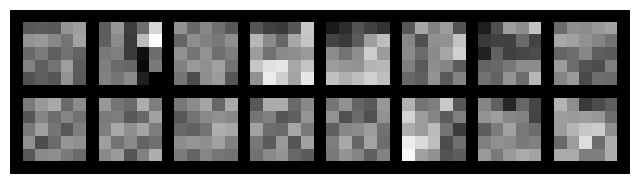

In [23]:
def visTensor(tensor, ch=0, allkernels=False, nrow=8, padding=1): 
        n,c,w,h = tensor.shape

        if allkernels: tensor = tensor.view(n*c, -1, w, h)
        elif c != 3: tensor = tensor[:,ch,:,:].unsqueeze(dim=1)

        rows = np.min((tensor.shape[0] // nrow + 1, 64))    
        grid = torchvision.utils.make_grid(tensor, nrow=nrow, normalize=True, padding=padding)
        plt.figure( figsize=(nrow,rows) )
        plt.imshow(grid.numpy().transpose((1, 2, 0)))

#layer 0 and 2 are conv2d layers
layer = 2

PATH = f'./cat_models/cat_model_1233.pth'
features = []
lmodel = CNN()
lmodel.load_state_dict(torch.load(PATH, weights_only=True))
for key,value in lmodel._modules.items():
    features.append(value)

print(features)
print("\nLayer ",layer)
filter = features[layer].weight.data.clone()
#print(f"COnv2d = {features[0].weight.data}")
visTensor(filter, ch=0, allkernels=False)

plt.axis('off')
plt.ioff()
plt.show()

tensor([[[[ 0.0560,  0.0946,  0.0910, -0.0576,  0.1058],
          [-0.1245, -0.0225, -0.0630, -0.0160,  0.0228],
          [-0.0531, -0.0758, -0.0275, -0.0326,  0.1385],
          [ 0.0594, -0.0919, -0.1044, -0.0804,  0.1007],
          [-0.0359, -0.0174, -0.0832,  0.0699,  0.0212]],

         [[ 0.0082,  0.0007, -0.0510, -0.0469,  0.0768],
          [-0.1076, -0.0139, -0.0651,  0.0142,  0.1102],
          [-0.1143, -0.0979,  0.0466, -0.0313,  0.0393],
          [ 0.0998, -0.0842, -0.0153, -0.0215,  0.1096],
          [ 0.1095, -0.0094,  0.0274,  0.0291,  0.1098]],

         [[-0.0874,  0.0674,  0.0497,  0.0359, -0.0992],
          [-0.0837, -0.1218, -0.0380, -0.0799, -0.0366],
          [-0.1141, -0.0724,  0.0417,  0.0952,  0.0218],
          [ 0.0704, -0.1430, -0.0948,  0.1091,  0.1261],
          [-0.0119, -0.0315, -0.0318, -0.0107,  0.0305]]],


        [[[ 0.0237,  0.0631,  0.0627, -0.0028, -0.2299],
          [ 0.0352,  0.1176, -0.0608, -0.0362, -0.0842],
          [ 0.1076,  0.

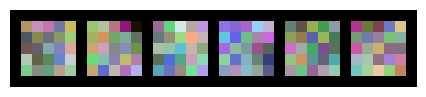

In [20]:
filter = torch.load(f'./cat_layers/{layer}/{layer}_0000.pth', weights_only=True)
print(filter)
visTensor(filter, ch=0, allkernels=False)
plt.axis('off')
plt.ioff()
plt.show()

In [21]:
testset = ImageFolder(root='./cat_test', transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size = 8)

def check_accuracy(loader, model):
    """
    Checks the accuracy of the model on the given dataset loader.

    Parameters:
        loader: DataLoader
            The DataLoader for the dataset to check accuracy on.
        model: nn.Module
            The neural network model.
    """
    #if loader.dataset.train:
     #   print("Checking accuracy on training data")
    #else:
     #   print("Checking accuracy on test data")

    num_correct = 0
    num_samples = 0
    model.eval()  # Set the model to evaluation mode

    with torch.no_grad():  # Disable gradient calculation
        for x, y in loader:
            x = x.to(device)
            y = y.to(device)

            # Forward pass: compute the model output
            scores = model(x)
            _, predictions = scores.max(1)  # Get the index of the max log-probability
            num_correct += (predictions == y).sum()  # Count correct predictions
            num_samples += predictions.size(0)  # Count total samples

        # Calculate accuracy
        accuracy = float(num_correct) / float(num_samples) * 100
        print(f"Got {num_correct}/{num_samples} with accuracy {accuracy:.2f}%")

    model.train()  # Set the model back to training mode

# Final accuracy check on training and test sets
check_accuracy(trainloader, lmodel.to(device))
check_accuracy(testloader, lmodel.to(device))

Got 2951/3000 with accuracy 98.37%
Got 4/8 with accuracy 50.00%


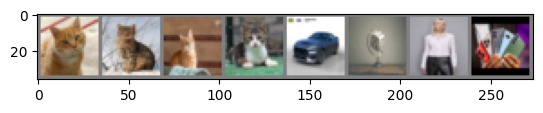

GroundTruth:  cat   cat   cat   cat   random random random random
Predicted:  cat   cat   cat   cat   cat   cat   cat   cat  


In [22]:

dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
showimage(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(8)))

#send images to gpu
images = images.to(device)

outputs = lmodel(images)
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(8)))